# Credit Card Fraud Detection

## Table of Contents

* [1. Case Study Overview](#1.-Case-Study-Overview)
* [2. Library setup and Read Data](#2.-Library-setup-and-Read-Data)
* [3. Data Prepration](#3.-Data-Prepration)
* [4. Model building & Evaluation](#4.-Model-building-&-Evaluation)  
* [5. Conclusion](#5.-Conclusion)

## 1. Case Study Overview

Problem Statement : To predict fraudulent credit card transactions with the help of machine learning models.

Customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.

The data set is taken from the Kaggle website and has a total of 2,84,807 transactions; out of these, 492 are fraudulent. Since the data set is highly imbalanced.

## 2. Library setup and Read Data

In [1]:

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.metaestimators import available_if
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import imblearn.under_sampling
#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## 3. Data Prepration

### Explore Data columns and datatypes

In [2]:
df = pd.read_csv('creditcard.csv',on_bad_lines='skip')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Handle null values

In [6]:
df['V14'] = df['V14'].fillna(0)

In [7]:
#observe the different feature type present in the data
df = df.astype(float)
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

### Distribution of classes

In [8]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

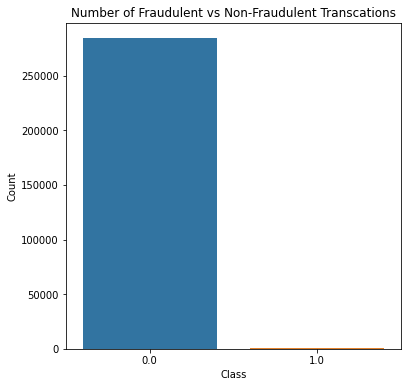

In [9]:
# Create a bar plot for the number of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(6,6))
ax=sns.countplot(x=df["Class"])
#for i in ax.containers:
    #ax.bar_label(i,)
ax.set(xlabel='Class', ylabel='Count',title="Number of Fraudulent vs Non-Fraudulent Transcations")
plt.show()

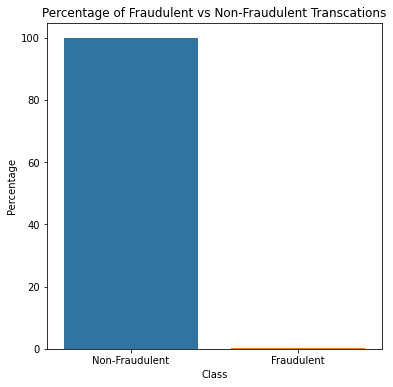

In [10]:
# Create a bar plot for percentage of fraudulent vs non-fraudulent transcations 
plt.figure(figsize=(6,6))
temp_df = pd.DataFrame({'Non-Fraudulent': [normal_share],
                        'Fraudulent': [fraud_share]
                         },
                        index=['Class'])
ax=sns.barplot(data=temp_df)
#for i in ax.containers:
    #ax.bar_label(i,)
ax.set(xlabel='Class', ylabel='Percentage',title="Percentage of Fraudulent vs Non-Fraudulent Transcations")

plt.show()

As there is too many non-Fraudulent transections, This data is highly imbalanced.

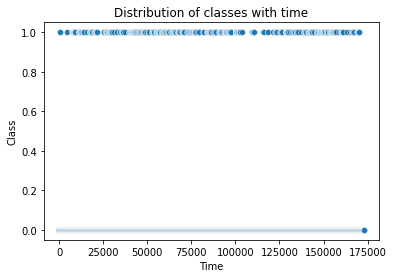

In [11]:
# Create a scatter plot to observe the distribution of classes with time
ax=sns.scatterplot(data=df, x="Time", y="Class")
ax.set(xlabel='Time', ylabel='Class',title="Distribution of classes with time")
plt.show()

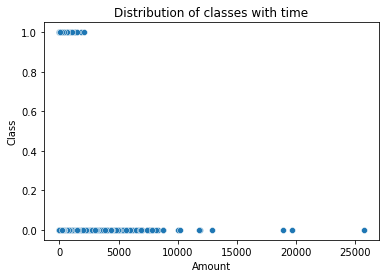

In [12]:
# Create a scatter plot to observe the distribution of classes with Amount
ax=sns.scatterplot(data=df, x="Amount", y="Class")
ax.set(xlabel='Amount', ylabel='Class',title="Distribution of classes with time")
plt.show()

Most of the Fradulent transections occured at lower amount

In [13]:
# Drop unnecessary columns
df.drop('Time', axis = 1, inplace= True)

Dropped Unnecessary columns

### Splitting the data into train & test data

In [14]:
y= df['Class']
X = df.drop(['Class'], axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [16]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492.0
396.0
96.0


### Plotting the distribution of a variable

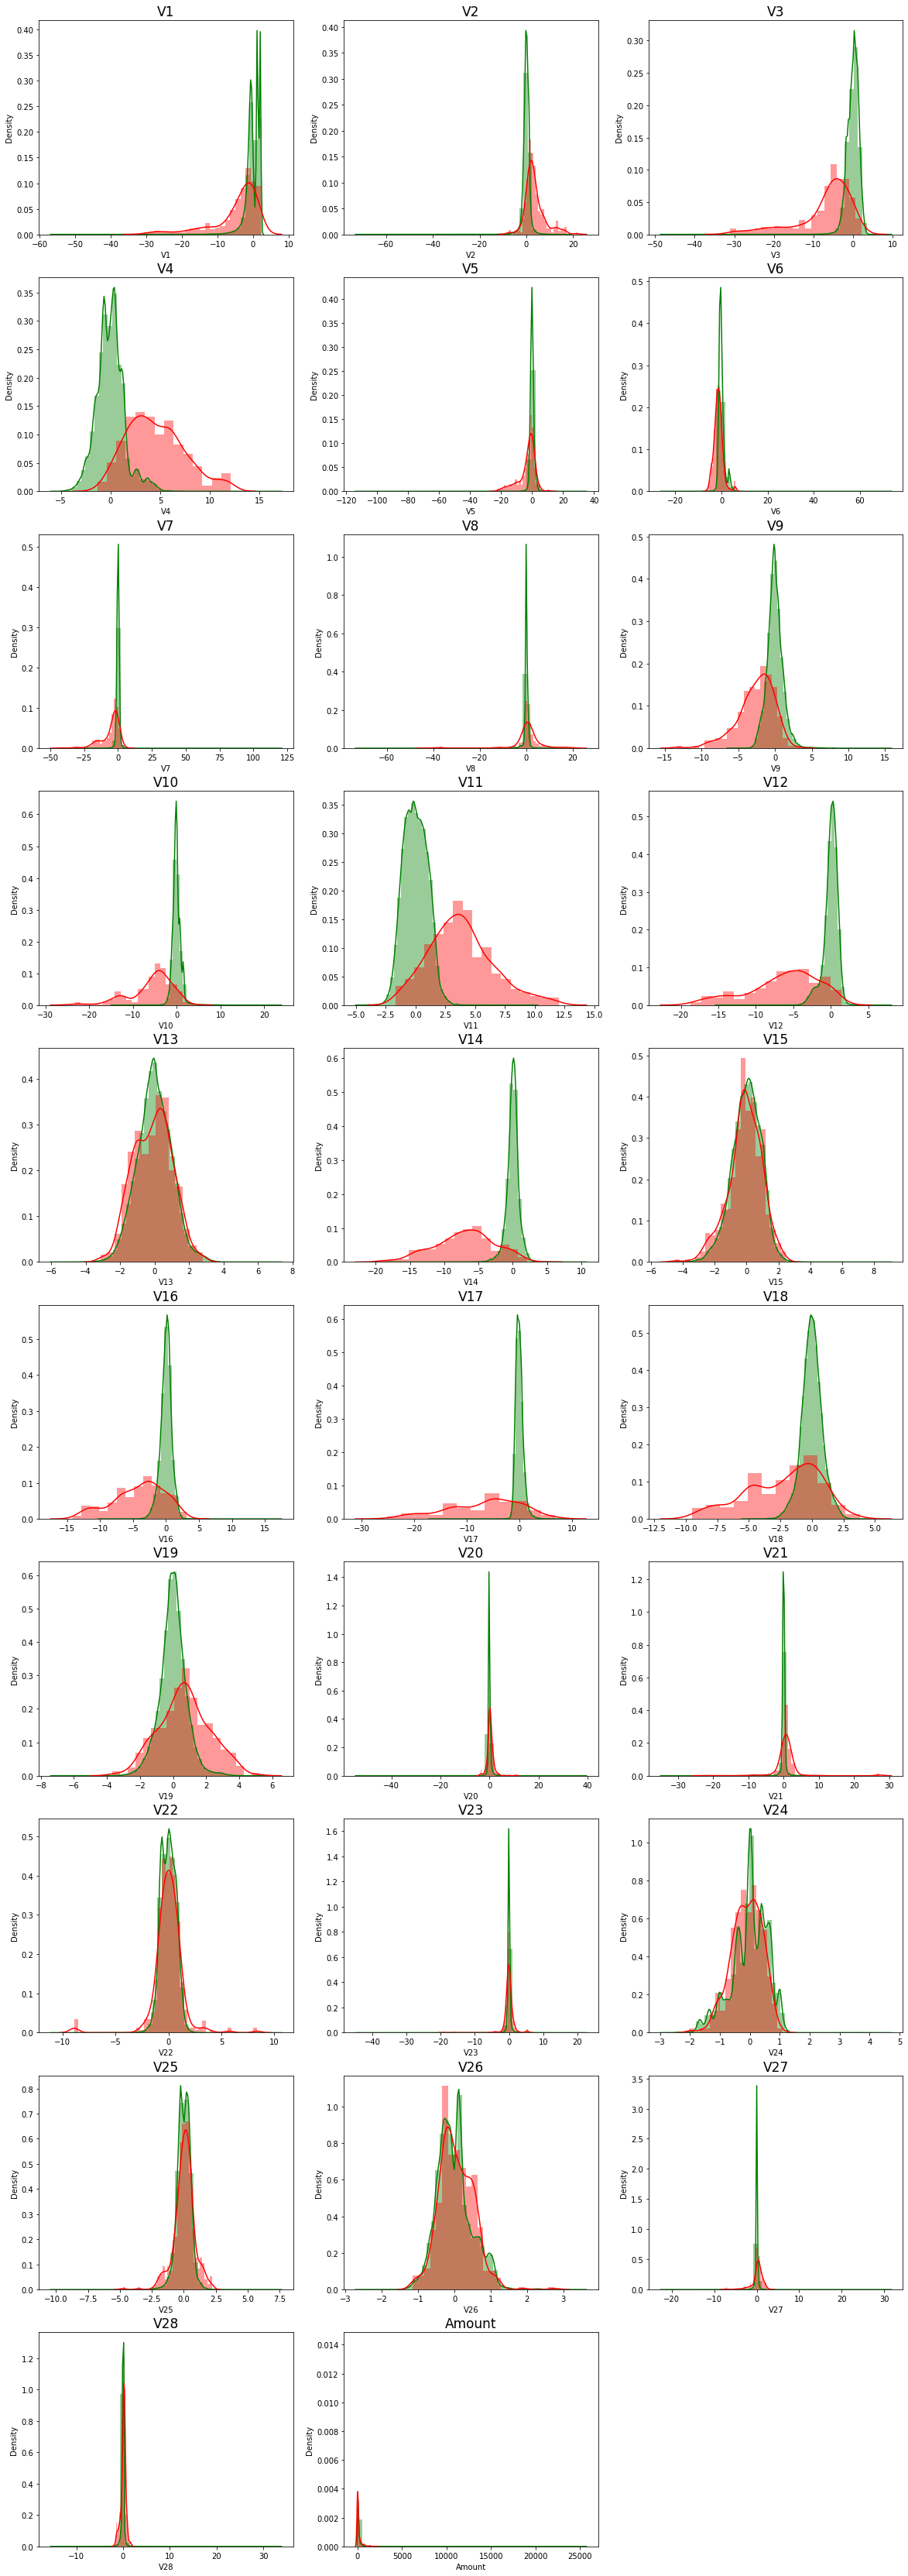

In [17]:
# plot the histogram of a variable from the dataset to see the skewness
cols = list(X.columns.values)
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()


### skewness present in the distribution, mitigate it:

- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [18]:
#X_test['V14'].unique
X_test[X_test.eq('1-0.103843091282733').any(1)]


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount


In [19]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [20]:
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

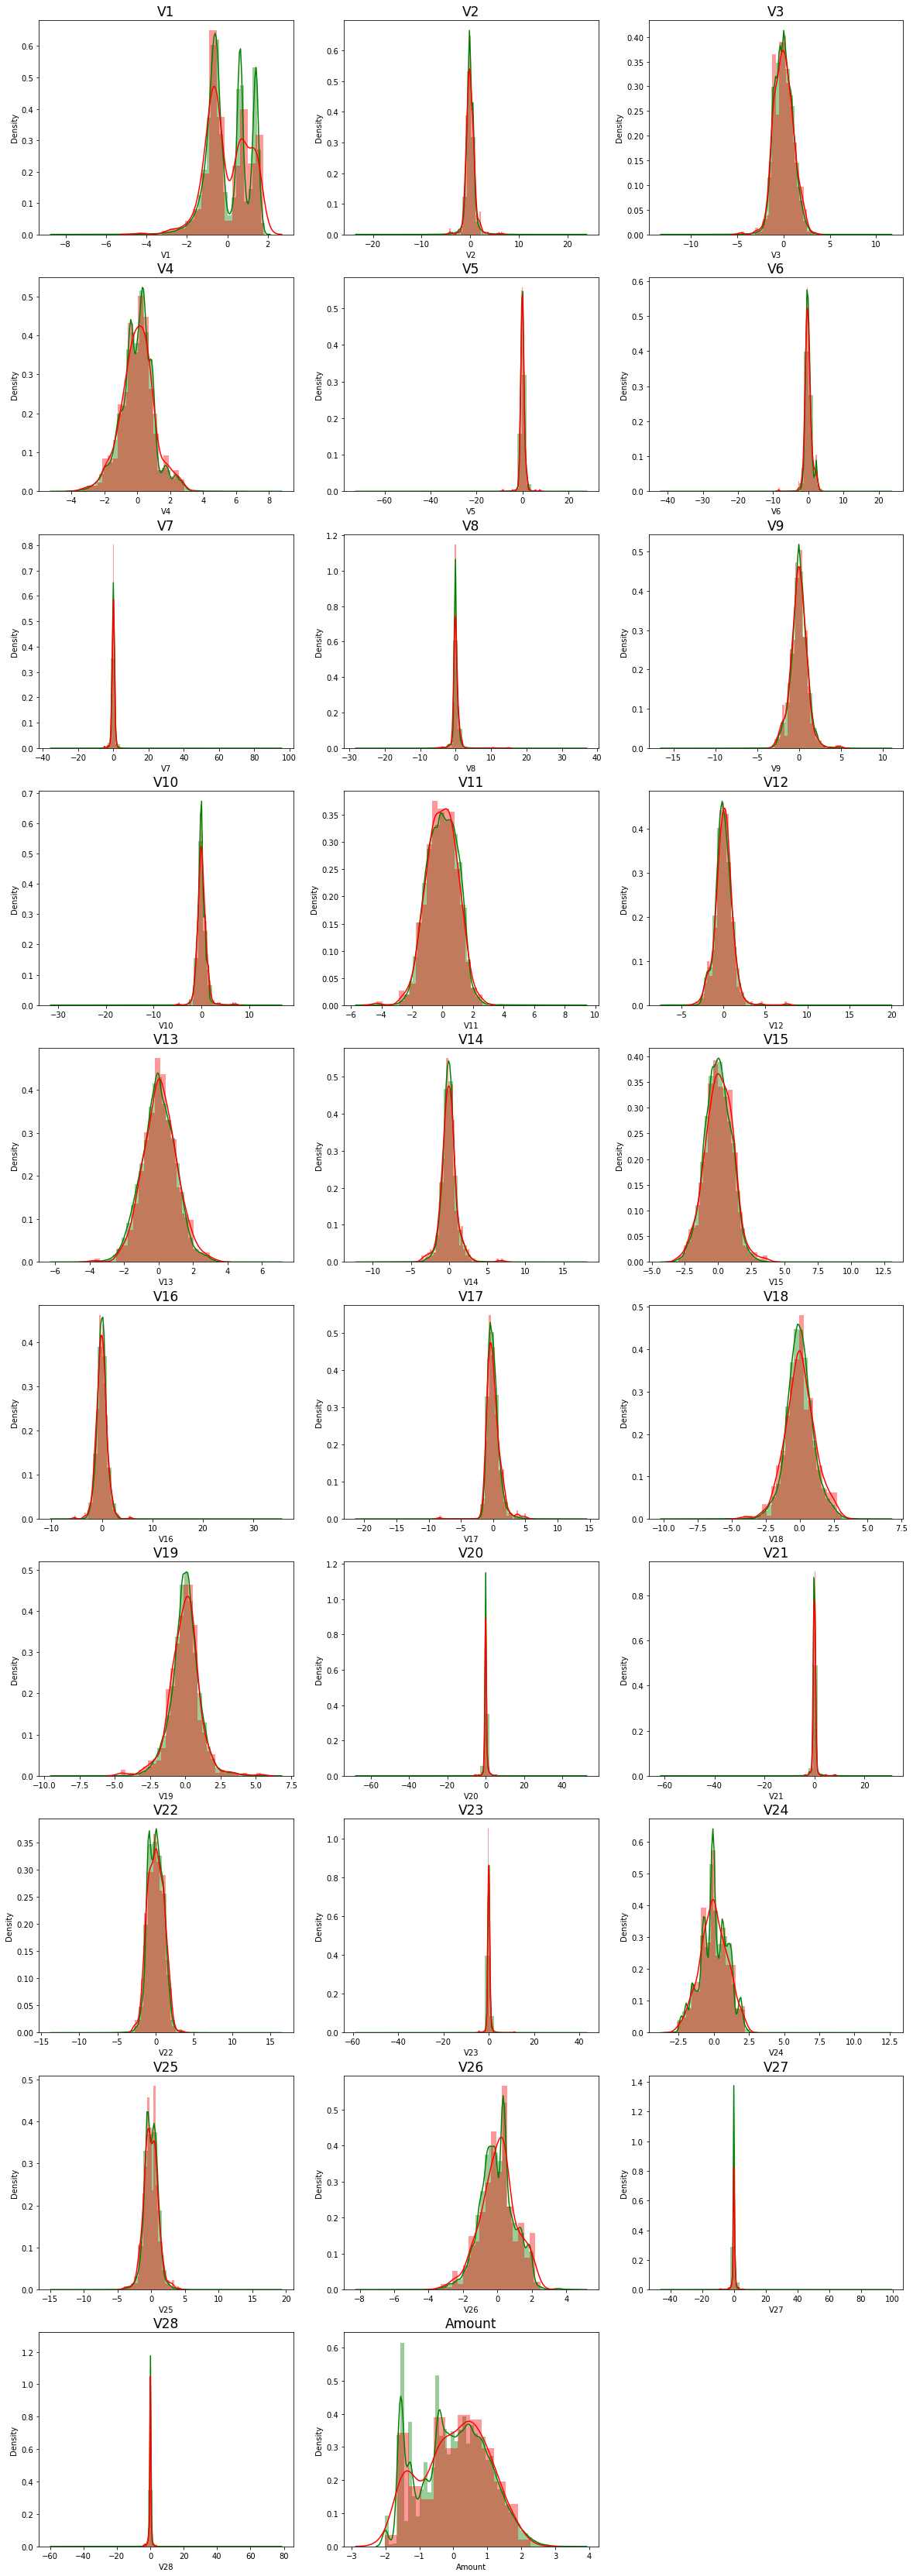

In [21]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][normal_records], color='green')
  sns.distplot(X_train_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

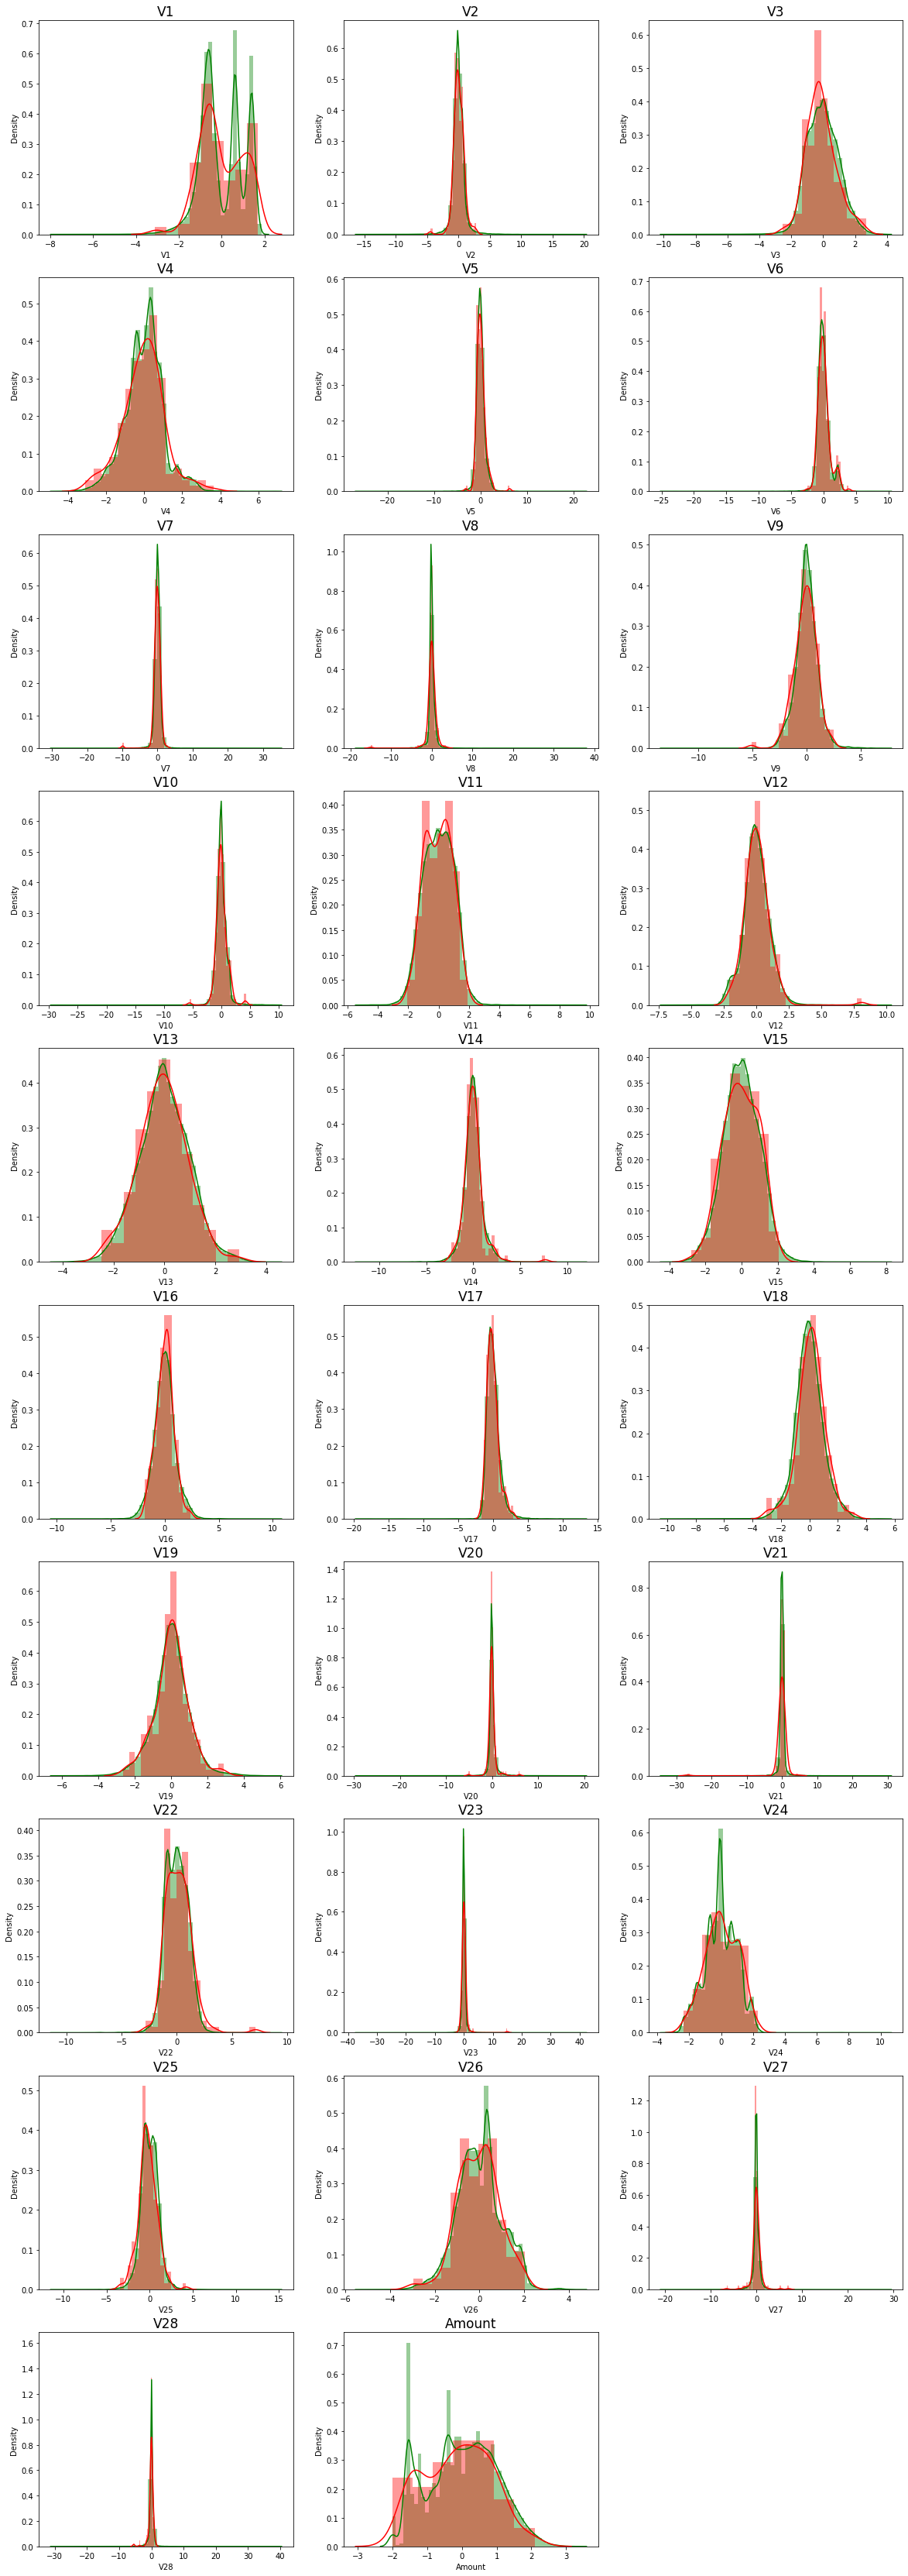

In [22]:
# plot the histogram of a variable from the test dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_test_pt_df[col][normal_records], color='green')
  sns.distplot(X_test_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

## 4. Model building & Evaluation

- Build different models on the imbalanced dataset and see the result

In [23]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

### Reusable Functions for model development

In [24]:
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [25]:
def buildAndRunLogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model #import the package
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  #searchCV.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_) 

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_) 


  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

In [26]:
def buildAndRunKNNModels(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate KNN  model
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results


In [27]:
def buildAndRunSVMModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))



  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [28]:
def buildAndRunTreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [29]:
def buildAndRunRandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [30]:
def buildAndRunXGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  from xgboost import XGBClassifier
  from sklearn.metrics import roc_auc_score
  # fit model no training data
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

### Build different models on imbalanced dataset to see results

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9835809723709812
Max auc_roc for l1: 0.9853219439271429
Parameters for l2 regularisations
[[-0.09181889 -0.0712374  -0.28531014  0.55091474  0.02781282  0.01048326
  -0.06526899 -0.20404618 -0.19129152 -0.20367634  0.16990861 -0.4842302
  -0.12688193 -0.67607523 -0.07608236 -0.17854077 -0.08488114  0.03807597
  -0.03595016 -0.02173413  0.10387455  0.09976224 -0.03232496 -0.02864527
   0.01085616  0.0077547  -0.04525285 -0.02264856  0.0207067 ]]
[-8.06707139]
{1.0: array([[0.90480168, 0.90467957, 0.90467957, 0.90467957, 0.90467957,
        0.90507886, 0.96766036, 0.9925943 , 0.99533679, 0.99629898,
        0.99629898, 0.99629898, 0.99629898, 0.99629898, 0.99629898,
        0.99629898, 0.99629898, 0.99629898, 0.99629898, 0.99629898],
       [0.93560593, 0.93560205, 0.93560205, 0.93560205, 0.93560335,
        0.9359511 , 0.96663754, 0.98015472, 0.97723953, 0.97641733,
        0.97641733, 0.97641733, 0.97641733, 0.9764

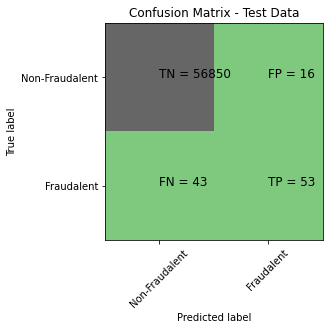

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56866
         1.0       0.77      0.55      0.64        96

    accuracy                           1.00     56962
   macro avg       0.88      0.78      0.82     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9988413328183702
Confusion Matrix


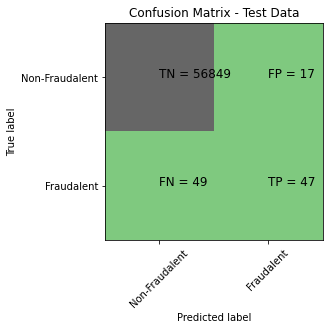

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56866
         1.0       0.73      0.49      0.59        96

    accuracy                           1.00     56962
   macro avg       0.87      0.74      0.79     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9663073057714628
l2 threshold: 0.0010291757314583694
ROC for the test dataset 96.6%


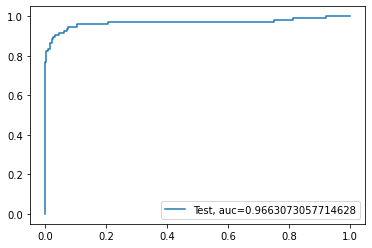

l1 roc_value: 0.9715465963844828
l1 threshold: 0.009045426435381608
ROC for the test dataset 97.2%


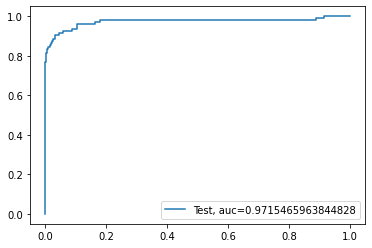

Time Taken by Model: --- 130.44075965881348 seconds ---
--------------------------------------------------------------------------------


In [31]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

KNN Model
model score
0.9993504441557529
Confusion Matrix


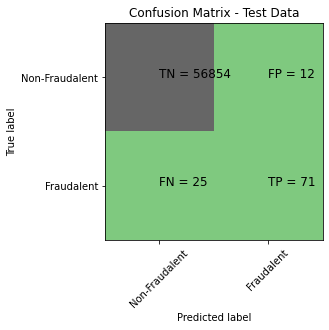

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56866
         1.0       0.86      0.74      0.79        96

    accuracy                           1.00     56962
   macro avg       0.93      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.9008513435093026
KNN threshold: 0.2
ROC for the test dataset 90.1%


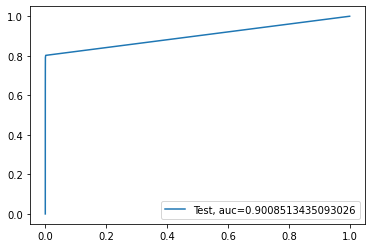

Time Taken by Model: --- 99.3124942779541 seconds ---
--------------------------------------------------------------------------------


In [32]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989993328885924
Confusion Matrix


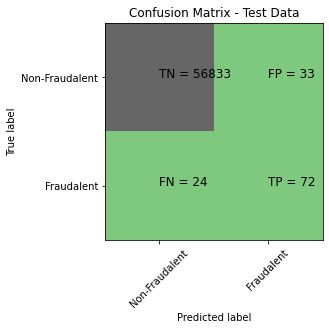

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56866
         1.0       0.69      0.75      0.72        96

    accuracy                           1.00     56962
   macro avg       0.84      0.87      0.86     56962
weighted avg       1.00      1.00      1.00     56962

gini tree_roc_value: 0.8747098441951253
Tree threshold: 1.0
ROC for the test dataset 87.5%


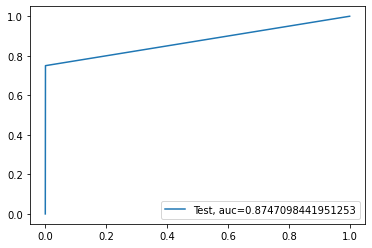

entropy score: 0.9991046662687406
Confusion Matrix


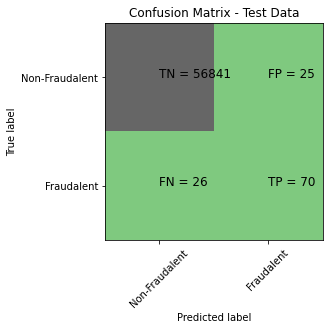

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56866
         1.0       0.74      0.73      0.73        96

    accuracy                           1.00     56962
   macro avg       0.87      0.86      0.87     56962
weighted avg       1.00      1.00      1.00     56962

entropy tree_roc_value: 0.8643635183296404
Tree threshold: 1.0
ROC for the test dataset 86.4%


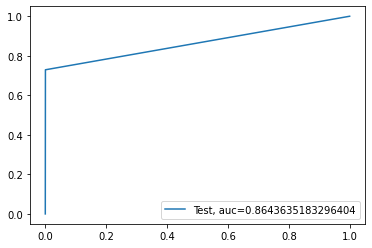

Time Taken by Model: --- 34.31528925895691 seconds ---
--------------------------------------------------------------------------------


In [33]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Random Forest Model
Model Accuracy: 0.9993504441557529
Confusion Matrix


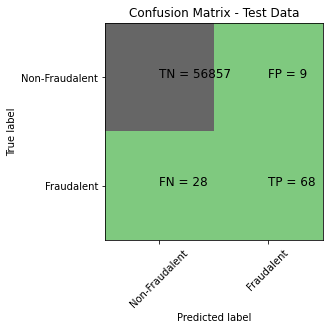

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56866
         1.0       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.9250142330214891
Random Forest threshold: 0.01
ROC for the test dataset 92.5%


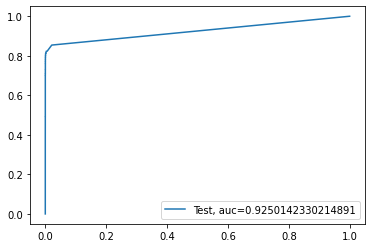

Time Taken by Model: --- 247.466153383255 seconds ---
--------------------------------------------------------------------------------


In [34]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

XGBoost Model
Model Accuracy: 0.9994557775359011
Confusion Matrix


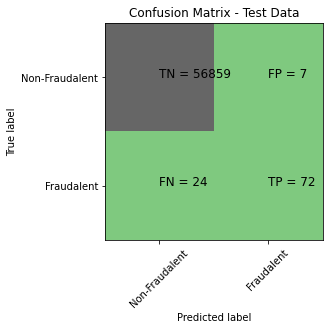

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56866
         1.0       0.91      0.75      0.82        96

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

XGboost roc_value: 0.9785370798602564
XGBoost threshold: 7.432205165969208e-05
ROC for the test dataset 97.9%


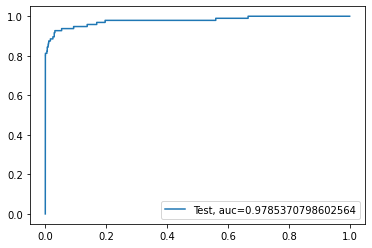

Time Taken by Model: --- 80.83090400695801 seconds ---
--------------------------------------------------------------------------------


In [35]:
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

SVM Model with Sigmoid Kernel
accuracy_score : 0.9985779993679997
Confusion Matrix


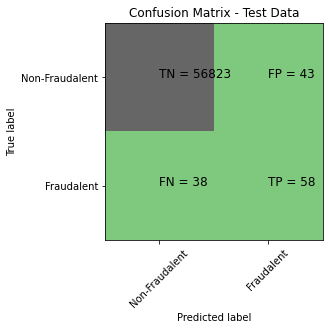

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56866
         1.0       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.79      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value: 0.8875985137574882
SVM threshold: 0.00100107853334206
ROC for the test dataset 88.8%


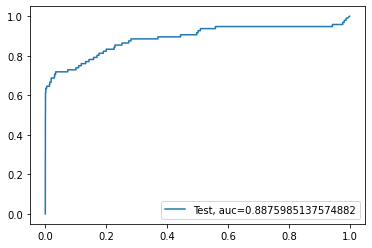

Time Taken by Model: --- 100.9691834449768 seconds ---


In [36]:
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [37]:
df_Results.head()

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998964,0.966307,0.001029
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.971547,0.009045
2,Power Transformer,KNN,0.999350,0.900851,0.200000
3,Power Transformer,Tree Model with gini criteria,0.998999,0.874710,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999105,0.864364,1.000000


### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [38]:
#perform cross validation
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9829025163926189
Max auc_roc for l1: 0.980792465945132
Parameters for l2 regularisations
[[-2.76254998e-03  4.91437024e-02 -9.05976507e-02  2.29689744e-01
   7.69334753e-02 -4.90822455e-02 -4.11205021e-02 -1.16503849e-01
  -7.89666912e-02 -1.86036808e-01  1.39799373e-01 -2.04161966e-01
  -4.20797567e-02 -3.90926043e-01 -9.98934557e-03 -1.04884895e-01
  -8.41981943e-02 -4.56114895e-04  1.57088890e-02  1.41903364e-03
   4.55133800e-02  2.09725741e-02  4.20480273e-03 -8.35164654e-03
  -3.21381771e-03  5.59698759e-03 -8.80131071e-03 -2.86848488e-04
   3.21073928e-04]]
[-7.44275751]
{1.0: array([[0.62519161, 0.62703322, 0.64215864, 0.75713382, 0.92362763,
        0.98015254, 0.98832771, 0.98954417, 0.98274619, 0.97239019,
        0.97239019, 0.97239019, 0.97239019, 0.97239019, 0.97239019,
        0.97239019, 0.97239019, 0.97239019, 0.97239019, 0.97239019],
       [0.63811937, 0.64006705, 0.66030996, 0.79415146, 0.933800

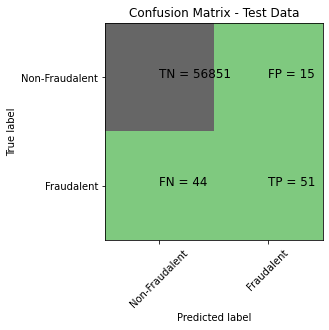

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56866
         1.0       0.77      0.54      0.63        95

    accuracy                           1.00     56961
   macro avg       0.89      0.77      0.82     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9990168711925703
Confusion Matrix


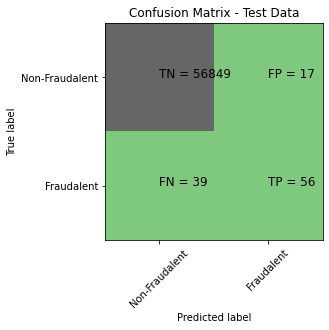

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56866
         1.0       0.77      0.59      0.67        95

    accuracy                           1.00     56961
   macro avg       0.88      0.79      0.83     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9845533451678646
l2 threshold: 0.0020790059108167663
ROC for the test dataset 98.5%


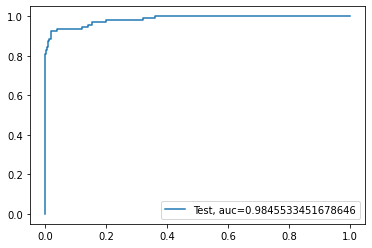

l1 roc_value: 0.9365303844494999
l1 threshold: 0.009395156816007512
ROC for the test dataset 93.7%


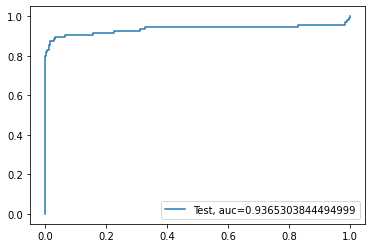

Time Taken by Model: --- 308.2957925796509 seconds ---
--------------------------------------------------------------------------------


In [39]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

KNN Model
model score
0.9992626533944278
Confusion Matrix


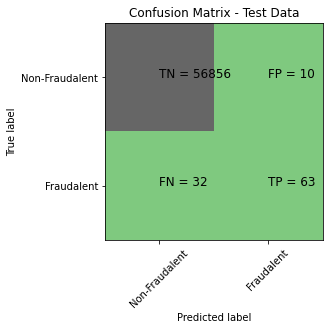

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56866
         1.0       0.86      0.66      0.75        95

    accuracy                           1.00     56961
   macro avg       0.93      0.83      0.87     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8735096542749622
KNN threshold: 0.2
ROC for the test dataset 87.4%


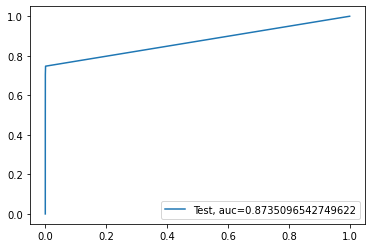

Time Taken by Model: --- 167.6272735595703 seconds ---
--------------------------------------------------------------------------------


In [40]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989466477063254
Confusion Matrix


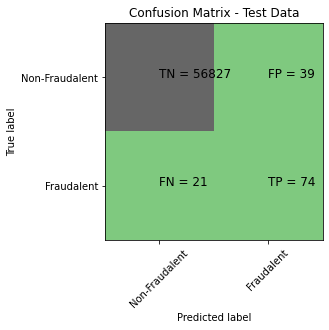

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56866
         1.0       0.65      0.78      0.71        95

    accuracy                           1.00     56961
   macro avg       0.83      0.89      0.86     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8891307728047653
Tree threshold: 1.0
ROC for the test dataset 88.9%


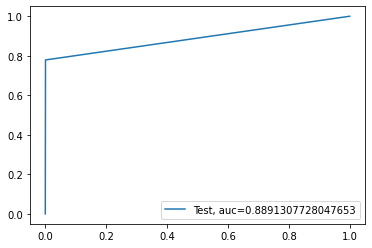

entropy score: 0.9992450975228665
Confusion Matrix


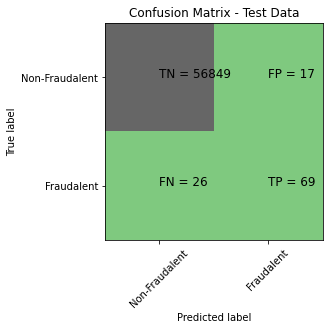

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56866
         1.0       0.80      0.73      0.76        95

    accuracy                           1.00     56961
   macro avg       0.90      0.86      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.863008420534331
Tree threshold: 1.0
ROC for the test dataset 86.3%


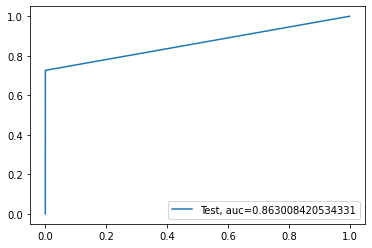

Time Taken by Model: --- 39.05062770843506 seconds ---
--------------------------------------------------------------------------------


In [41]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


Random Forest Model
Model Accuracy: 0.9995084355962852
Confusion Matrix


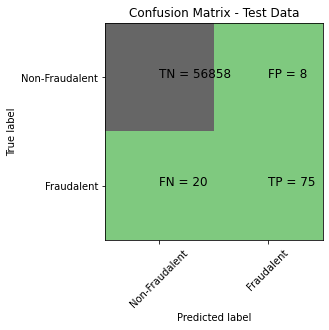

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56866
         1.0       0.90      0.79      0.84        95

    accuracy                           1.00     56961
   macro avg       0.95      0.89      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9616150247951325
Random Forest threshold: 0.01
ROC for the test dataset 96.2%


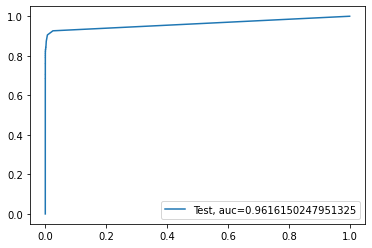

Time Taken by Model: --- 243.7255916595459 seconds ---
--------------------------------------------------------------------------------


In [42]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

XGBoost Model
Model Accuracy: 0.9995084355962852
Confusion Matrix


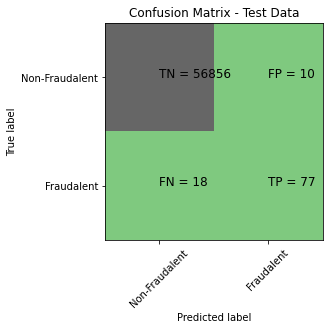

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56866
         1.0       0.89      0.81      0.85        95

    accuracy                           1.00     56961
   macro avg       0.94      0.91      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9871096779687056
XGBoost threshold: 5.213619442656636e-05
ROC for the test dataset 98.7%


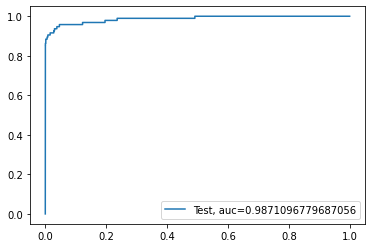

Time Taken by Model: --- 85.34229946136475 seconds ---
--------------------------------------------------------------------------------


In [43]:
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

SVM Model with Sigmoid Kernel
accuracy_score : 0.9982970804585594
Confusion Matrix


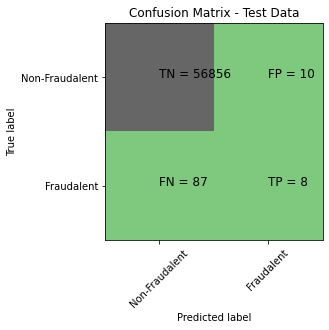

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56866
         1.0       0.44      0.08      0.14        95

    accuracy                           1.00     56961
   macro avg       0.72      0.54      0.57     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.4810947990381821
SVM threshold: 0.002960343790411548
ROC for the test dataset 48.1%


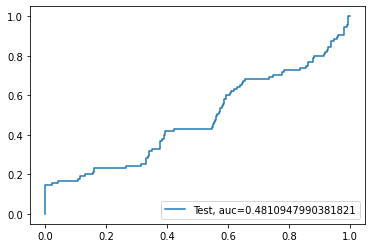

Time Taken by Model: --- 276.4303698539734 seconds ---


In [44]:
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [45]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998964,0.966307,0.001029
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.971547,0.009045
2,Power Transformer,KNN,0.999350,0.900851,0.200000
3,Power Transformer,Tree Model with gini criteria,0.998999,0.874710,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999105,0.864364,1.000000
5,Power Transformer,Random Forest,0.999350,0.925014,0.010000
6,Power Transformer,XGBoost,0.999456,0.978537,0.000074
7,Power Transformer,SVM,0.998578,0.887599,0.001001
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998964,0.984553,0.002079
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999017,0.936530,0.009395


It seems XGBOost with Repeated KFold cross validation has provided us wih best results with ROC_Value of 0.958382

In [46]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']


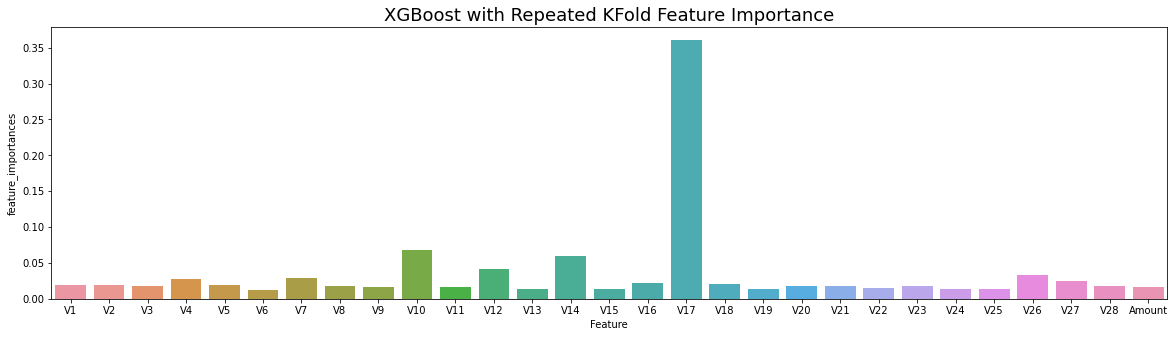

In [47]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()

### Perform cross validation with StratifiedKFold

In [48]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

### Build Model using other algorithms:

<br>KNN
<br>SVM
<br>Decision Tree
<br>Random Forest
<br>XGBoost

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9827314182234266
Max auc_roc for l1: 0.9674949730621465
Parameters for l2 regularisations
[[ 0.00686972  0.06117053 -0.06701667  0.21804217  0.05389997 -0.03190731
  -0.02269394 -0.11479251 -0.06972779 -0.16349787  0.12757846 -0.19121341
  -0.0372163  -0.3602672   0.00365223 -0.08783055 -0.07285425 -0.00075514
   0.00390554 -0.02783431  0.03809308  0.02332286 -0.01168951 -0.00996839
  -0.00658736  0.00628363 -0.01013168 -0.00169907  0.00039487]]
[-7.4040197]
{1.0: array([[0.69891917, 0.70150401, 0.72142073, 0.84390606, 0.96686484,
        0.99058161, 0.99618417, 0.99483369, 0.99145525, 0.99151837,
        0.99151837, 0.99151837, 0.99151837, 0.99151837, 0.99151837,
        0.99151837, 0.99151837, 0.99151837, 0.99151837, 0.99151837],
       [0.6029133 , 0.60405021, 0.62419457, 0.76517705, 0.91405895,
        0.95983292, 0.97487569, 0.9820415 , 0.98534181, 0.9820181 ,
        0.9820181 , 0.9820181 , 0.9820181 , 0.9820

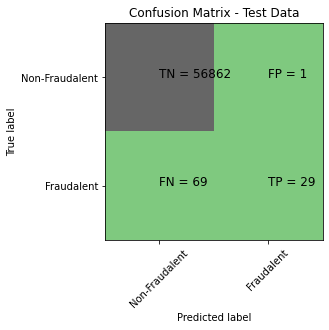

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9988588683485191
Confusion Matrix


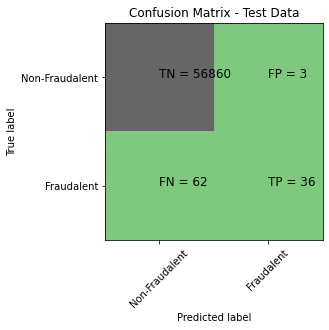

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.92      0.37      0.53        98

    accuracy                           1.00     56961
   macro avg       0.96      0.68      0.76     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9833394765148027
l2 threshold: 0.001591134614397092
ROC for the test dataset 98.3%


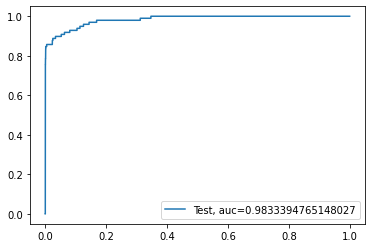

l1 roc_value: 0.9376666868847323
l1 threshold: 0.014337642491029224
ROC for the test dataset 93.8%


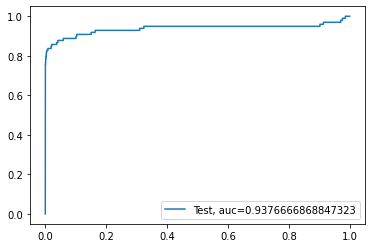

Time Taken by Model: --- 278.53334736824036 seconds ---
--------------------------------------------------------------------------------


In [49]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

KNN Model
model score
0.9991222064219378
Confusion Matrix


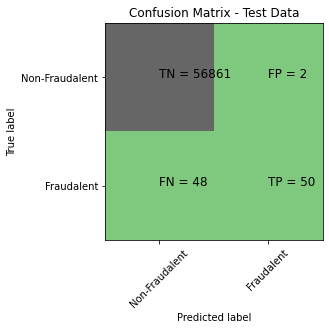

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.96      0.51      0.67        98

    accuracy                           1.00     56961
   macro avg       0.98      0.76      0.83     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8110050220957138
KNN threshold: 0.2
ROC for the test dataset 81.1%


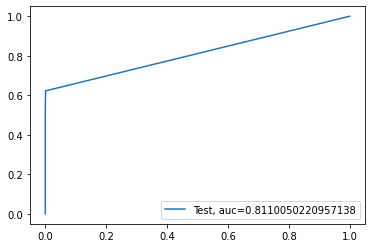

Time Taken by Model: --- 157.83897018432617 seconds ---
--------------------------------------------------------------------------------


In [50]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989642035778866
Confusion Matrix


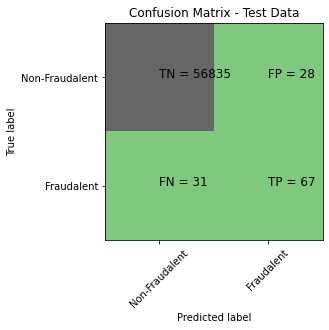

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.71      0.68      0.69        98

    accuracy                           1.00     56961
   macro avg       0.85      0.84      0.85     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8415905289010069
Tree threshold: 1.0
ROC for the test dataset 84.2%


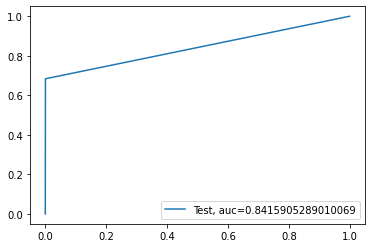

entropy score: 0.9990870946788153
Confusion Matrix


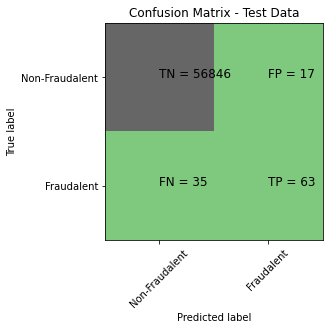

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.79      0.64      0.71        98

    accuracy                           1.00     56961
   macro avg       0.89      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212790893400429
Tree threshold: 1.0
ROC for the test dataset 82.1%


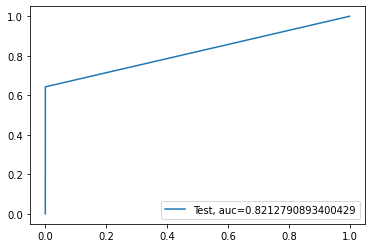

Time Taken by Model: --- 38.739741802215576 seconds ---
--------------------------------------------------------------------------------


In [51]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


Random Forest Model
Model Accuracy: 0.9994557679816014
Confusion Matrix


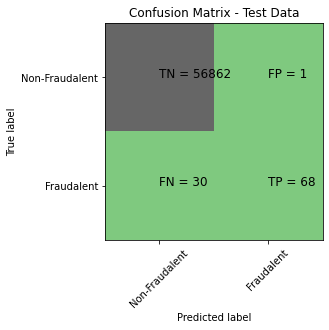

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.99      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9265156460910164
Random Forest threshold: 0.01
ROC for the test dataset 92.7%


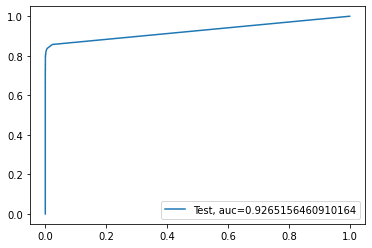

Time Taken by Model: --- 237.037495136261 seconds ---
--------------------------------------------------------------------------------


In [52]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

XGBoost Model
Model Accuracy: 0.9994557679816014
Confusion Matrix


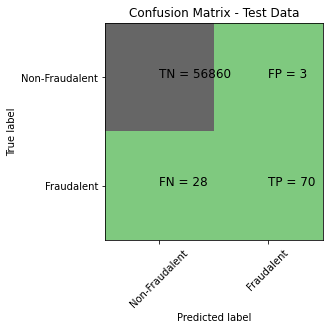

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.96      0.71      0.82        98

    accuracy                           1.00     56961
   macro avg       0.98      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9842889479798743
XGBoost threshold: 2.8563774321810342e-05
ROC for the test dataset 98.4%


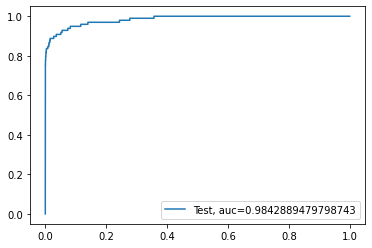

Time Taken by Model: --- 81.66429901123047 seconds ---
--------------------------------------------------------------------------------


In [53]:
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

SVM Model with Sigmoid Kernel
accuracy_score : 0.9982795245869981
Confusion Matrix


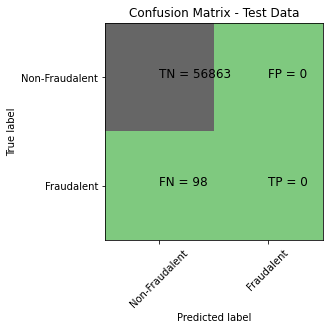

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.40214557940370105
SVM threshold: 0.0024513655710443664
ROC for the test dataset 40.2%


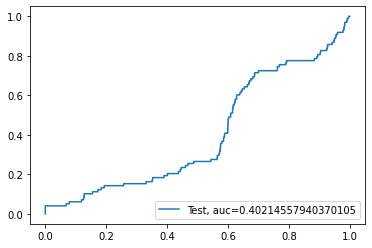

Time Taken by Model: --- 340.95179557800293 seconds ---


In [54]:
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [55]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998964,0.966307,0.001029
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.971547,0.009045
2,Power Transformer,KNN,0.999350,0.900851,0.200000
3,Power Transformer,Tree Model with gini criteria,0.998999,0.874710,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999105,0.864364,1.000000
5,Power Transformer,Random Forest,0.999350,0.925014,0.010000
6,Power Transformer,XGBoost,0.999456,0.978537,0.000074
7,Power Transformer,SVM,0.998578,0.887599,0.001001
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998964,0.984553,0.002079
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999017,0.936530,0.009395


**As the results show Logistic Regression with L2 Regularisation for StratifiedFold cross validation provided best results**


### Selection of Model with best results
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [56]:
 # Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

#searchCV.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_) 
print(searchCV_l2.scores_) 


#find predicted vallues
y_pred_l2 = searchCV_l2.predict(X_test)


#Find predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))

Max auc_roc for l2: 0.9860358708918413
Parameters for l2 regularisations
[[ 2.08683195e-02  3.18583884e-02 -8.89009903e-02  2.37494895e-01
   8.26609111e-02 -4.88355935e-02 -3.24213746e-02 -1.08614452e-01
  -9.36190314e-02 -1.75541796e-01  1.34429405e-01 -2.05715139e-01
  -4.46089949e-02 -3.79402553e-01 -1.05860360e-02 -1.04634399e-01
  -1.14945882e-01 -8.63205468e-03  1.51747125e-02 -5.85539512e-03
   3.96358033e-02  2.46135013e-02  1.93871969e-03 -1.57756806e-02
  -7.89160395e-03  5.19547963e-03 -3.24951582e-03 -3.51052535e-04
   2.97233522e-04]]
[-7.42059321]
{1.0: array([[0.58140285, 0.58339683, 0.60935035, 0.77822102, 0.94830176,
        0.98966988, 0.99568113, 0.99454066, 0.99412184, 0.99419999,
        0.99419999, 0.99419999, 0.99419999, 0.99419999, 0.99419999,
        0.99419999, 0.99419999, 0.99419999, 0.99419999, 0.99419999],
       [0.56432167, 0.5669809 , 0.58323616, 0.72534627, 0.90830784,
        0.97026246, 0.98145654, 0.97652204, 0.97960917, 0.98160003,
        0.981159

In [57]:
searchCV_l2.coef_

array([[ 2.08683195e-02,  3.18583884e-02, -8.89009903e-02,
         2.37494895e-01,  8.26609111e-02, -4.88355935e-02,
        -3.24213746e-02, -1.08614452e-01, -9.36190314e-02,
        -1.75541796e-01,  1.34429405e-01, -2.05715139e-01,
        -4.46089949e-02, -3.79402553e-01, -1.05860360e-02,
        -1.04634399e-01, -1.14945882e-01, -8.63205468e-03,
         1.51747125e-02, -5.85539512e-03,  3.96358033e-02,
         2.46135013e-02,  1.93871969e-03, -1.57756806e-02,
        -7.89160395e-03,  5.19547963e-03, -3.24951582e-03,
        -3.51052535e-04,  2.97233522e-04]])

In [58]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

In [59]:
coefficients

,Feature,Importance Coefficient
0,V1,0.020868
1,V2,0.031858
2,V3,-0.088901
3,V4,0.237495
4,V5,0.082661
5,V6,-0.048836
6,V7,-0.032421
7,V8,-0.108614
8,V9,-0.093619
9,V10,-0.175542


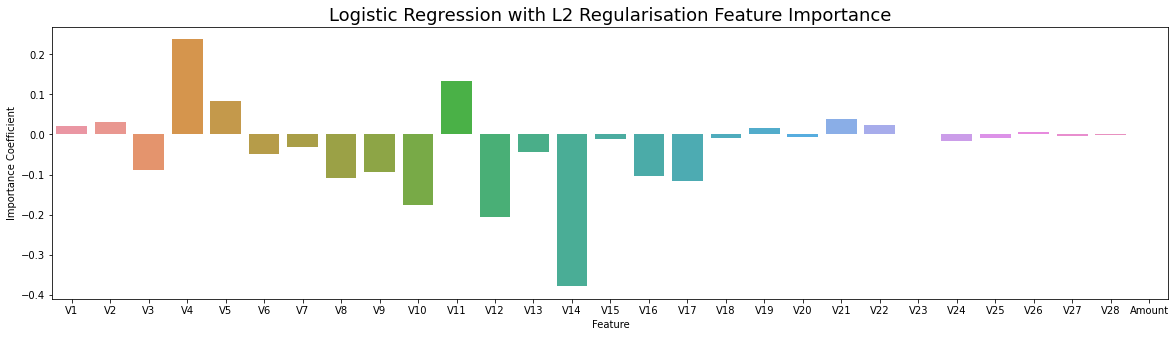

In [60]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()

**Its is evident that V4, V11, v5 has + ve imporatnce whereas V14, V12, V10 seems to have -ve impact on the predictaions**

As the models Oversampling data, take significantly longer time to run. We will try with undersampling methods

### Undersampling

In [61]:
# Undersampling

from imblearn.under_sampling import RandomUnderSampler
#Define Oversampler
RUS = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_Under, y_Under = RUS.fit_resample(X_train, y_train)
#Create Dataframe
X_Under = pd.DataFrame(data=X_Under,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9811021258729709
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[-0.03276851  0.04765242 -0.10168883  0.14385736  0.01283807 -0.03916752
  -0.05006776 -0.00966103 -0.04511396 -0.09443417  0.08659193 -0.13408436
  -0.01935097 -0.19303365 -0.00981797 -0.05518649 -0.06173393 -0.00820123
  -0.00514674  0.012406    0.02404631 -0.00219888  0.0030046  -0.00477431
   0.00389087 -0.00448155  0.00314176  0.00615739  0.00030618]]
[-2.16381068]
{1.0: array([[0.6025641 , 0.60512821, 0.62371795, 0.73942308, 0.91474359,
        0.9625    , 0.98076923, 0.9875    , 0.99070513, 0.99102564,
        0.99102564, 0.99102564, 0.99102564, 0.99102564, 0.99102564,
        0.99102564, 0.99102564, 0.99102564, 0.99102564, 0.99102564],
       [0.47173489, 0.4740091 , 0.49610136, 0.611436  , 0.79532164,
        0.90350877, 0.94249513, 0.96068876, 0.9619883 , 0.96003899,
        0.96003899, 0.96003899, 0.96003899, 0.96003899, 0.960038

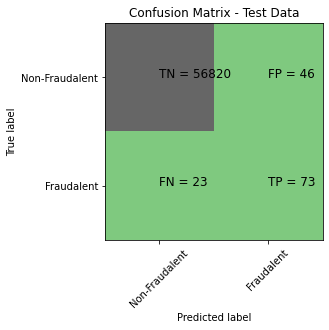

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56866
         1.0       0.61      0.76      0.68        96

    accuracy                           1.00     56962
   macro avg       0.81      0.88      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9983146659176293
Confusion Matrix


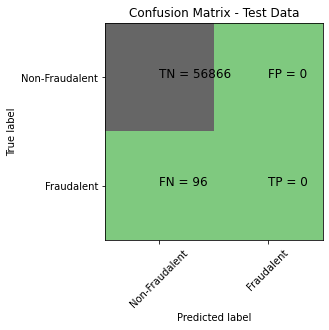

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56866
         1.0       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9705568793303556
l2 threshold: 0.1402737498660772
ROC for the test dataset 97.1%


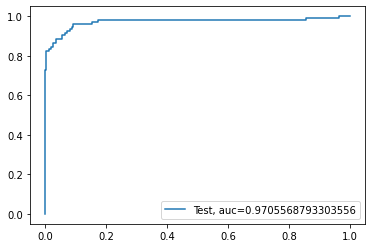

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


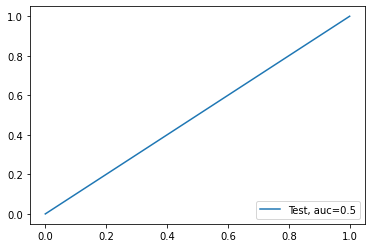

Time Taken by Model: --- 3.2264702320098877 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9751588778483902
Confusion Matrix


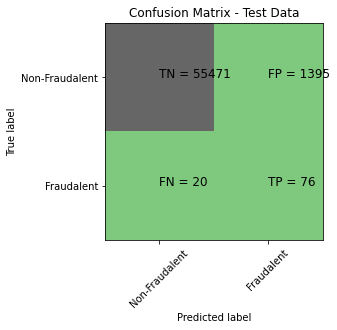

classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     56866
         1.0       0.05      0.79      0.10        96

    accuracy                           0.98     56962
   macro avg       0.53      0.88      0.54     56962
weighted avg       1.00      0.98      0.99     56962

KNN roc_value: 0.9340302201667077
KNN threshold: 0.4
ROC for the test dataset 93.4%


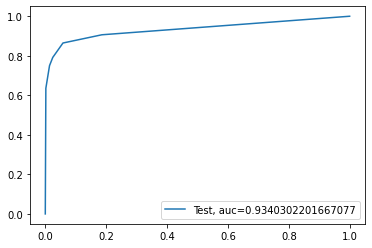

Time Taken by Model: --- 4.560478210449219 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9511779783013237
Confusion Matrix


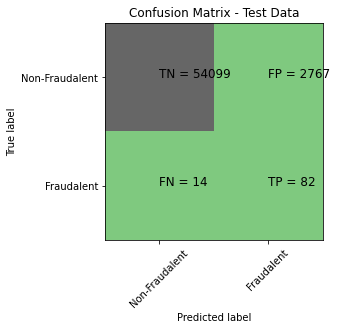

classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97     56866
         1.0       0.03      0.85      0.06        96

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.52     56962
weighted avg       1.00      0.95      0.97     56962

gini tree_roc_value: 0.902754208724604
Tree threshold: 1.0
ROC for the test dataset 90.3%


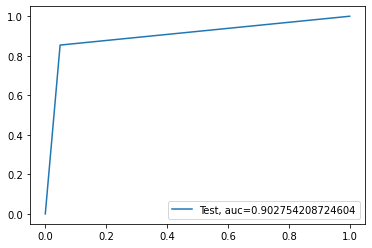

entropy score: 0.9360099715599873
Confusion Matrix


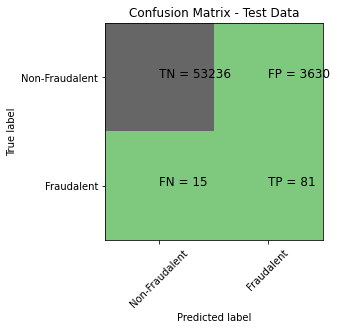

classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97     56866
         1.0       0.02      0.84      0.04        96

    accuracy                           0.94     56962
   macro avg       0.51      0.89      0.50     56962
weighted avg       1.00      0.94      0.97     56962

entropy tree_roc_value: 0.8899578614637922
Tree threshold: 1.0
ROC for the test dataset 89.0%


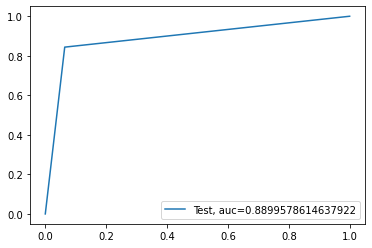

Time Taken by Model: --- 1.1745259761810303 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9933639970506654
Confusion Matrix


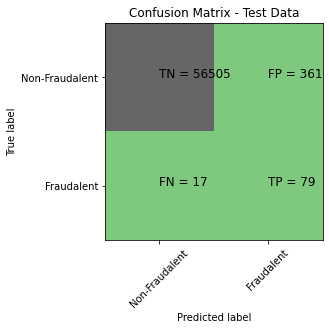

classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     56866
         1.0       0.18      0.82      0.29        96

    accuracy                           0.99     56962
   macro avg       0.59      0.91      0.65     56962
weighted avg       1.00      0.99      1.00     56962

Random Forest roc_value: 0.9741567163741662
Random Forest threshold: 0.29
ROC for the test dataset 97.4%


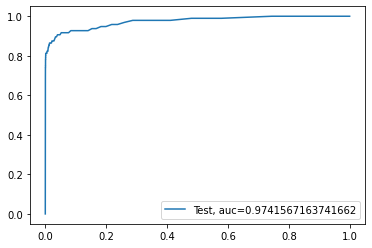

Time Taken by Model: --- 3.806387424468994 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9870264386784172
Confusion Matrix


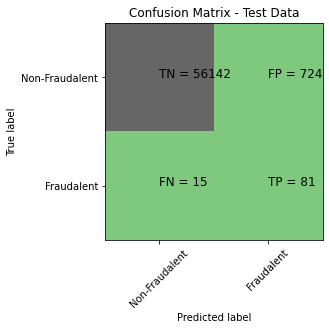

classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     56866
         1.0       0.10      0.84      0.18        96

    accuracy                           0.99     56962
   macro avg       0.55      0.92      0.59     56962
weighted avg       1.00      0.99      0.99     56962

XGboost roc_value: 0.981700950480076
XGBoost threshold: 0.10412484407424927
ROC for the test dataset 98.2%


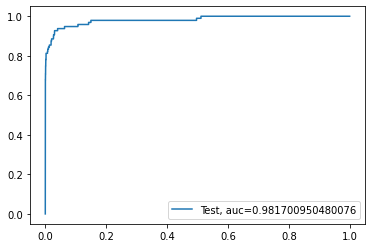

Time Taken by Model: --- 1.0572643280029297 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.7548190021417788
Confusion Matrix


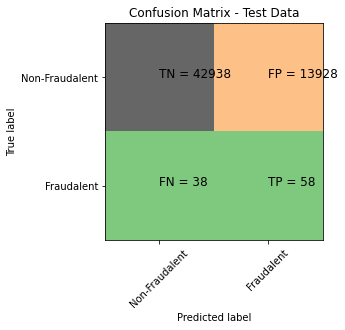

classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.76      0.86     56866
         1.0       0.00      0.60      0.01        96

    accuracy                           0.75     56962
   macro avg       0.50      0.68      0.43     56962
weighted avg       1.00      0.75      0.86     56962

SVM roc_value: 0.3056393905555751
SVM threshold: 0.21621355826755756
ROC for the test dataset 30.6%


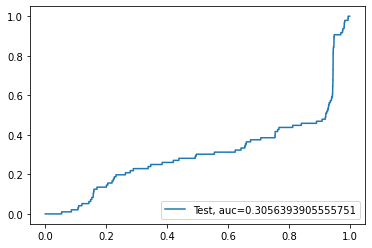

Time Taken by Model: --- 5.105830430984497 seconds ---


In [62]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Random Undersampling", X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [63]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998964,0.966307,0.001029
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.971547,0.009045
2,Power Transformer,KNN,0.999350,0.900851,0.200000
3,Power Transformer,Tree Model with gini criteria,0.998999,0.874710,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999105,0.864364,1.000000
5,Power Transformer,Random Forest,0.999350,0.925014,0.010000
6,Power Transformer,XGBoost,0.999456,0.978537,0.000074
7,Power Transformer,SVM,0.998578,0.887599,0.001001
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998964,0.984553,0.002079
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999017,0.936530,0.009395


It seems Undersampling has impoved the XGBoost Results

### Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

 #### Oversampling with RandomOverSampler and StratifiedKFold Cross Validation

In [64]:
"""
from imblearn.over_sampling import RandomOverSampler
#Define Oversampler
ROS = RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = ROS.fit_resample(X_train, y_train)
"""

'\nfrom imblearn.over_sampling import RandomOverSampler\n#Define Oversampler\nROS = RandomOverSampler(sampling_strategy=0.5)\n# fit and apply the transform\nX_over, y_over = ROS.fit_resample(X_train, y_train)\n'

In [65]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9859085613854586
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.38792407  0.38325449  0.31626488  0.84295763  0.32170049 -0.48875347
  -0.37814524 -0.33514404 -0.27834066 -0.71871361  0.26854786 -0.84464039
  -0.35005101 -0.92267728  0.04794776 -0.54777567 -0.30129952 -0.13058738
   0.12720154 -0.76245751  0.05836648  0.529377    0.13159456 -0.44604855
   0.22550446 -0.11324823 -0.40289133  0.1938839   0.0056189 ]]
[-4.63948667]
{1.0: array([[0.63656534, 0.76355291, 0.91395056, 0.96477026, 0.98117618,
        0.98526314, 0.9864959 , 0.98714005, 0.98749005, 0.98761812,
        0.98761812, 0.98761812, 0.98761812, 0.98761812, 0.98761812,
        0.98761812, 0.98761812, 0.98761812, 0.98761812, 0.98761812],
       [0.63205666, 0.75883682, 0.91232033, 0.96396197, 0.98012265,
        0.98404495, 0.98498636, 0.98549928, 0.98585747, 0.98596862,
        0.98598964, 0.98598964, 0.98598964, 0.98598964, 0.985989

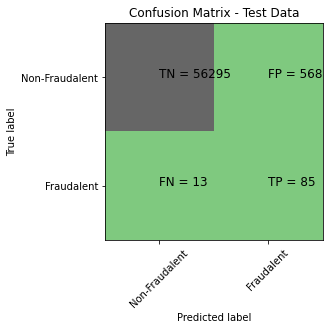

classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     56863
         1.0       0.13      0.87      0.23        98

    accuracy                           0.99     56961
   macro avg       0.56      0.93      0.61     56961
weighted avg       1.00      0.99      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


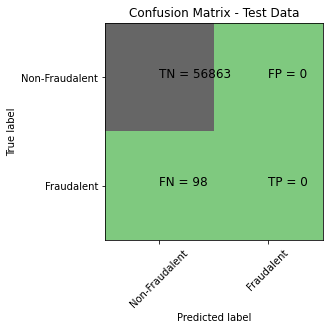

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9802112991231701
l2 threshold: 0.2634293483702015
ROC for the test dataset 98.0%


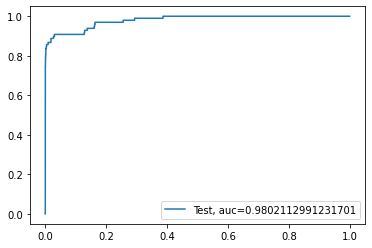

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


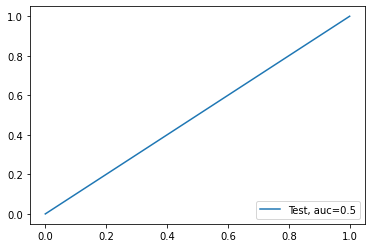

Time Taken by Model: --- 326.2629556655884 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9987184213760292
Confusion Matrix


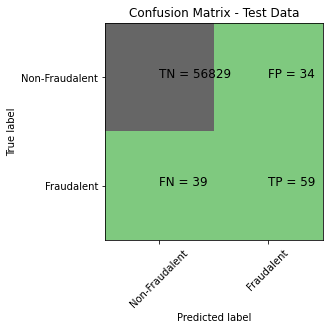

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.63      0.60      0.62        98

    accuracy                           1.00     56961
   macro avg       0.82      0.80      0.81     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8109839366870678
KNN threshold: 0.2
ROC for the test dataset 81.1%


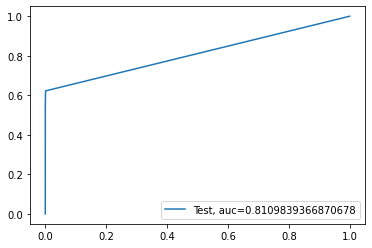

Time Taken by Model: --- 232.17863249778748 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989466477063254
Confusion Matrix


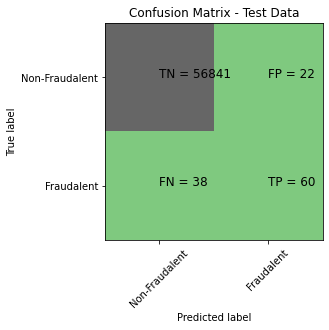

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.73      0.61      0.67        98

    accuracy                           1.00     56961
   macro avg       0.87      0.81      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8059290015709077
Tree threshold: 1.0
ROC for the test dataset 80.6%


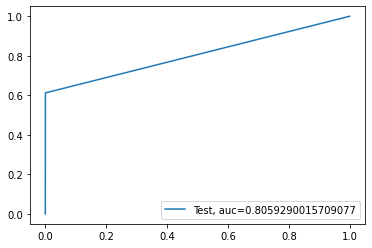

entropy score: 0.9989993153210092
Confusion Matrix


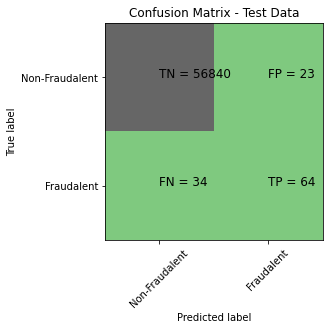

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.74      0.65      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.83      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8263283717721828
Tree threshold: 1.0
ROC for the test dataset 82.6%


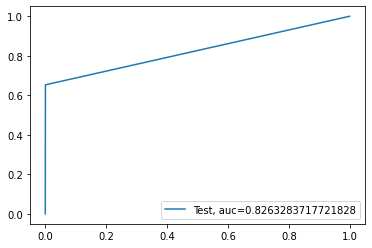

Time Taken by Model: --- 24.47083616256714 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


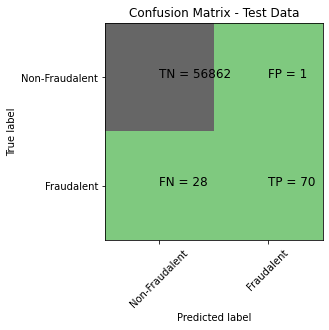

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.99      0.71      0.83        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9466078871272054
Random Forest threshold: 0.01
ROC for the test dataset 94.7%


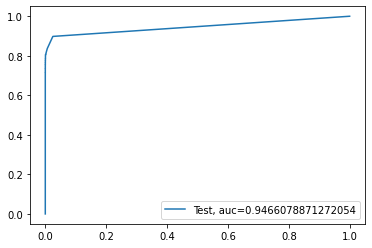

Time Taken by Model: --- 187.18583869934082 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.999490879724724
Confusion Matrix


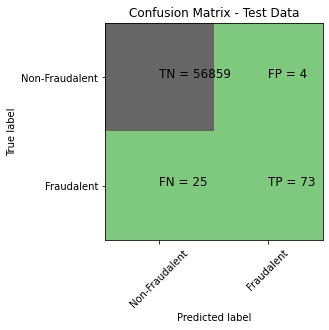

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.95      0.74      0.83        98

    accuracy                           1.00     56961
   macro avg       0.97      0.87      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9845857587534953
XGBoost threshold: 2.1984937120578252e-05
ROC for the test dataset 98.5%


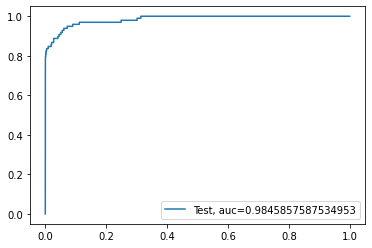

Time Taken by Model: --- 109.64302325248718 seconds ---
--------------------------------------------------------------------------------


In [66]:
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results , Data_Imbalance_Handiling , X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Avoided due to time requirement
#Run SVM Model with Sigmoid Kernel
#print("SVM Model with Sigmoid Kernel")
#start_time = time.time()
#df_Results = buildAndRunSVMModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [67]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998964,0.966307,0.001029
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.971547,0.009045
2,Power Transformer,KNN,0.999350,0.900851,0.200000
3,Power Transformer,Tree Model with gini criteria,0.998999,0.874710,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999105,0.864364,1.000000
5,Power Transformer,Random Forest,0.999350,0.925014,0.010000
6,Power Transformer,XGBoost,0.999456,0.978537,0.000074
7,Power Transformer,SVM,0.998578,0.887599,0.001001
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998964,0.984553,0.002079
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999017,0.936530,0.009395


#### Oversampling with SMOTE Oversamplng

In [68]:
#X_train_smote_1.iloc[0:X_train_1.shape[0], 0]

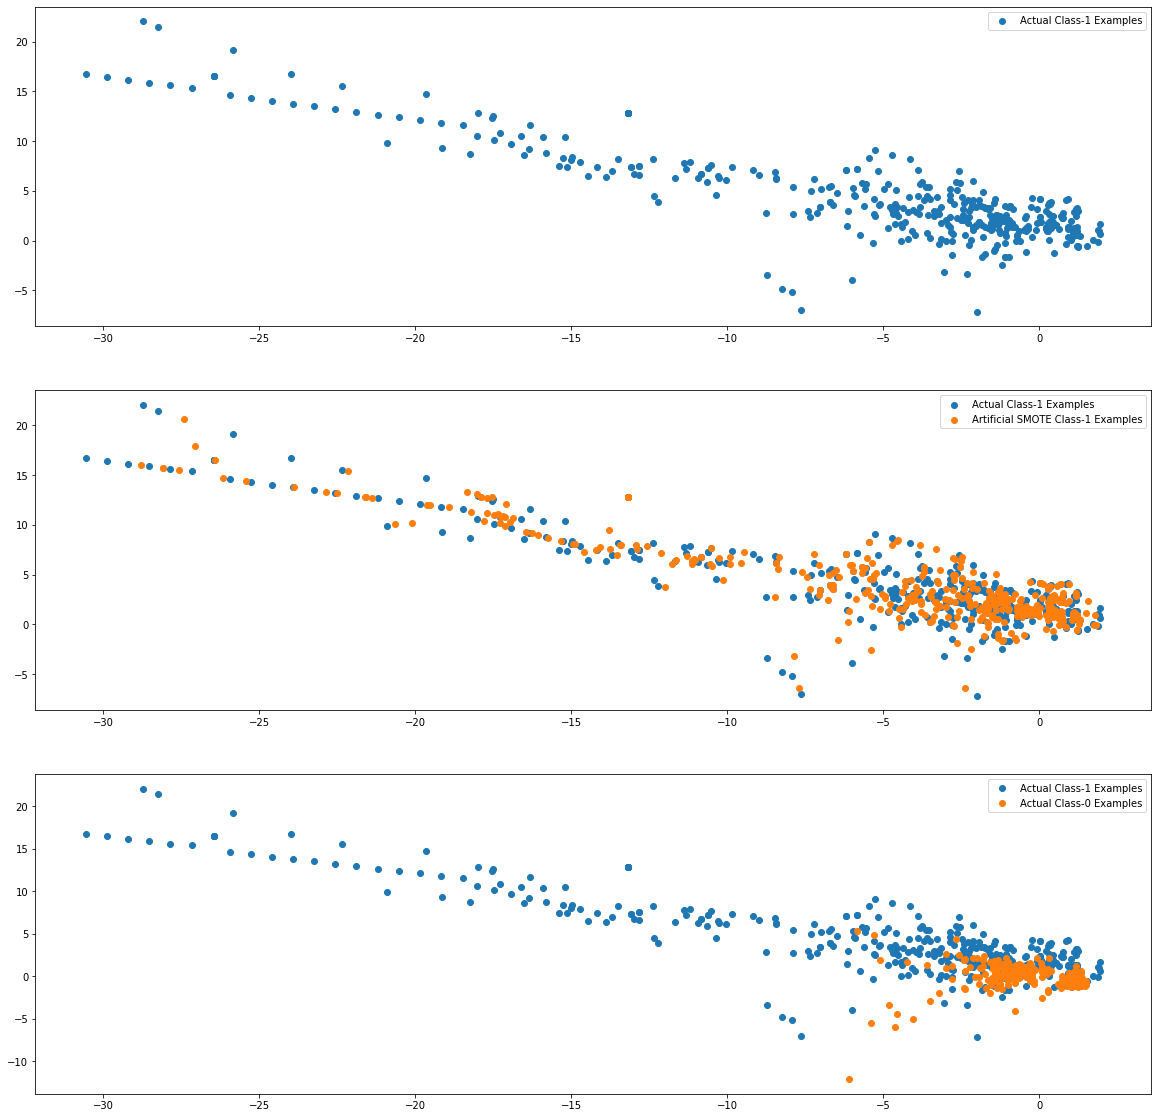

In [69]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
SMOTE = over_sampling.SMOTE(random_state=0)

X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train) 

#Create dataframe
#X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_Smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


#Create dataframe
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [70]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.992964029165309
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.80688782  0.67061187  0.63181136  0.96514662  0.59349199 -0.71420473
  -0.73587024 -0.47692358 -0.48070763 -1.05524506  0.66624362 -1.23572261
  -0.25280209 -1.49005647  0.10323365 -0.73919522 -0.88319865 -0.49013122
   0.23008618 -1.12738049  0.00655495  0.58877218  0.39058227 -0.80766703
   0.49444356  0.09733158 -0.34724204  0.78241143  0.00893185]]
[-5.10189556]
{1.0: array([[0.64836479, 0.78425958, 0.92254271, 0.97072402, 0.98644998,
        0.98986219, 0.99072274, 0.99156707, 0.99186807, 0.99195675,
        0.99196991, 0.99196991, 0.99196991, 0.99196991, 0.99196991,
        0.99196991, 0.99196991, 0.99196991, 0.99196991, 0.99196991],
       [0.64535121, 0.78373587, 0.92493545, 0.97315934, 0.9881777 ,
        0.99119638, 0.99191797, 0.9927044 , 0.99303307, 0.99312144,
        0.99313454, 0.99313454, 0.99313454, 0.99313454, 0.9931345

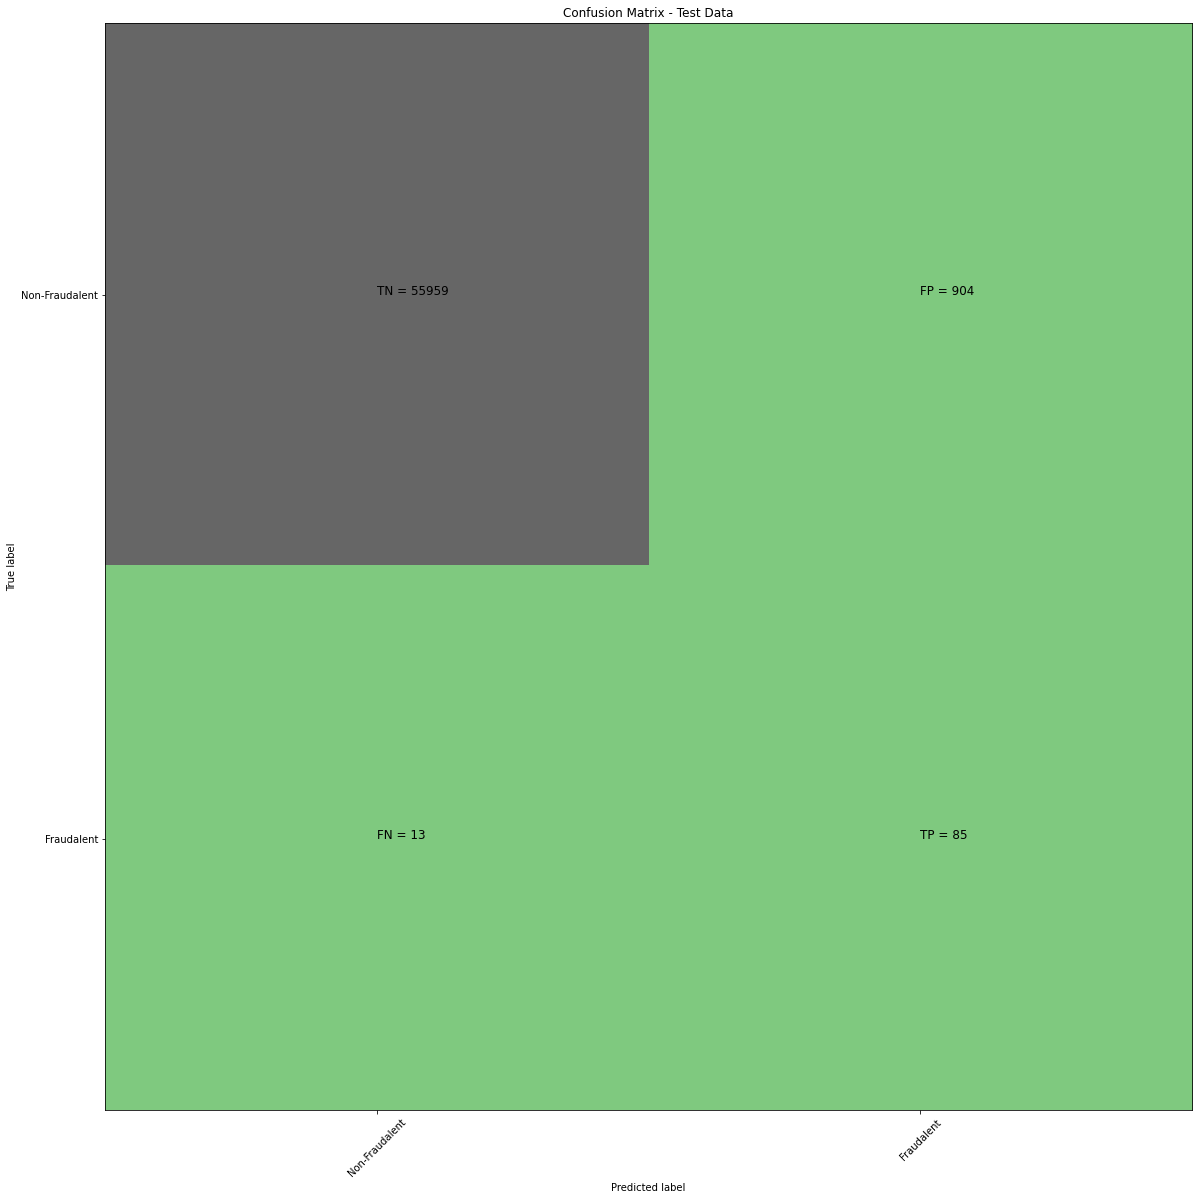

classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     56863
         1.0       0.09      0.87      0.16        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.57     56961
weighted avg       1.00      0.98      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


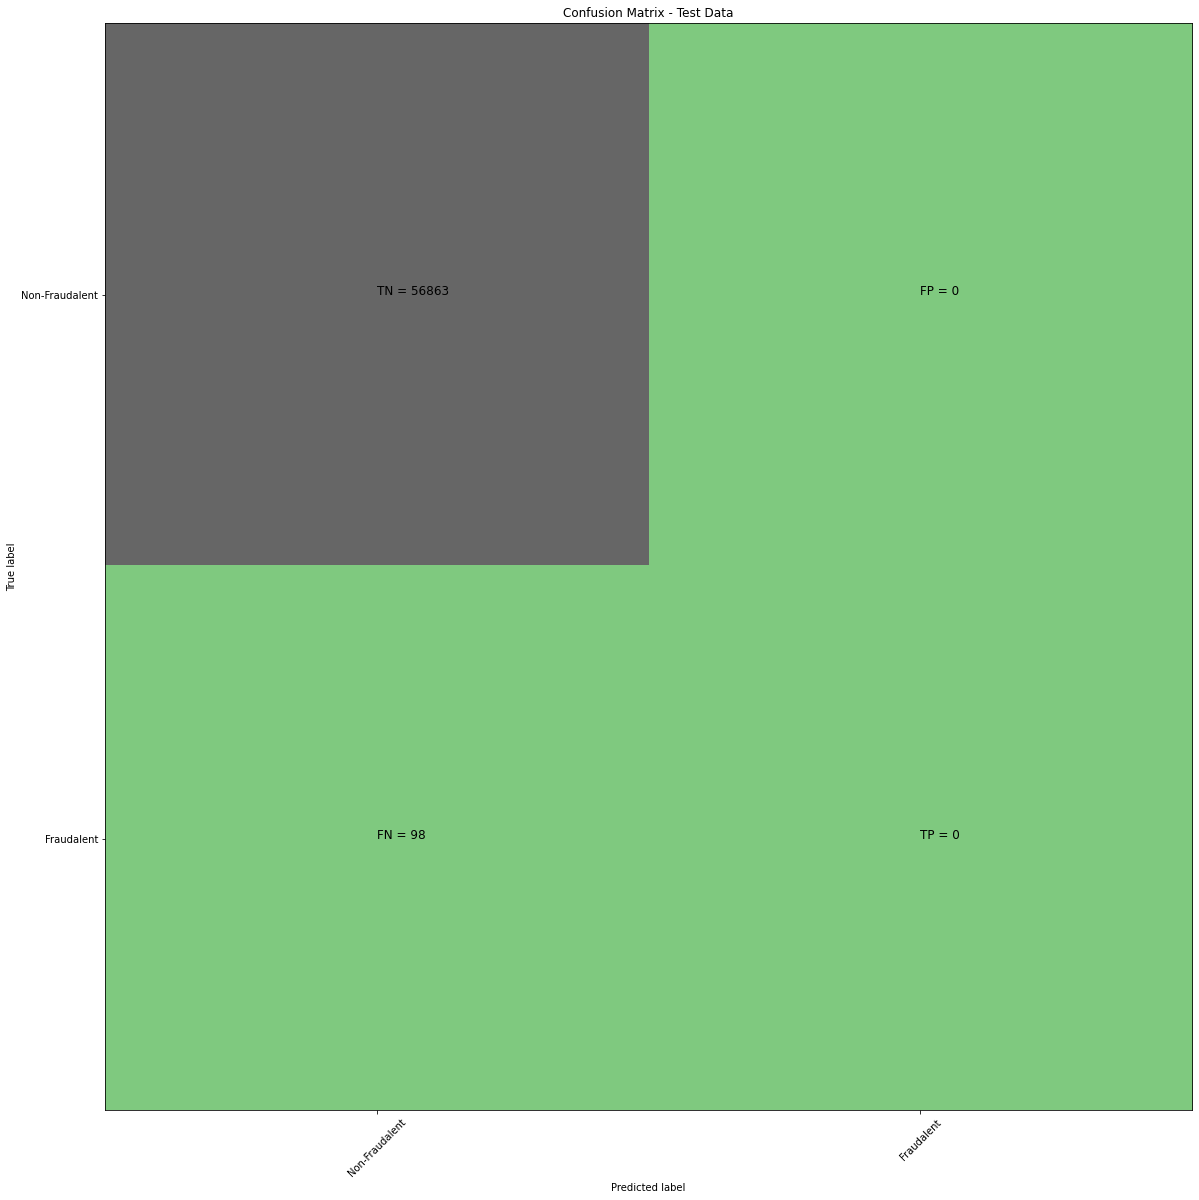

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9755969144599965
l2 threshold: 0.3812601987731249
ROC for the test dataset 97.6%


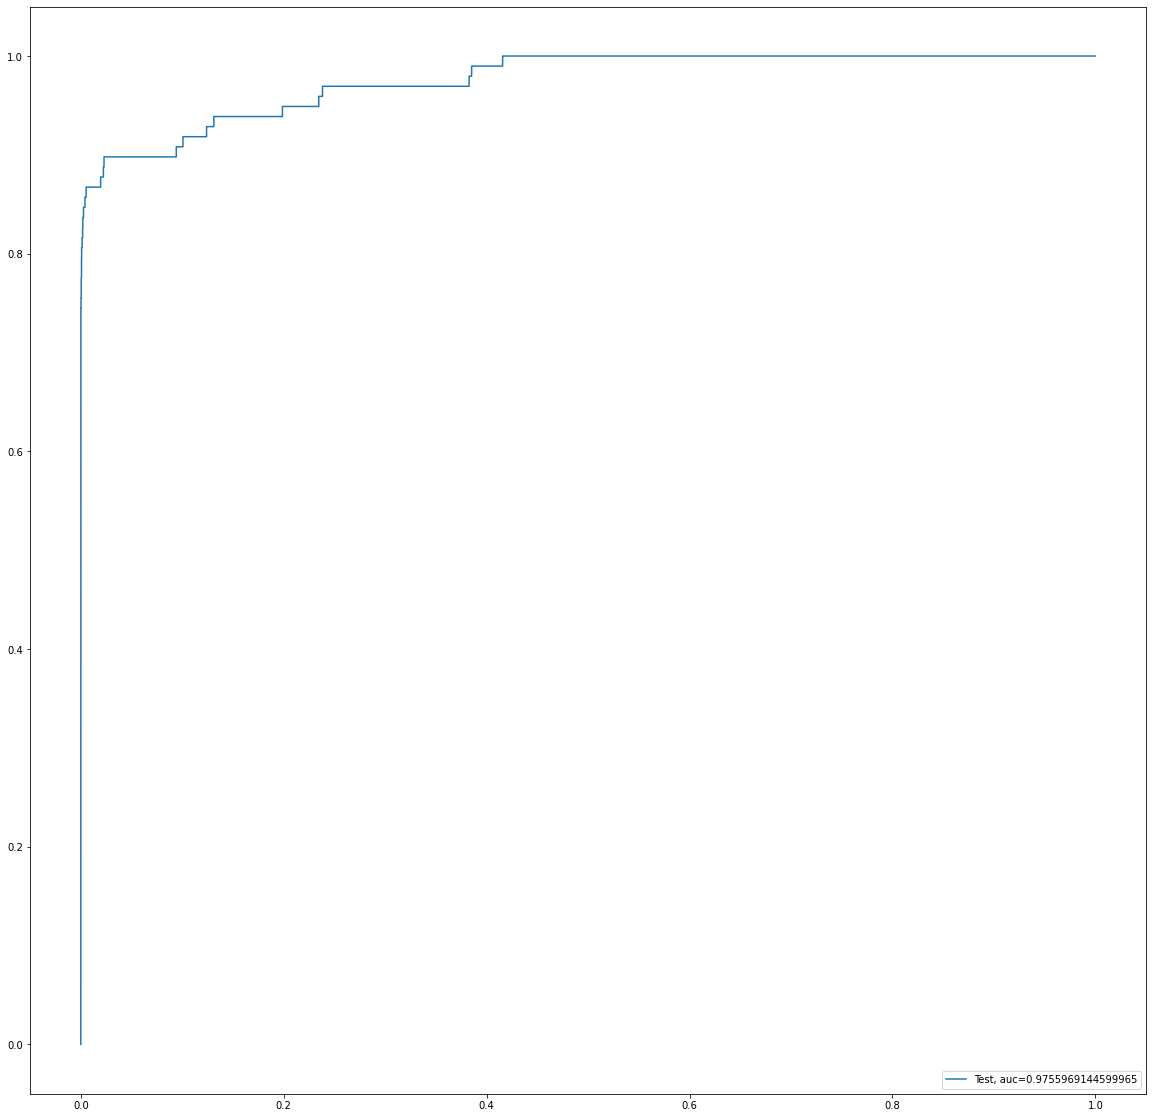

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


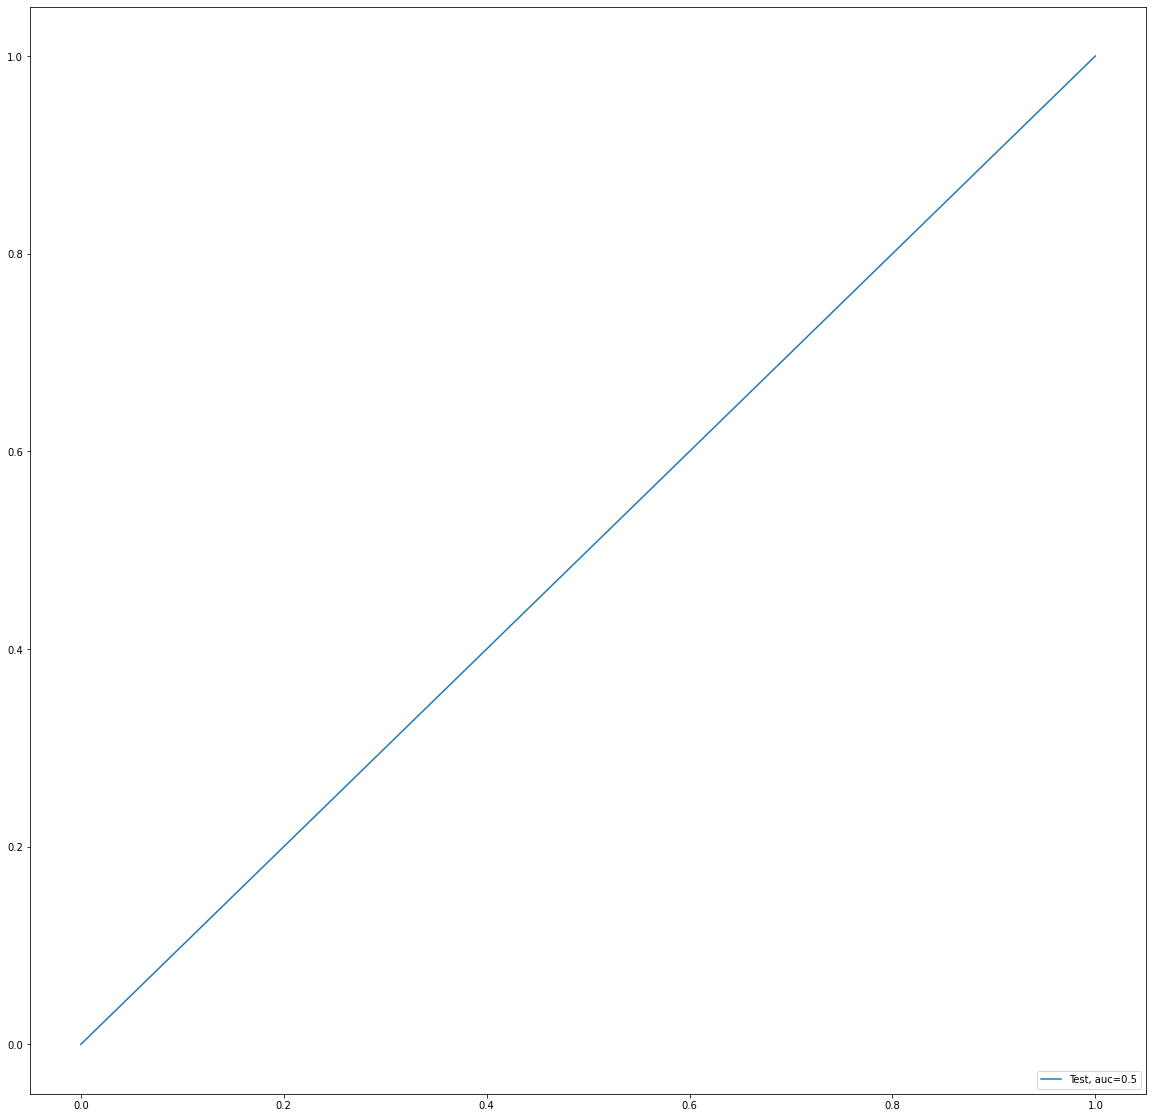

Time Taken by Model: --- 435.9121766090393 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9962079317427713
Confusion Matrix


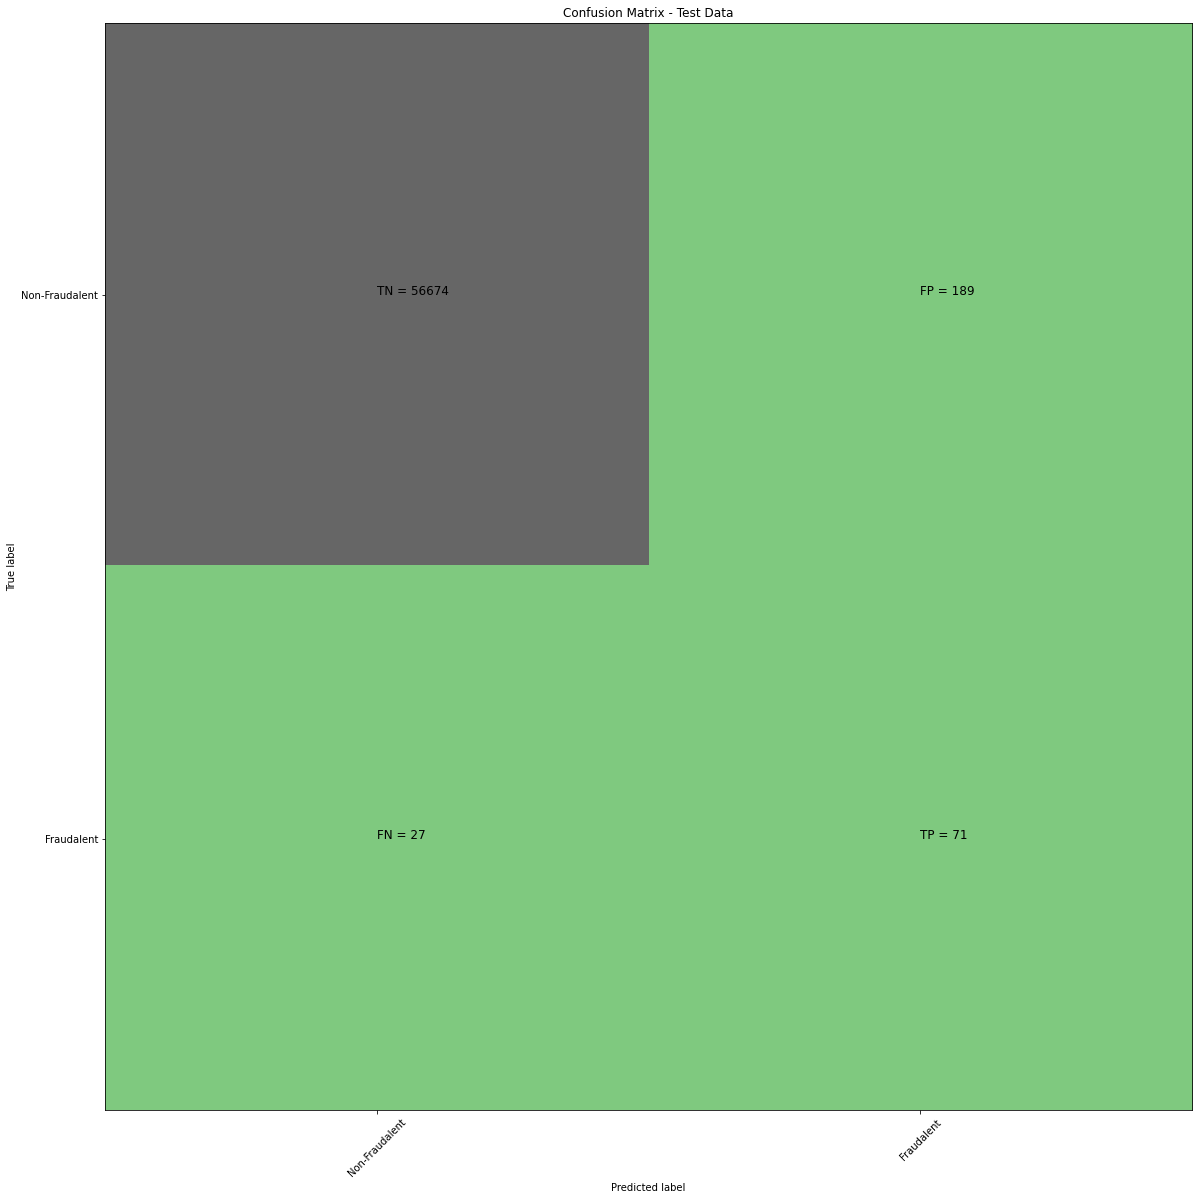

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.27      0.72      0.40        98

    accuracy                           1.00     56961
   macro avg       0.64      0.86      0.70     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8711781126639144
KNN threshold: 0.2
ROC for the test dataset 87.1%


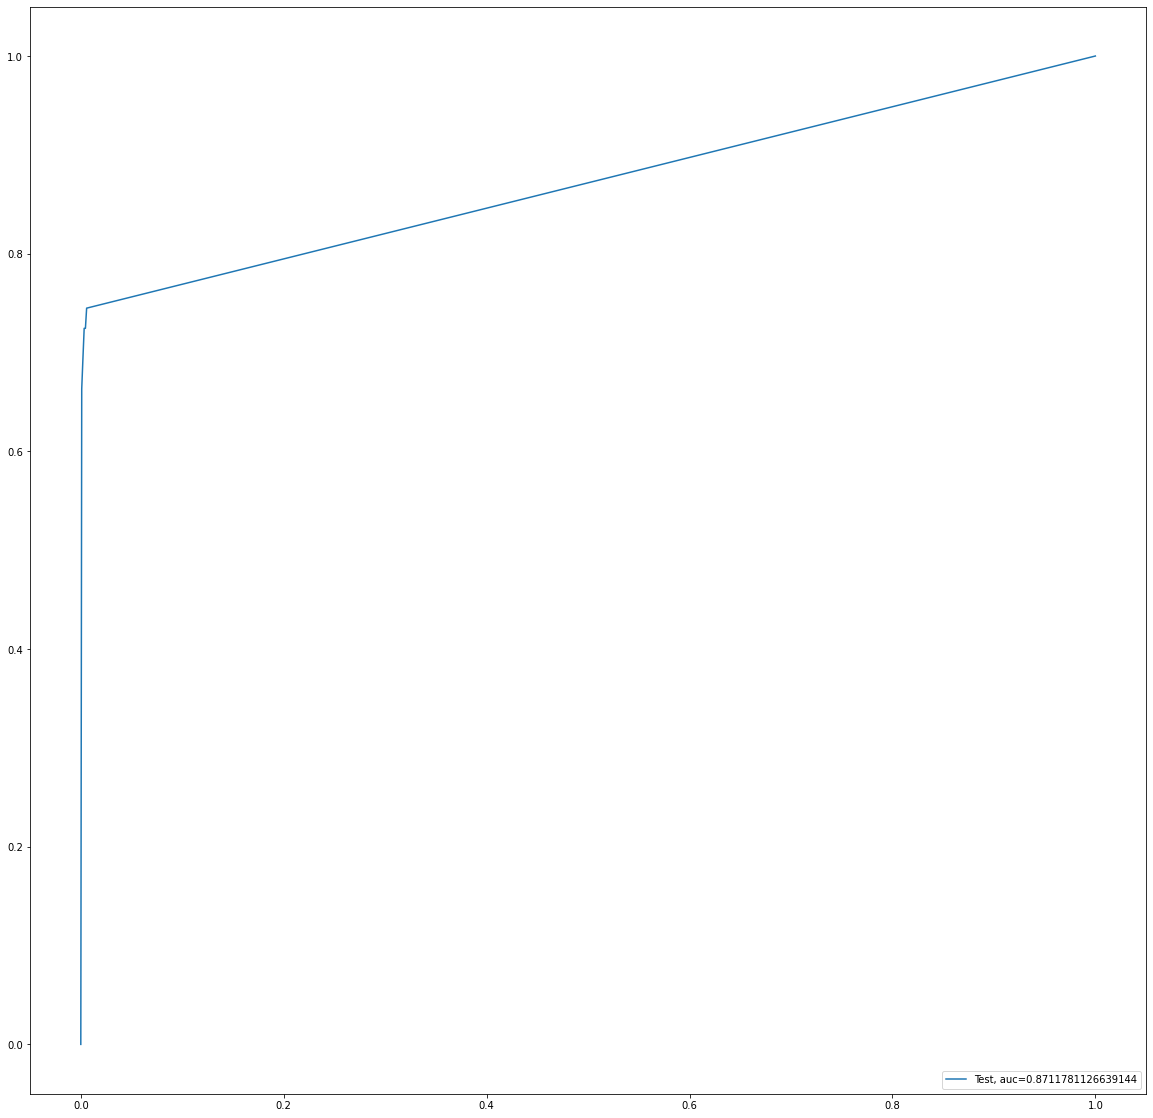

Time Taken by Model: --- 309.97213315963745 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9980512982567019
Confusion Matrix


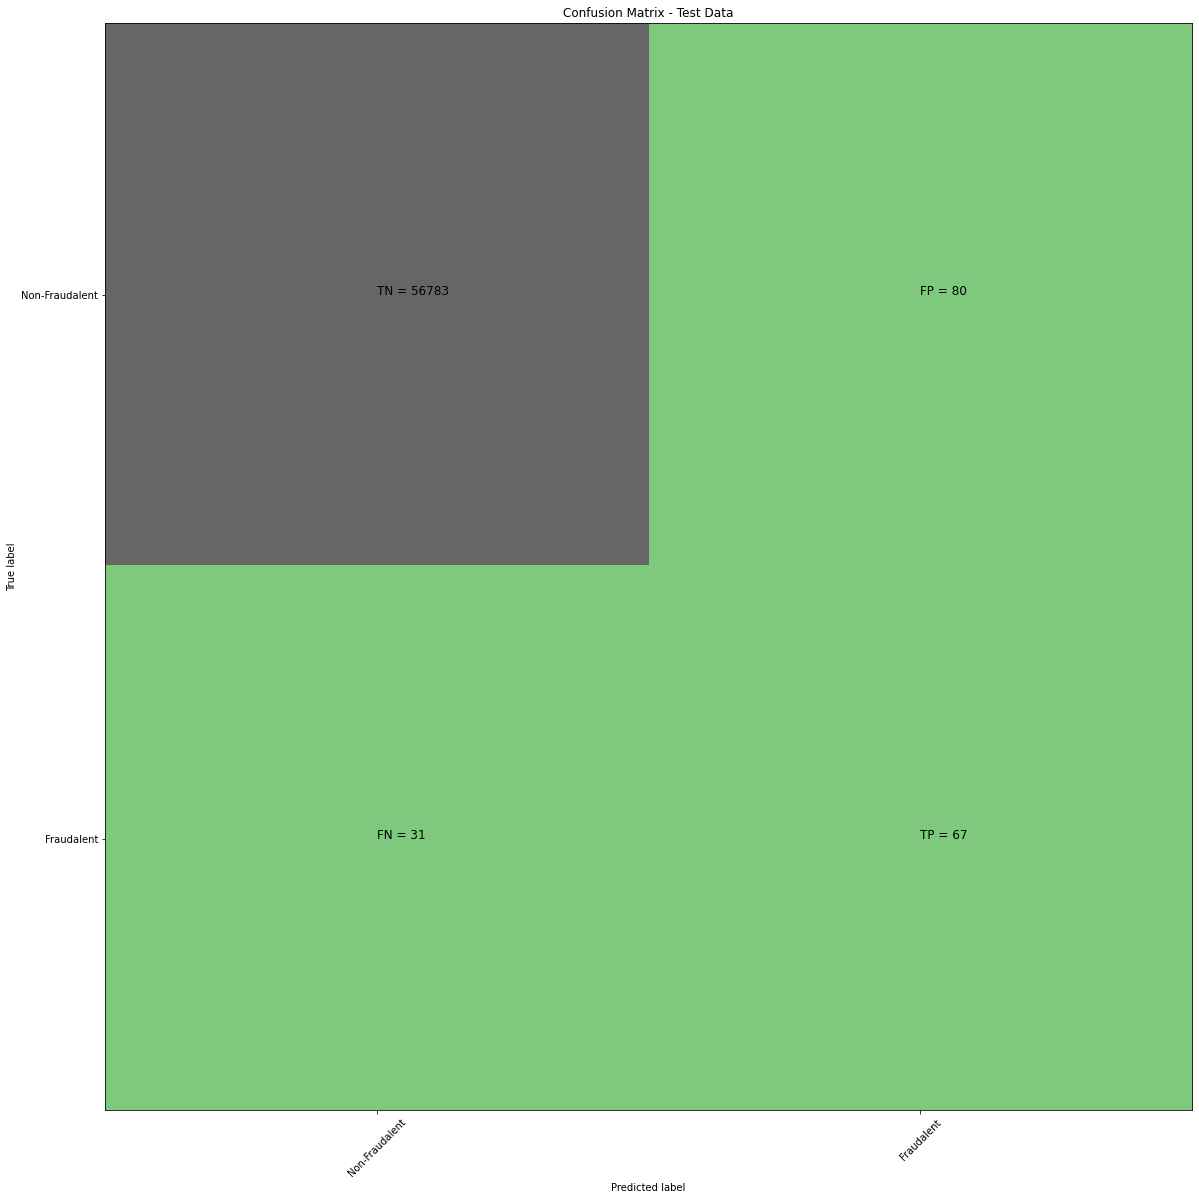

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.46      0.68      0.55        98

    accuracy                           1.00     56961
   macro avg       0.73      0.84      0.77     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8411332895713902
Tree threshold: 1.0
ROC for the test dataset 84.1%


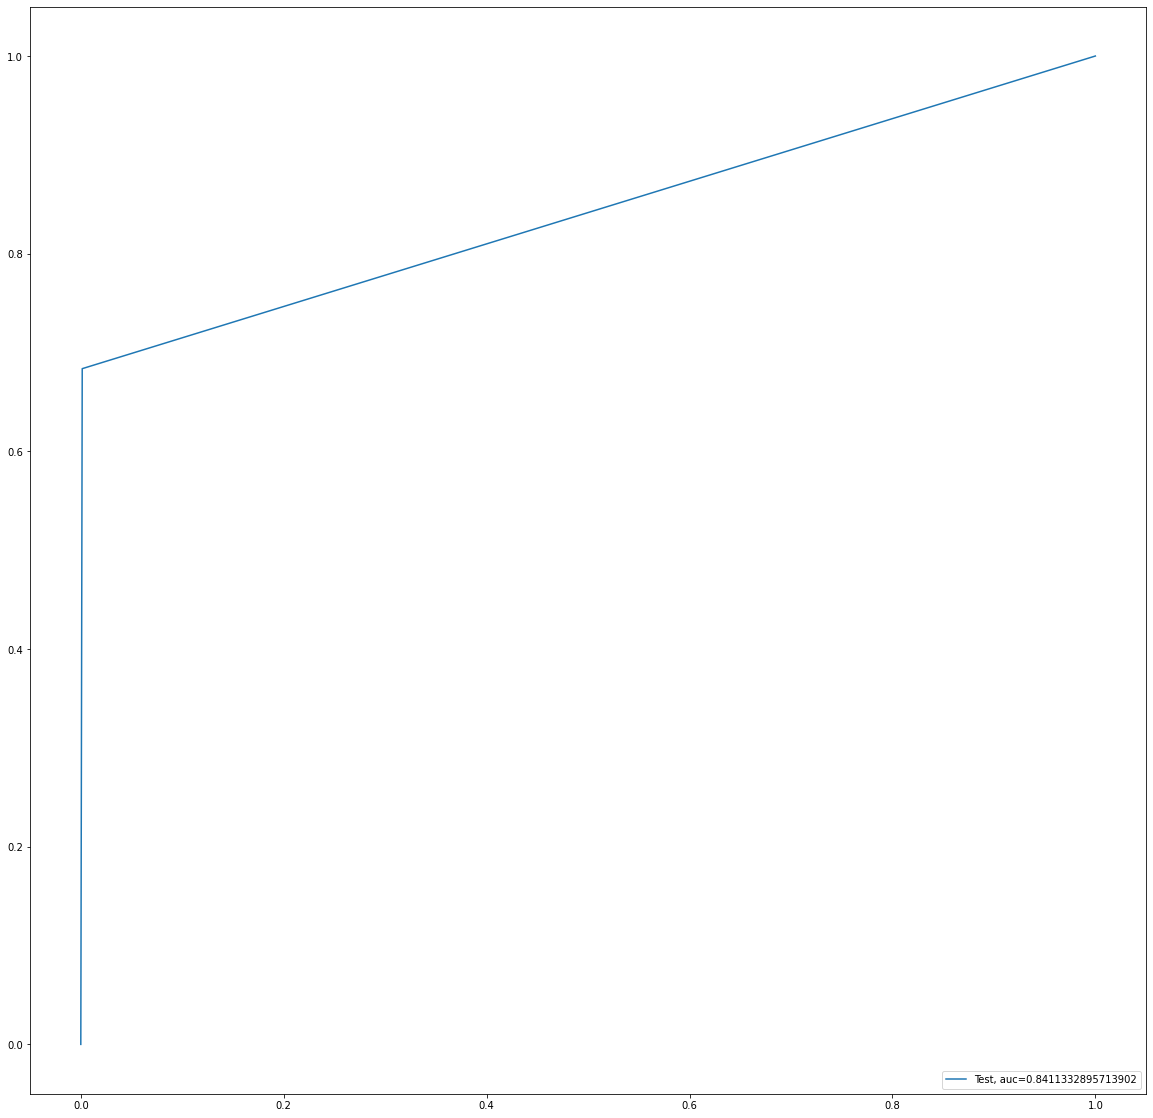

entropy score: 0.9983146363301206
Confusion Matrix


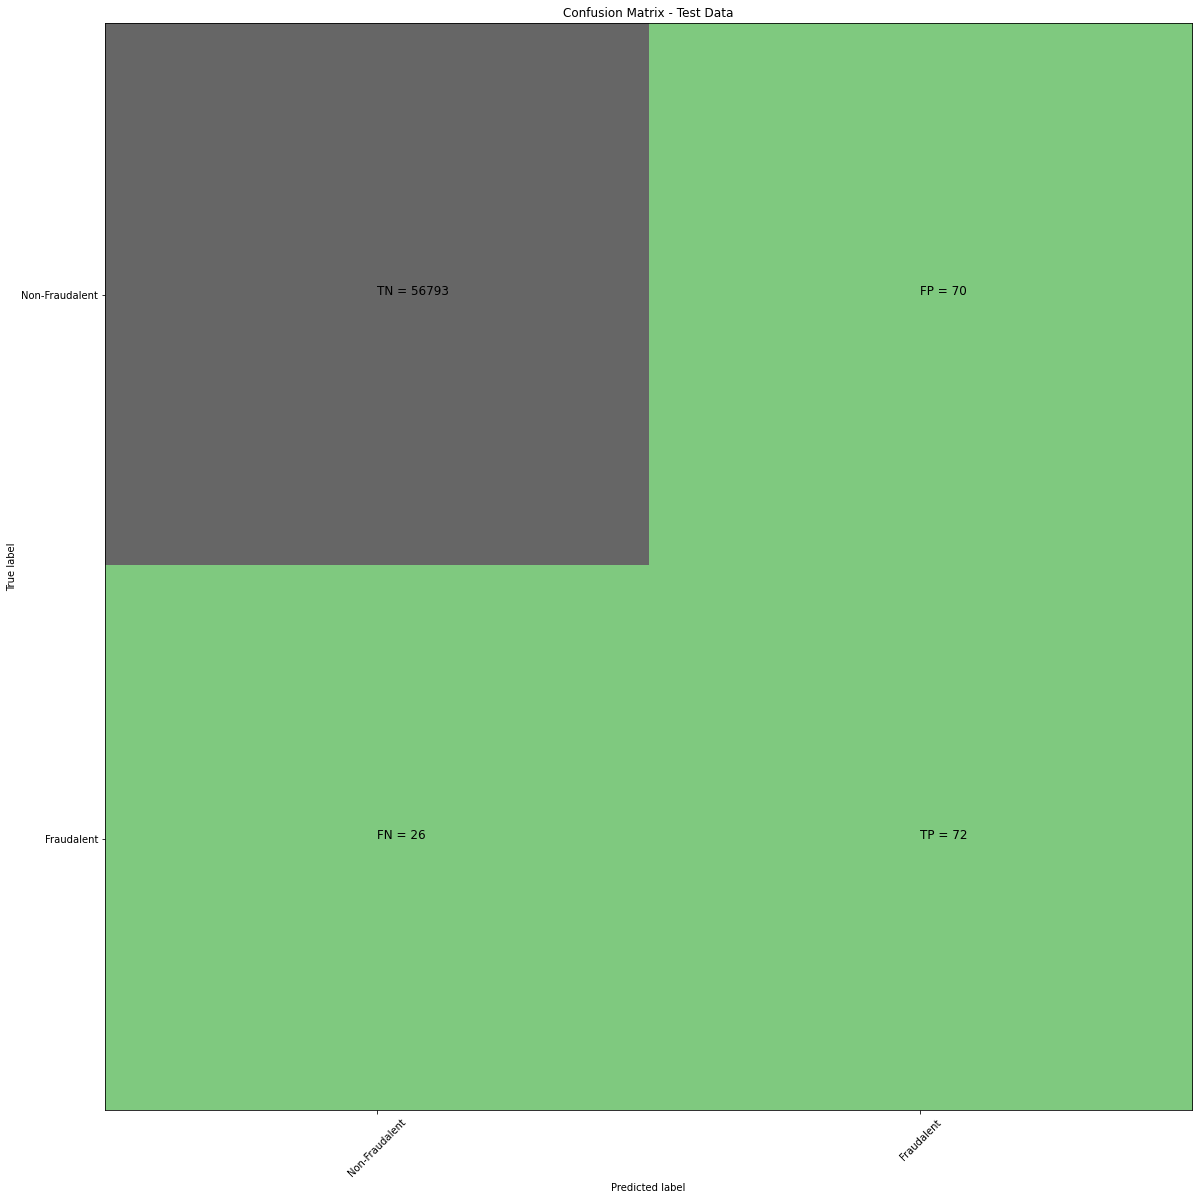

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.51      0.73      0.60        98

    accuracy                           1.00     56961
   macro avg       0.75      0.87      0.80     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8667314242933337
Tree threshold: 1.0
ROC for the test dataset 86.7%


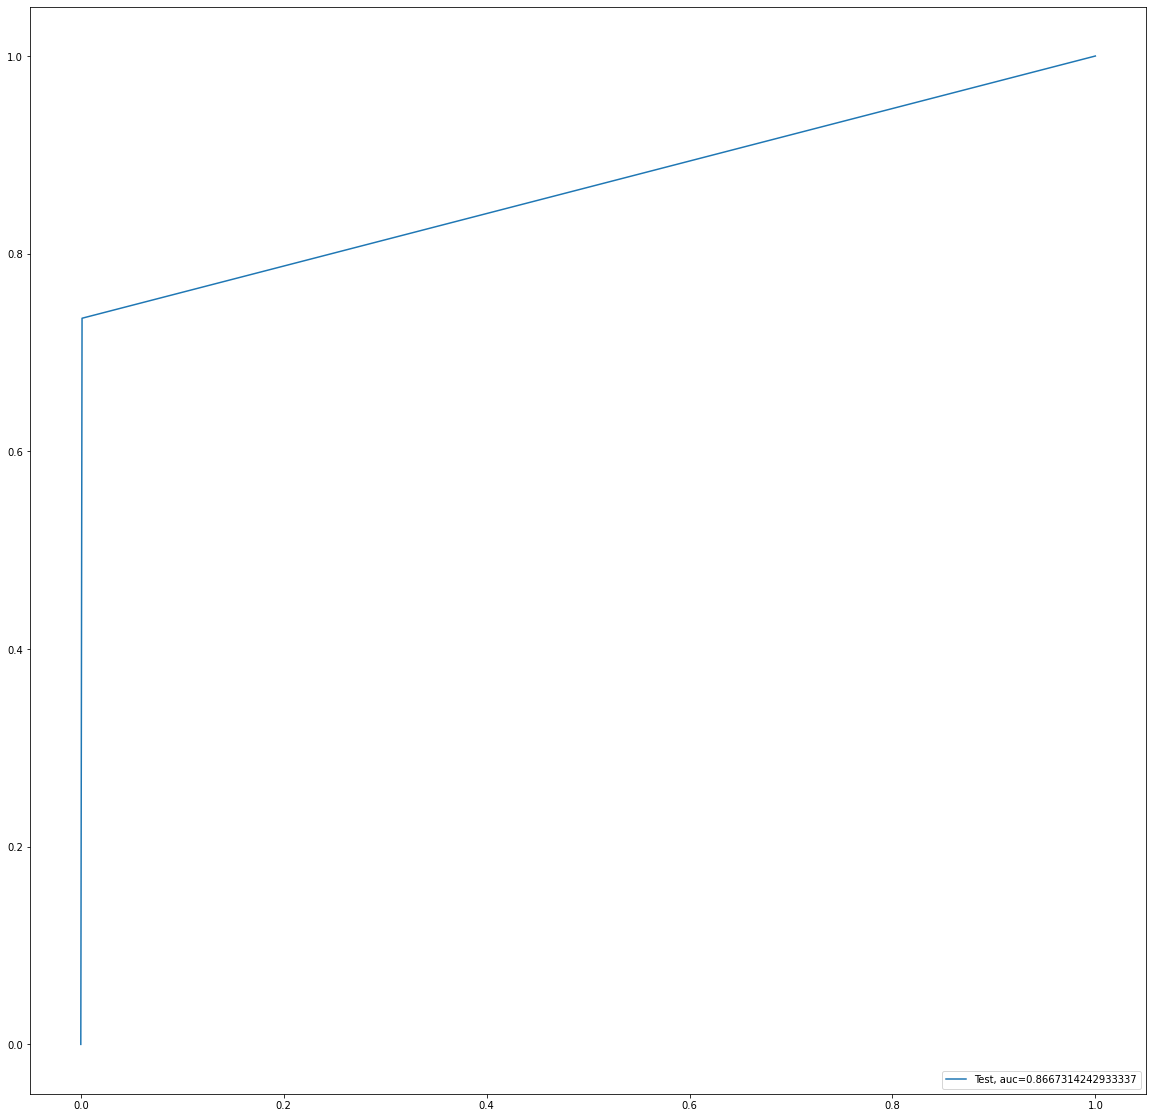

Time Taken by Model: --- 81.03439164161682 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995611032109689
Confusion Matrix


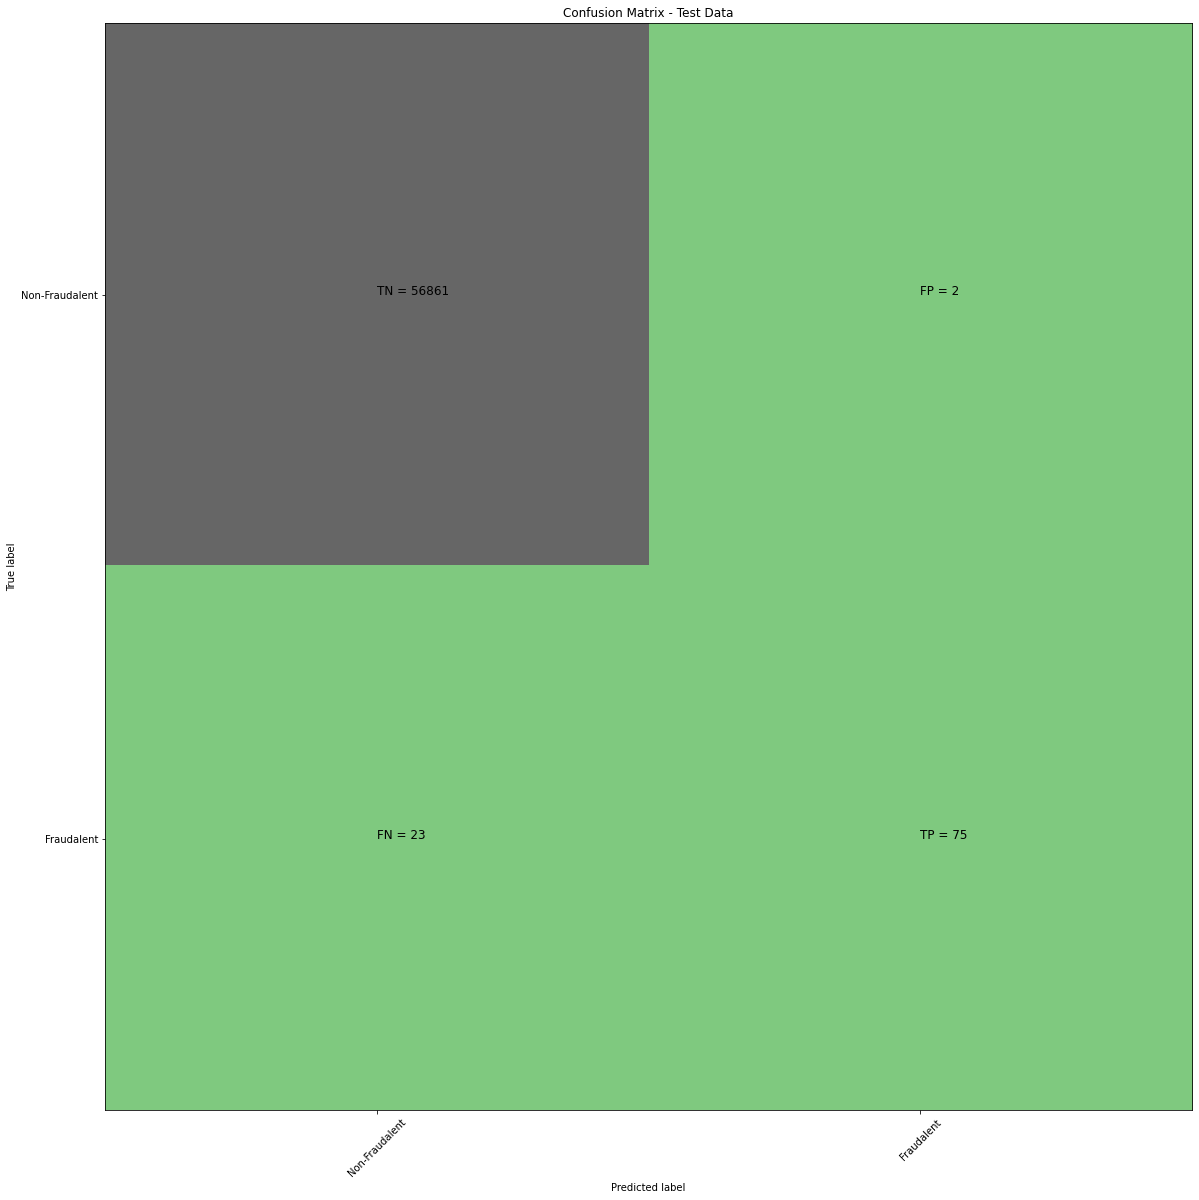

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.97      0.77      0.86        98

    accuracy                           1.00     56961
   macro avg       0.99      0.88      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9474941023663391
Random Forest threshold: 0.03
ROC for the test dataset 94.7%


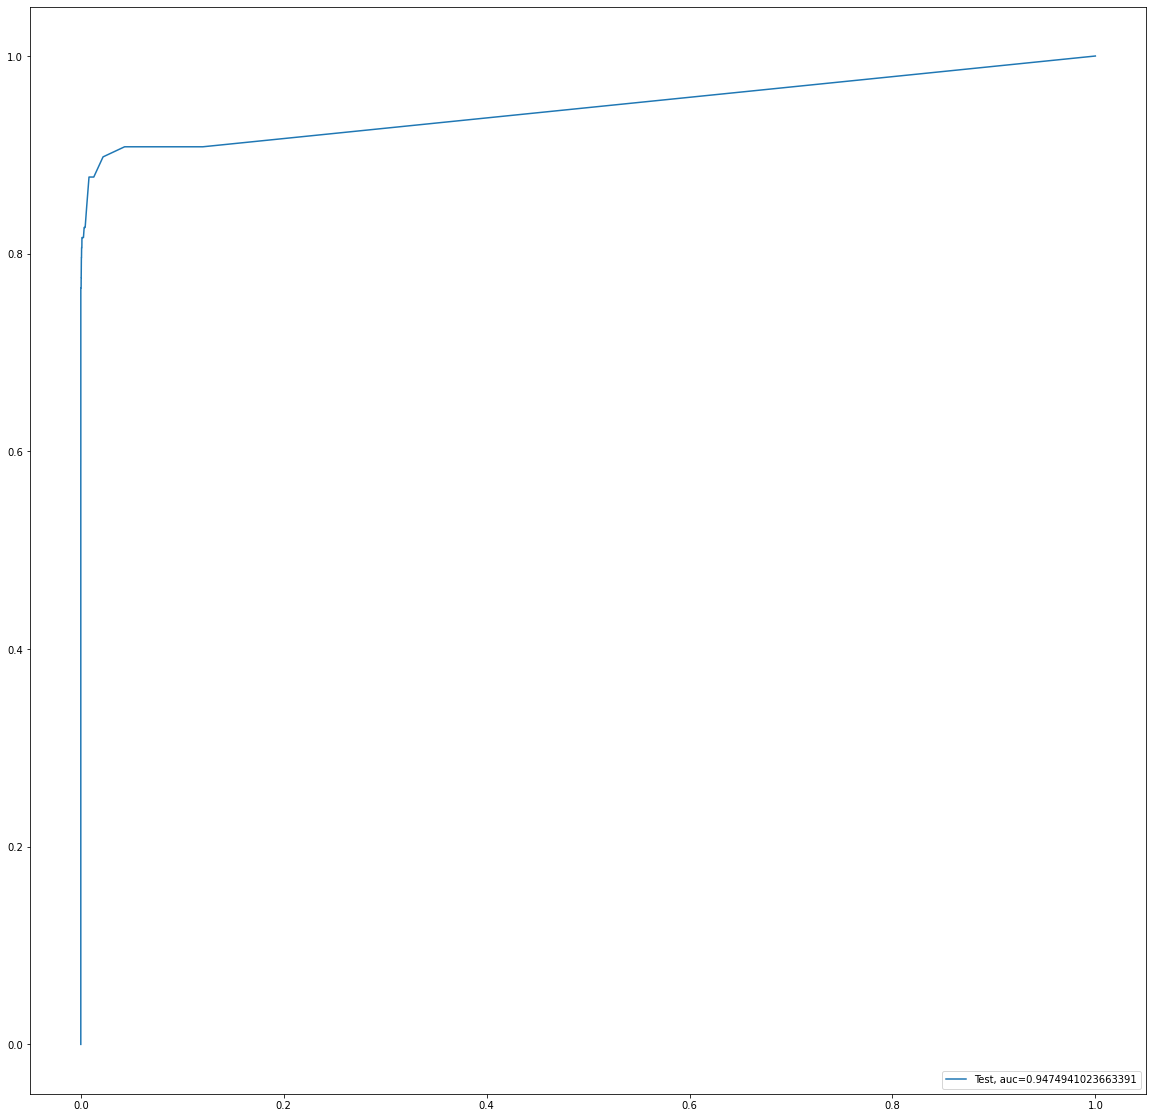

Time Taken by Model: --- 412.0829164981842 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.999420656238479
Confusion Matrix


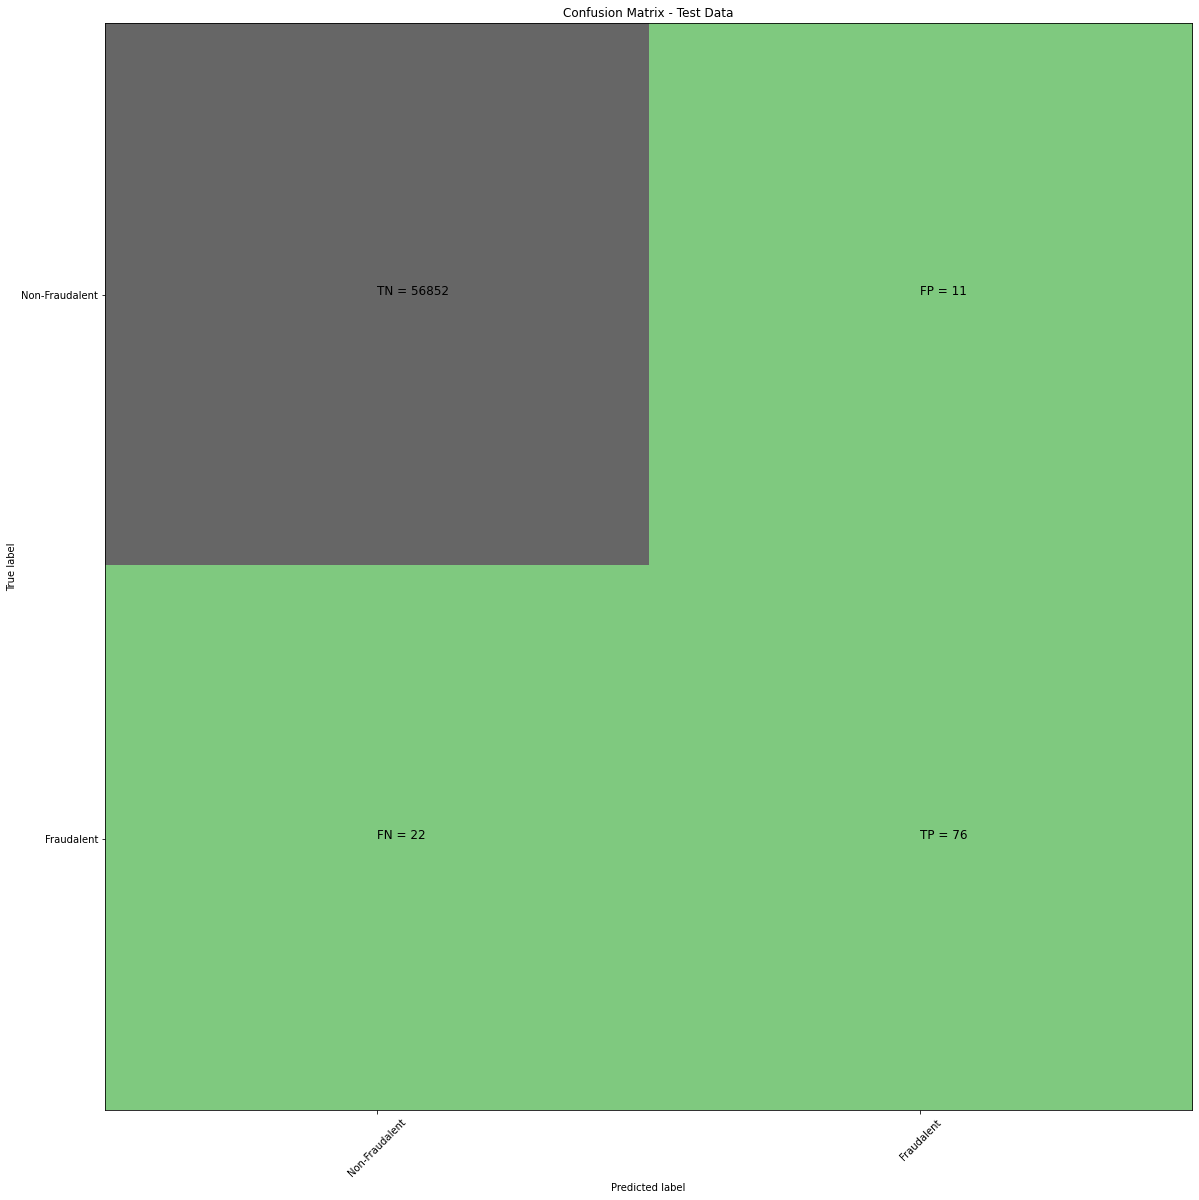

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.87      0.78      0.82        98

    accuracy                           1.00     56961
   macro avg       0.94      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.981597732035501
XGBoost threshold: 0.0002705000515561551
ROC for the test dataset 98.2%


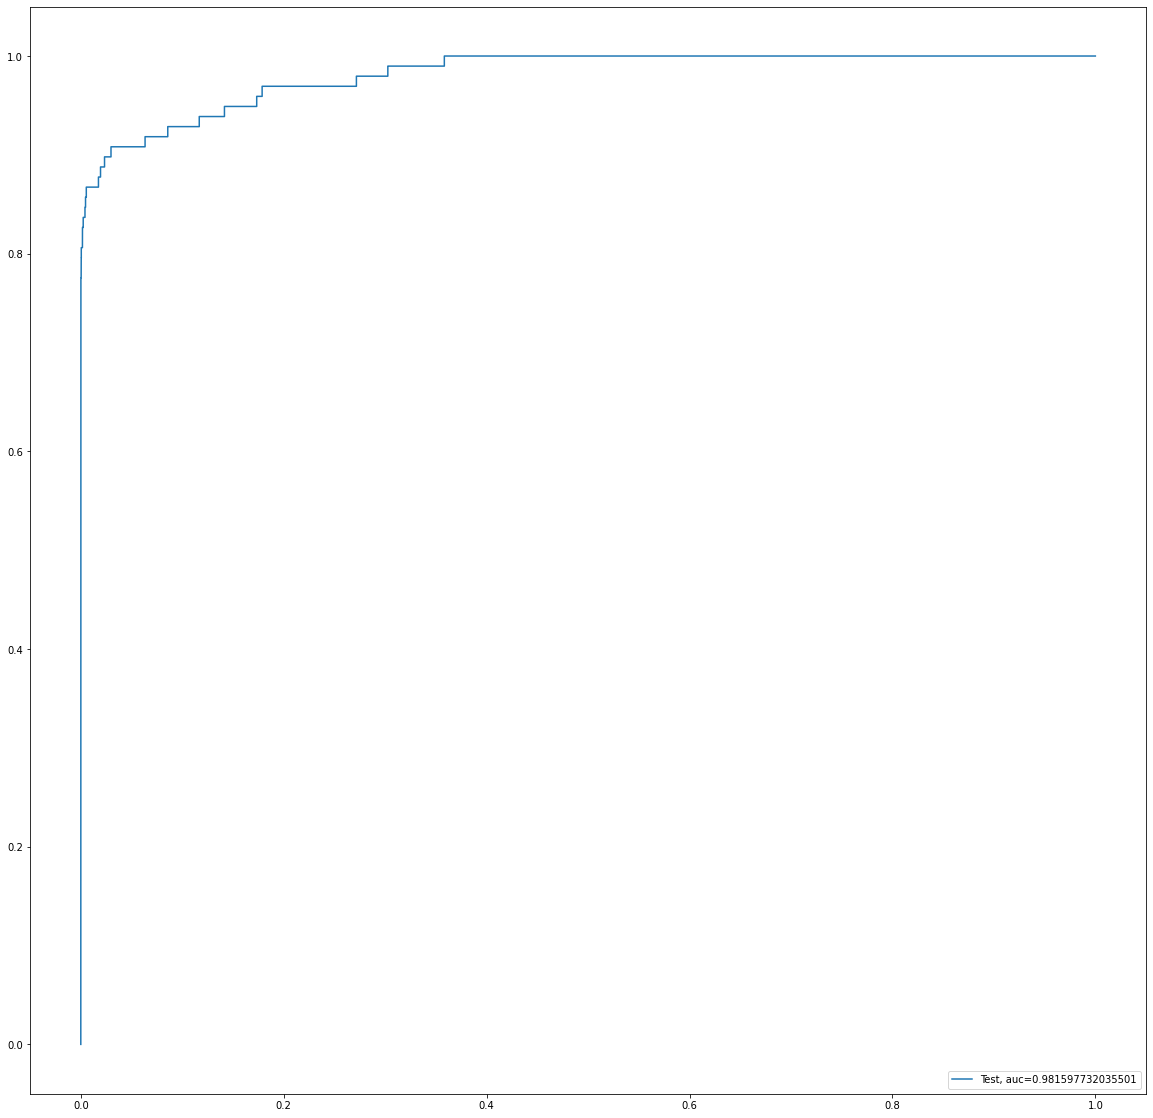

Time Taken by Model: --- 224.361501455307 seconds ---
--------------------------------------------------------------------------------


In [71]:
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
#print("SVM Model with Sigmoid Kernel")
#start_time = time.time()
#df_Results = buildAndRunSVMModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [72]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998964,0.966307,0.001029
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.971547,0.009045
2,Power Transformer,KNN,0.999350,0.900851,0.200000
3,Power Transformer,Tree Model with gini criteria,0.998999,0.874710,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999105,0.864364,1.000000
5,Power Transformer,Random Forest,0.999350,0.925014,0.010000
6,Power Transformer,XGBoost,0.999456,0.978537,0.000074
7,Power Transformer,SVM,0.998578,0.887599,0.001001
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998964,0.984553,0.002079
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999017,0.936530,0.009395


#### Oversampling with ADASYN Oversampling

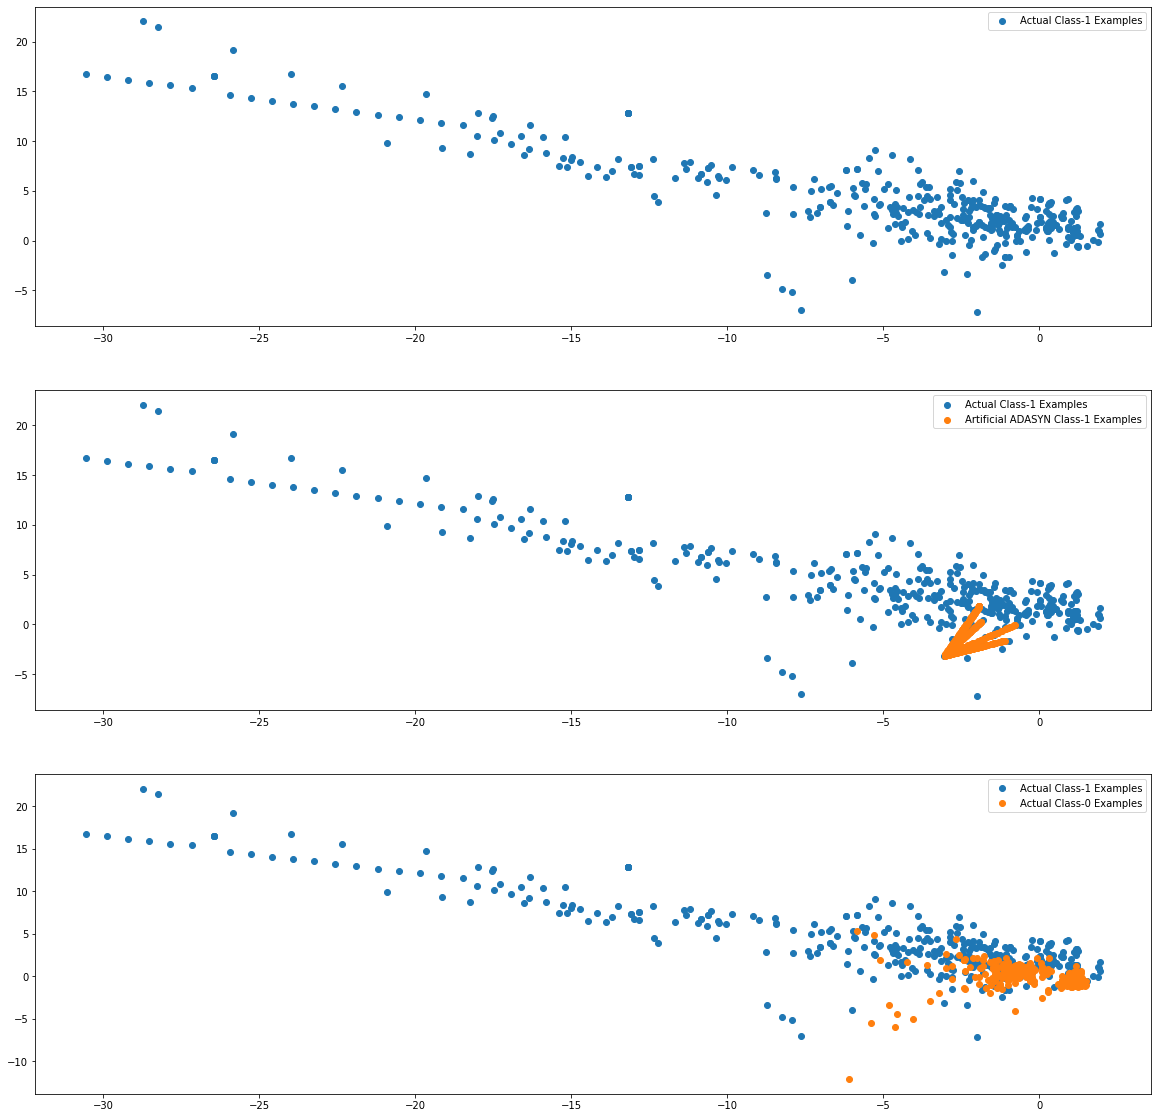

In [73]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ADASYN = over_sampling.ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_resample(X_train, y_train) 

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_ADASYN[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [74]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9812224147378877
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 1.03351641  1.05407453  0.81457972  0.96272687  0.90352197 -0.91749274
  -1.01518845 -0.54768235 -0.4128031  -1.03610875  0.8523098  -1.46096194
  -0.18292037 -1.98881587  0.12411577 -0.9673189  -1.24449321 -0.61640244
   0.36247551 -1.45962561 -0.19585519  0.7622733   0.66988686 -0.99511514
   0.76319912  0.24773046  0.03998689  1.36052073  0.01302858]]
[-4.68931113]
{1.0: array([[0.62624357, 0.64436533, 0.71907481, 0.86239421, 0.95417499,
        0.97155488, 0.97596227, 0.97913848, 0.98039772, 0.98078298,
        0.98086406, 0.98086406, 0.98087001, 0.98087001, 0.98087001,
        0.98087001, 0.98087001, 0.98087001, 0.98087001, 0.98087001],
       [0.62645316, 0.64494511, 0.72032663, 0.86328022, 0.95435134,
        0.97156587, 0.97601286, 0.97926897, 0.98054579, 0.98094275,
        0.98099872, 0.98099872, 0.98099872, 0.98099872, 0.980998

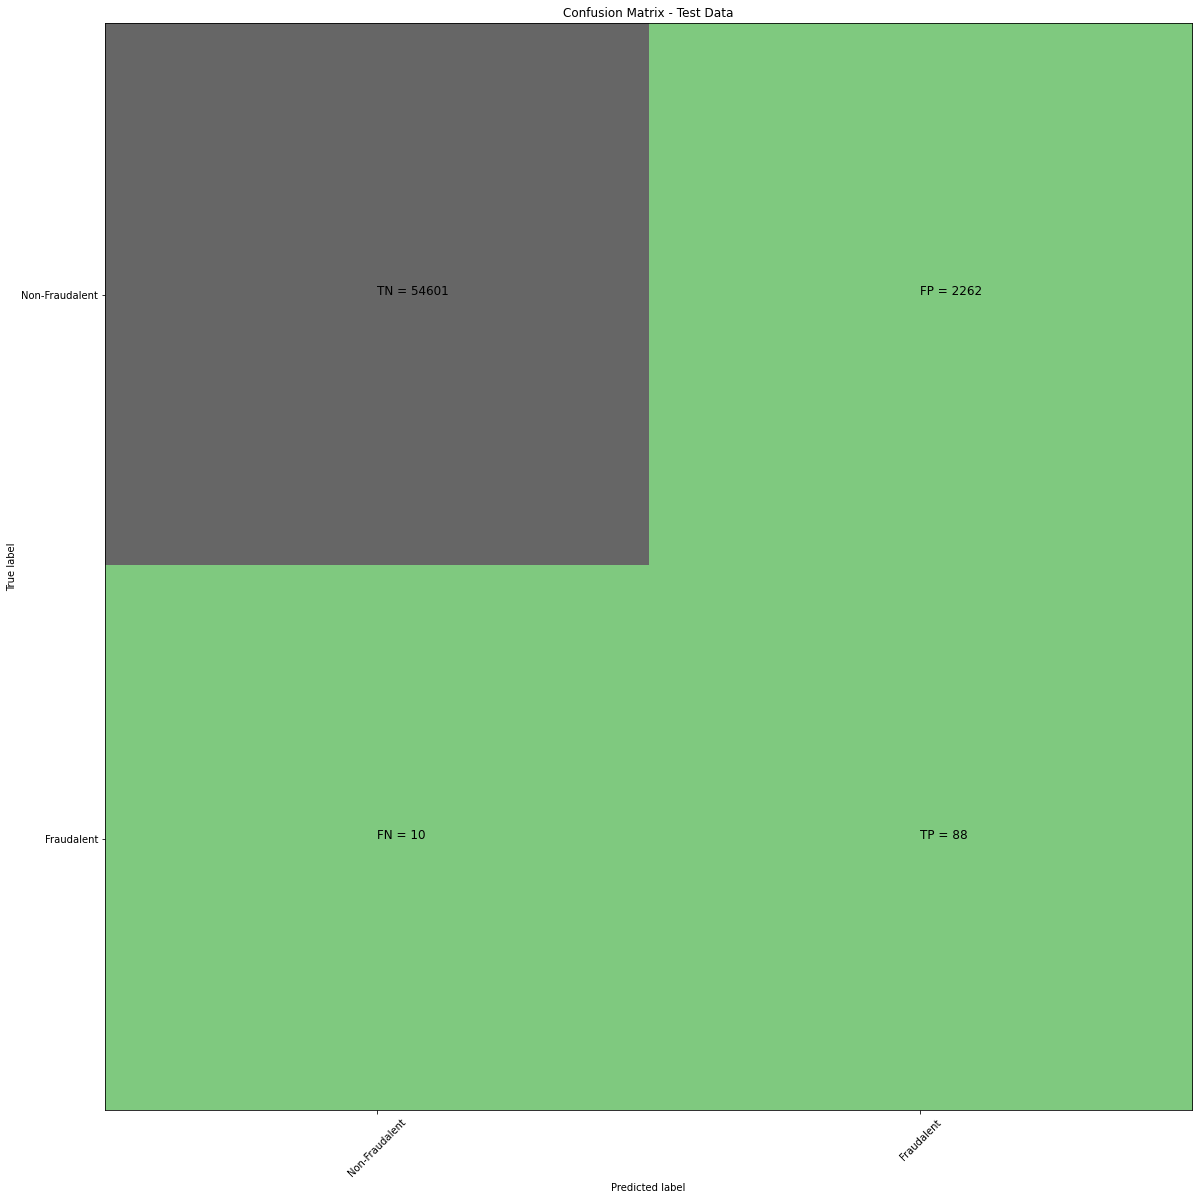

classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     56863
         1.0       0.04      0.90      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.93      0.53     56961
weighted avg       1.00      0.96      0.98     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


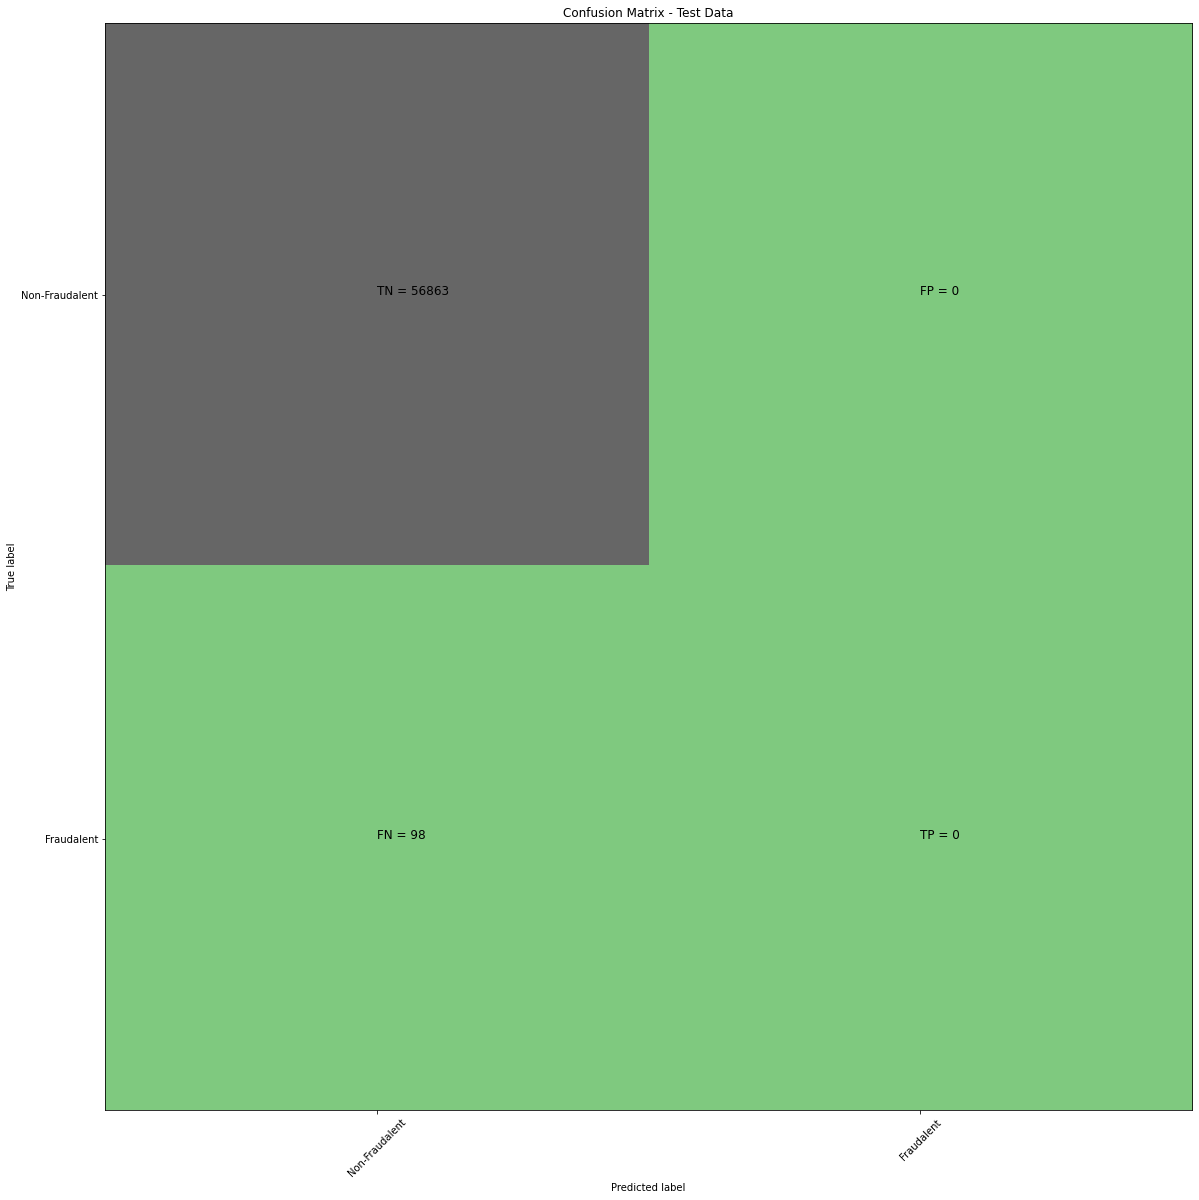

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9753496319654077
l2 threshold: 0.6324397983732278
ROC for the test dataset 97.5%


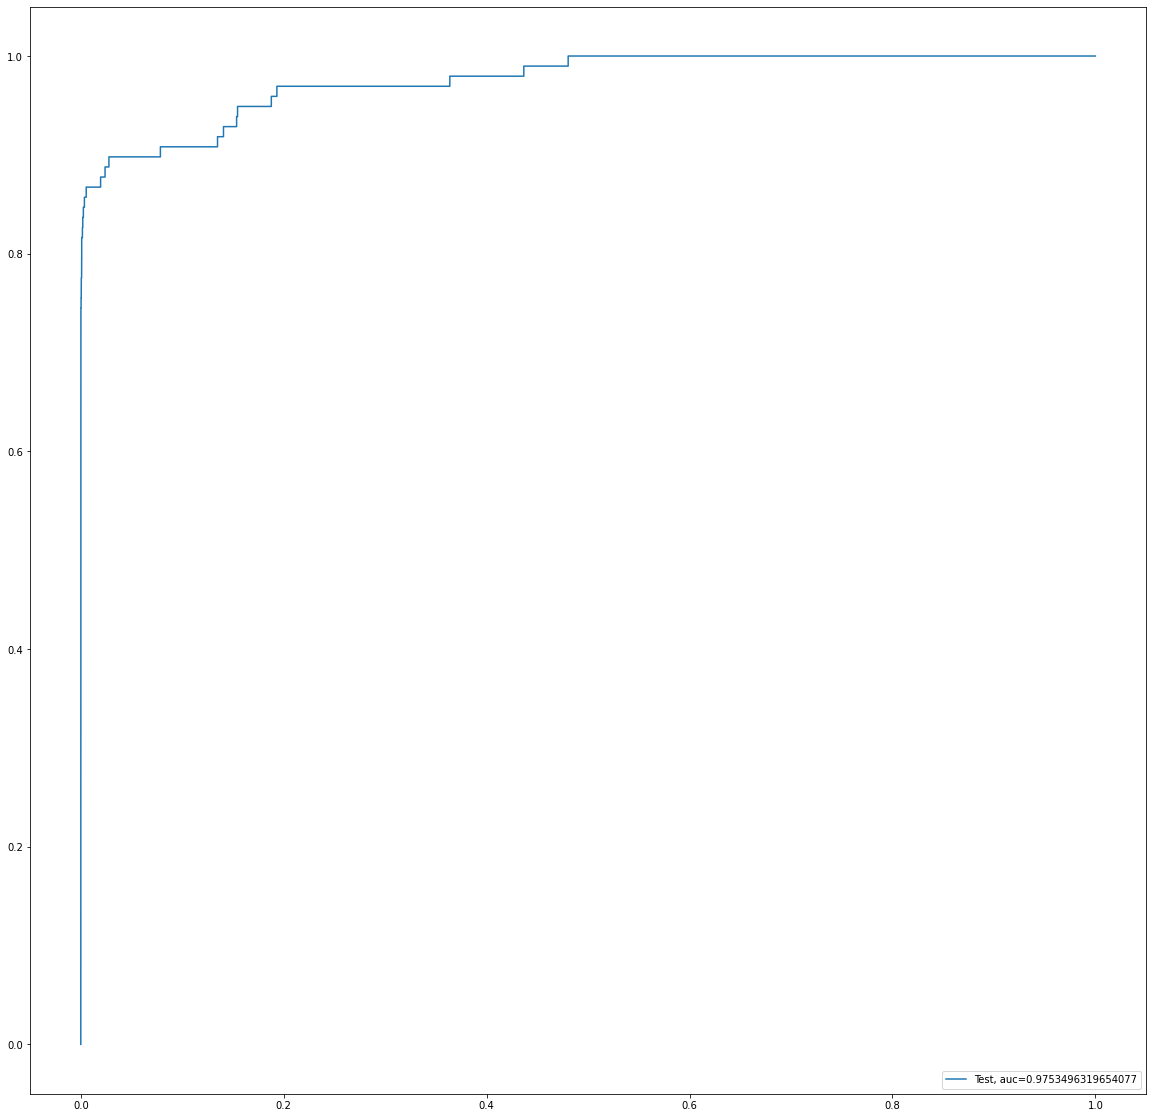

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


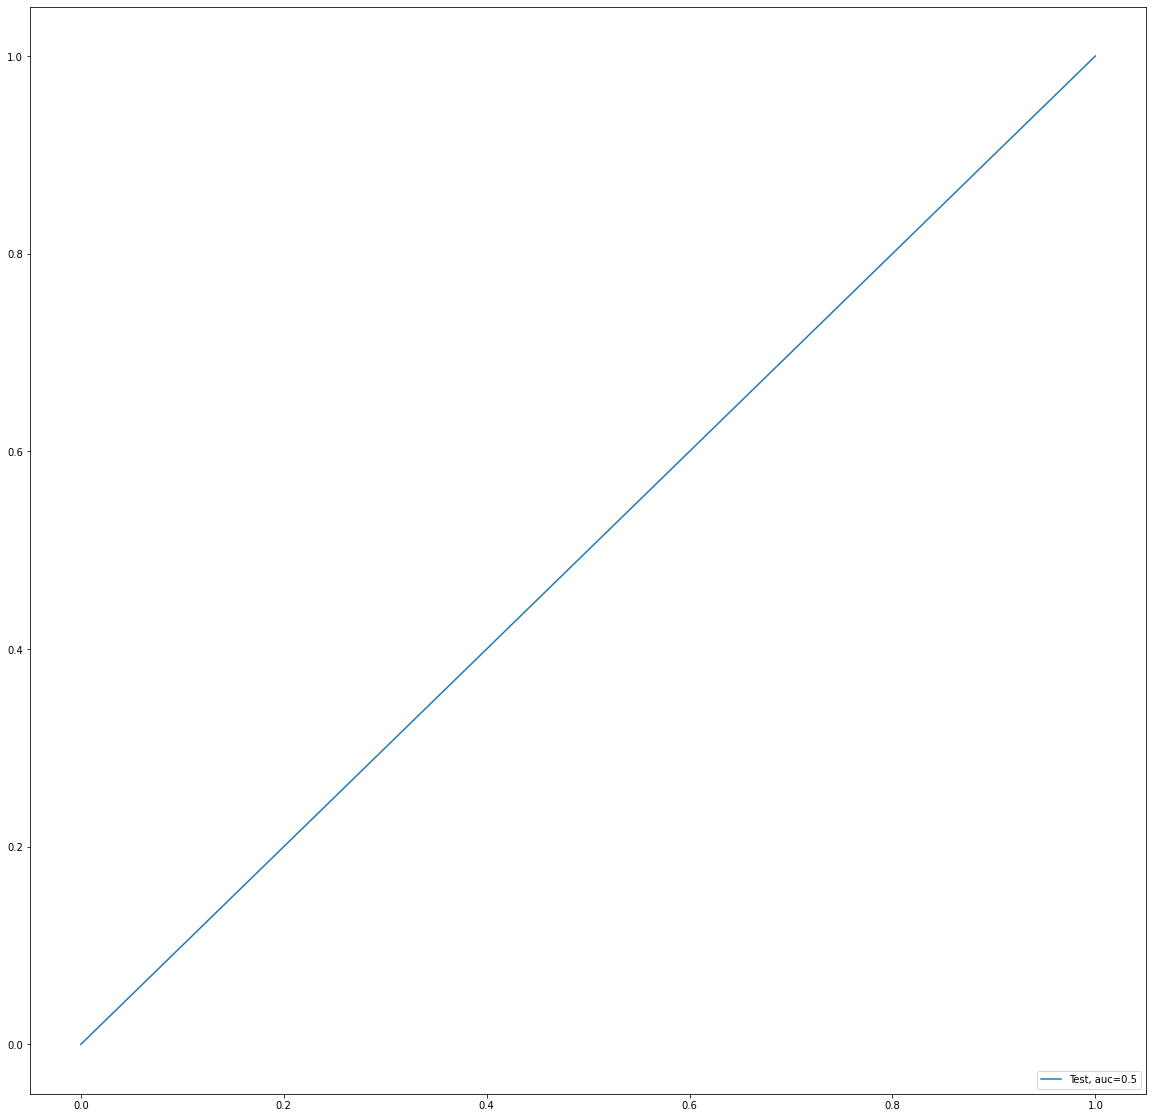

Time Taken by Model: --- 473.65122866630554 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9958392584399852
Confusion Matrix


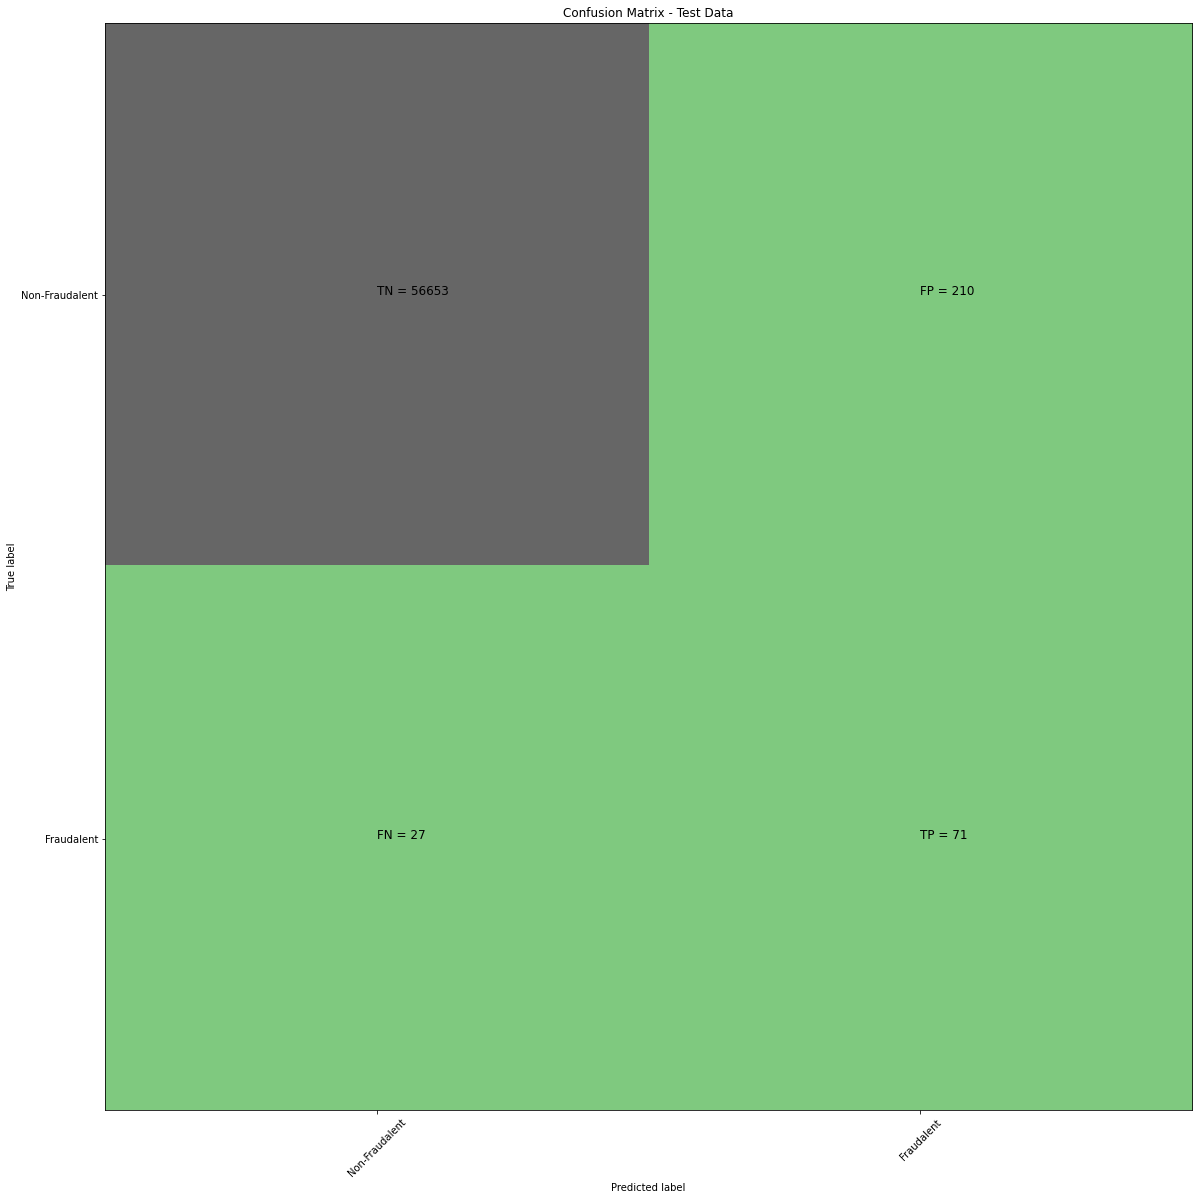

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.25      0.72      0.37        98

    accuracy                           1.00     56961
   macro avg       0.63      0.86      0.69     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8711282254843093
KNN threshold: 0.2
ROC for the test dataset 87.1%


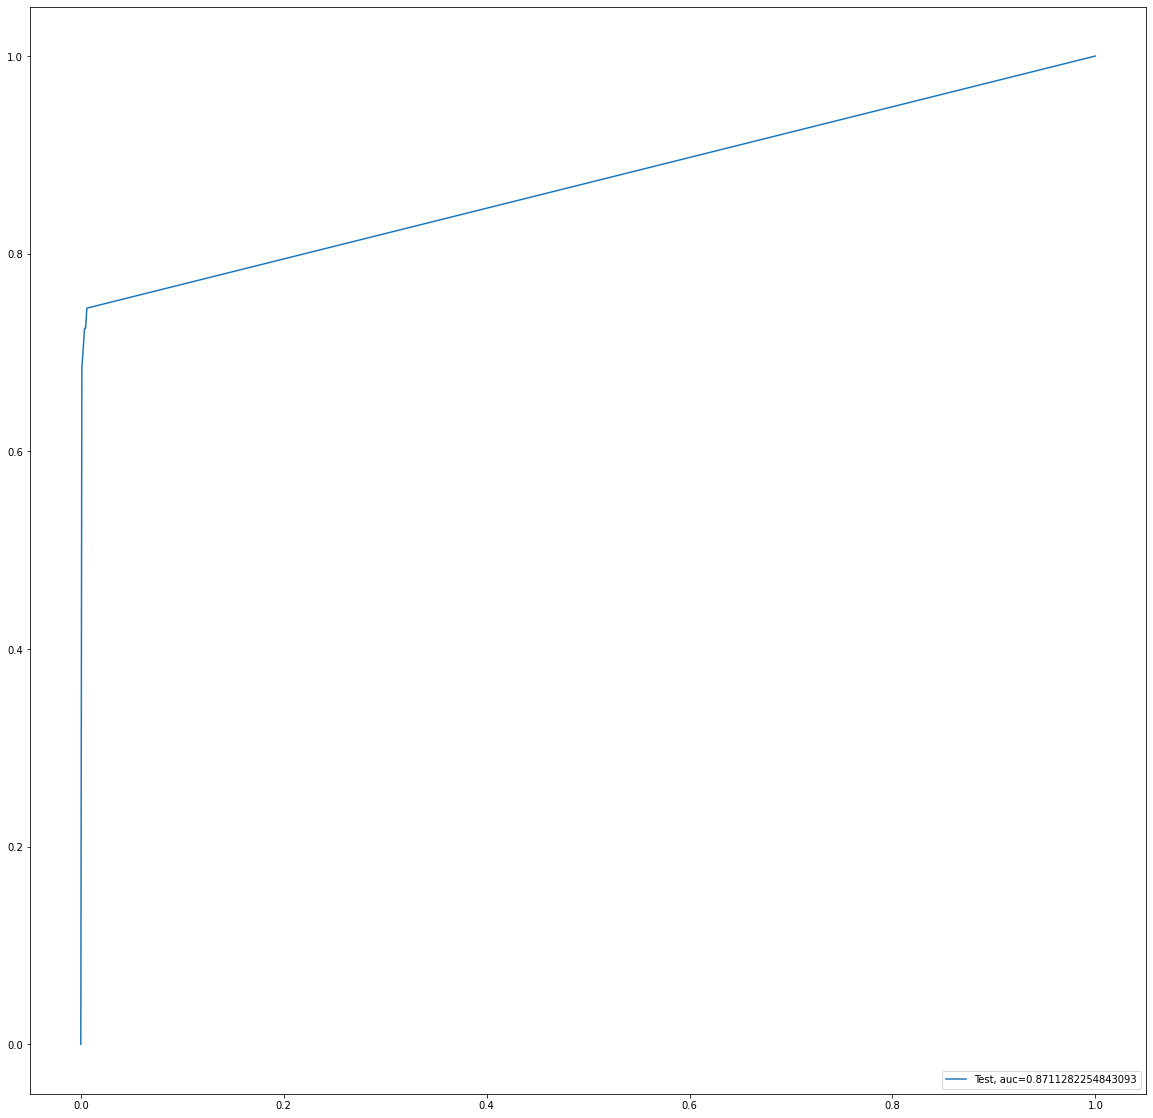

Time Taken by Model: --- 305.96382546424866 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9979284071557732
Confusion Matrix


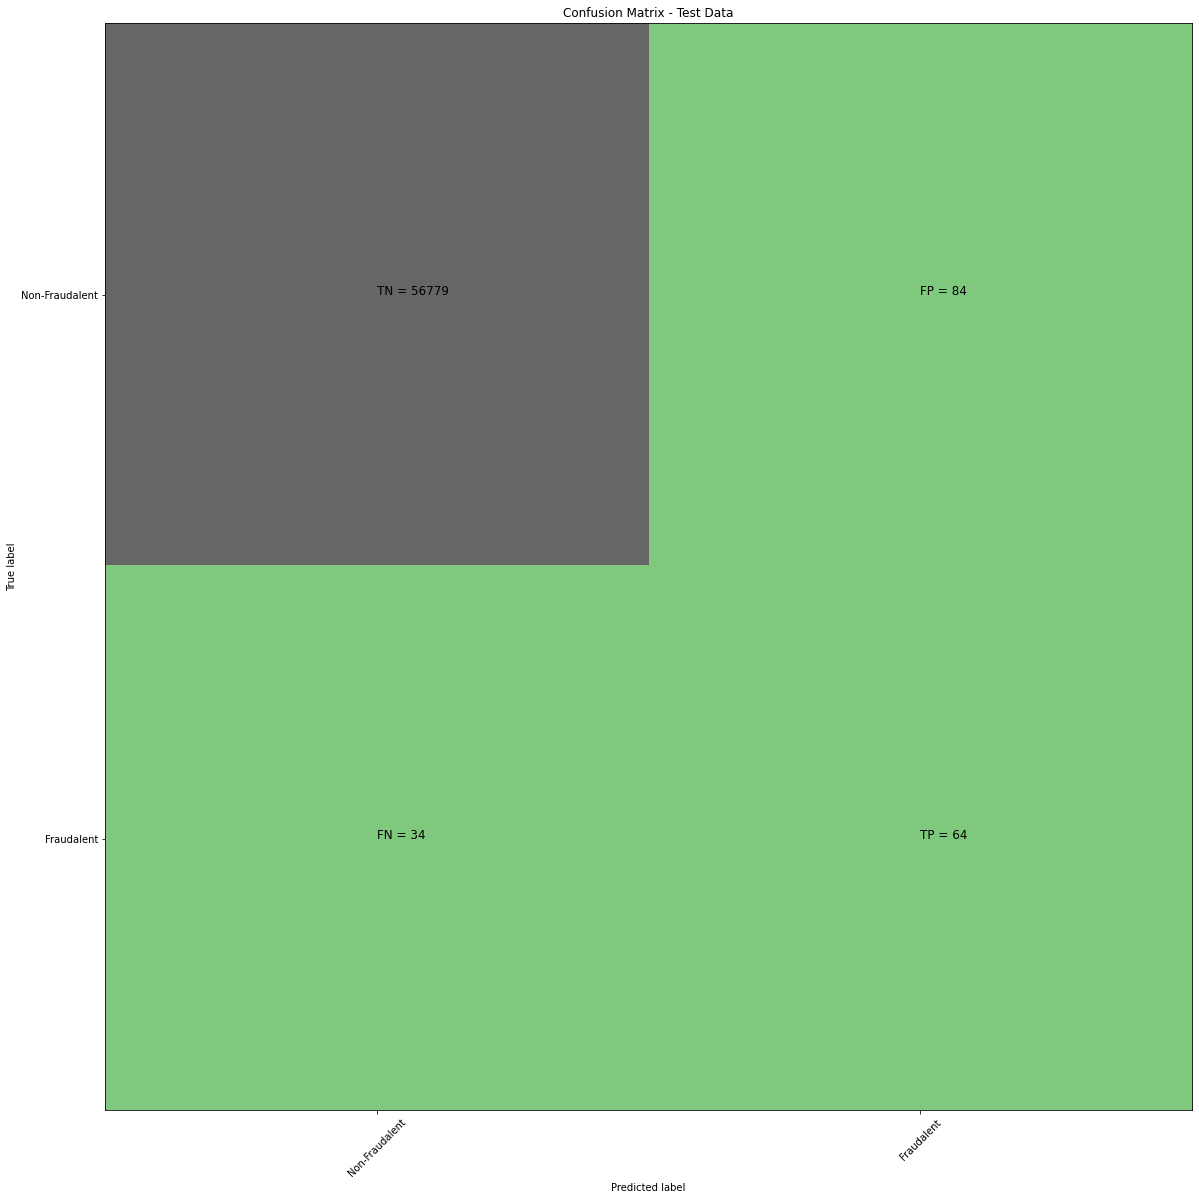

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.43      0.65      0.52        98

    accuracy                           1.00     56961
   macro avg       0.72      0.83      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8257919948662862
Tree threshold: 1.0
ROC for the test dataset 82.6%


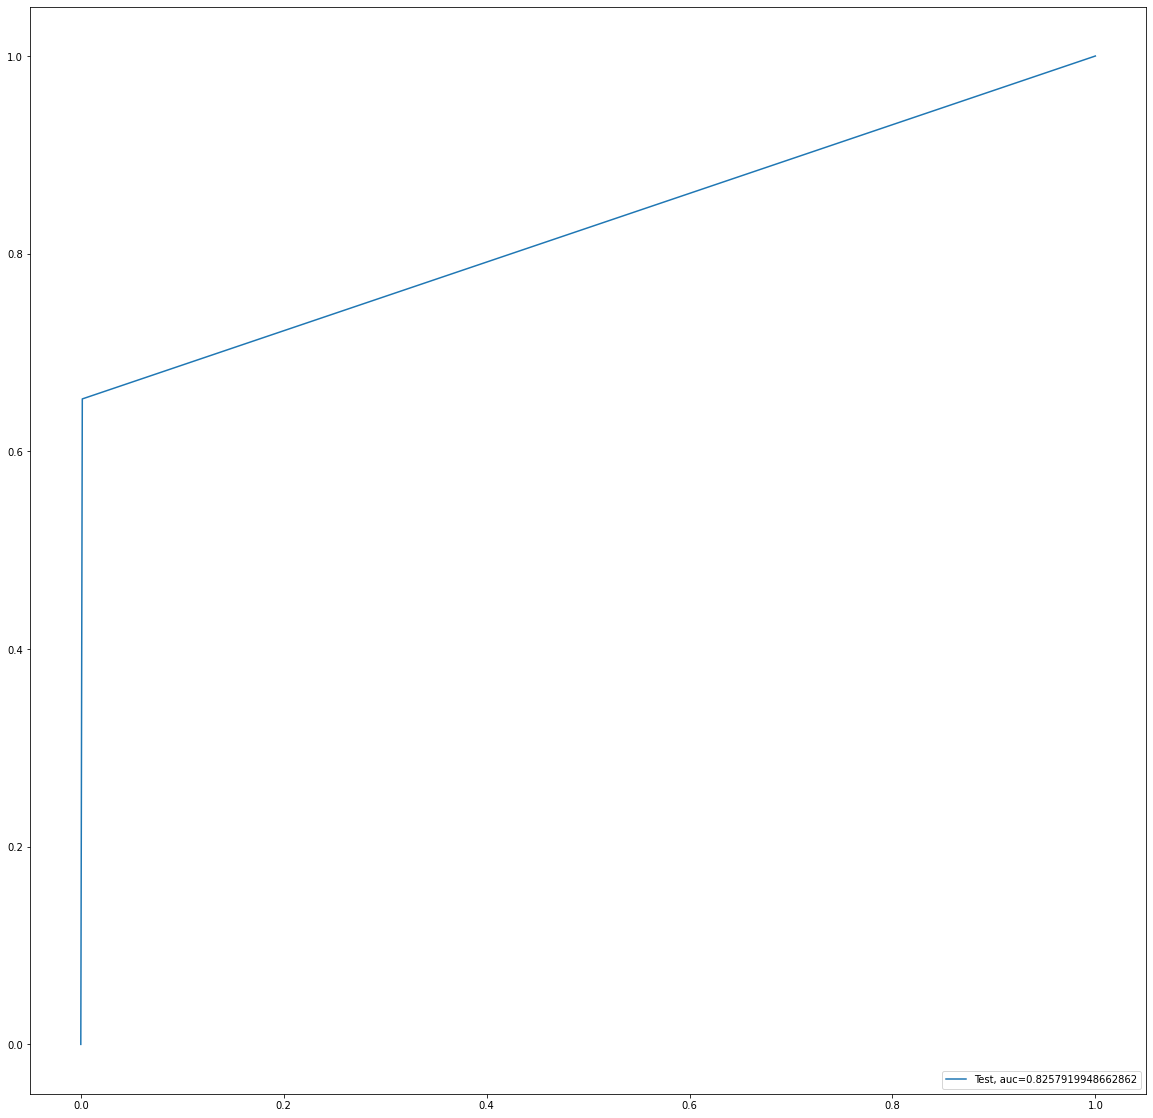

entropy score: 0.9984375274310493
Confusion Matrix


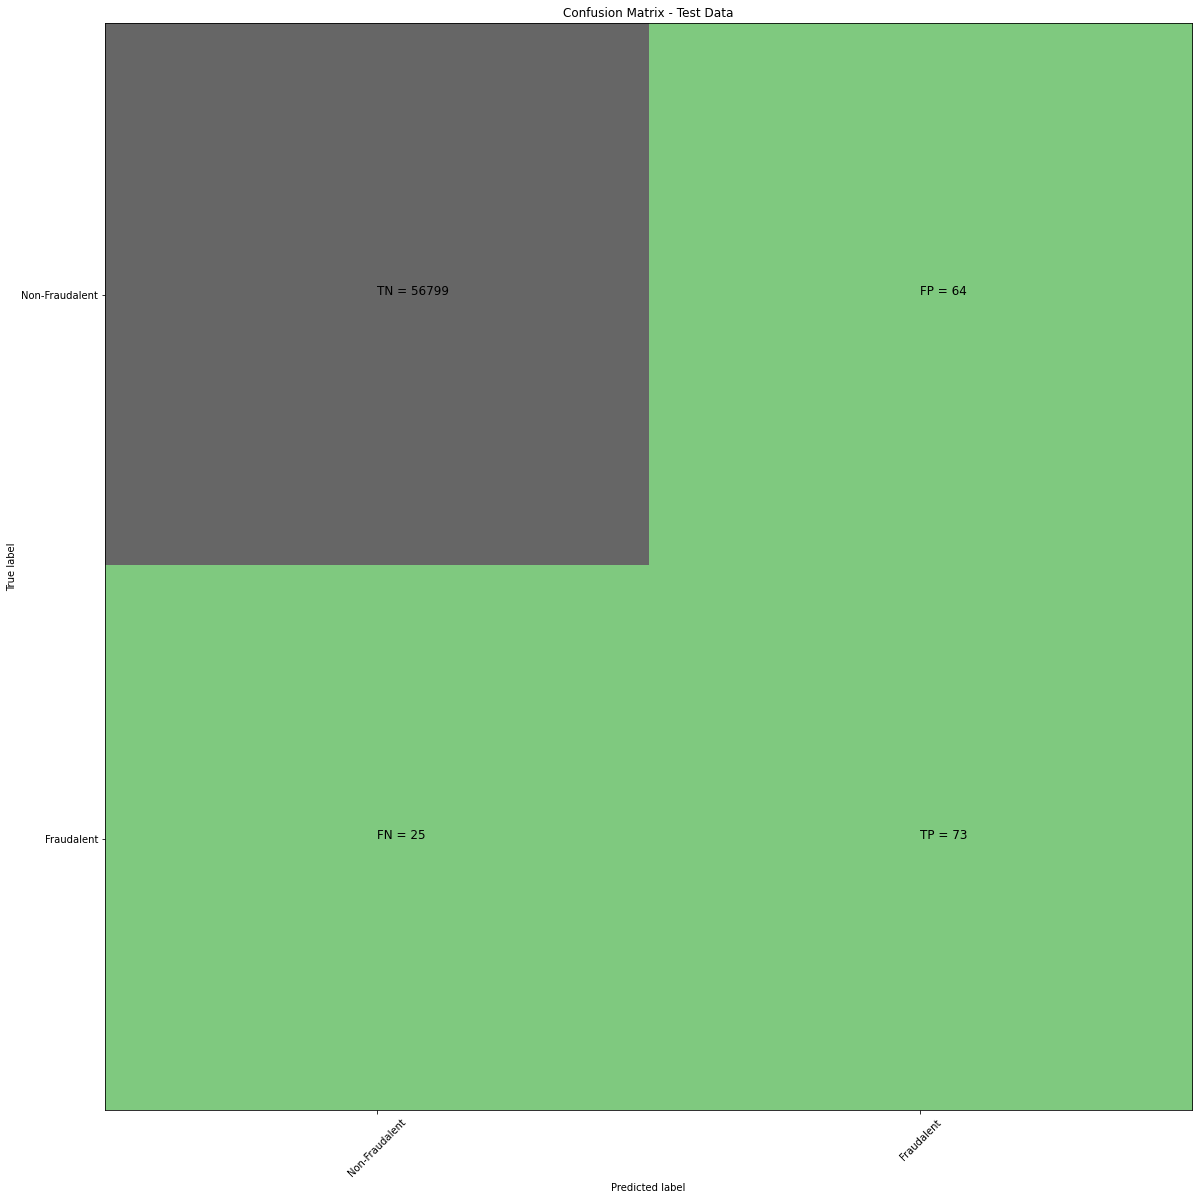

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.53      0.74      0.62        98

    accuracy                           1.00     56961
   macro avg       0.77      0.87      0.81     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8718862234938468
Tree threshold: 1.0
ROC for the test dataset 87.2%


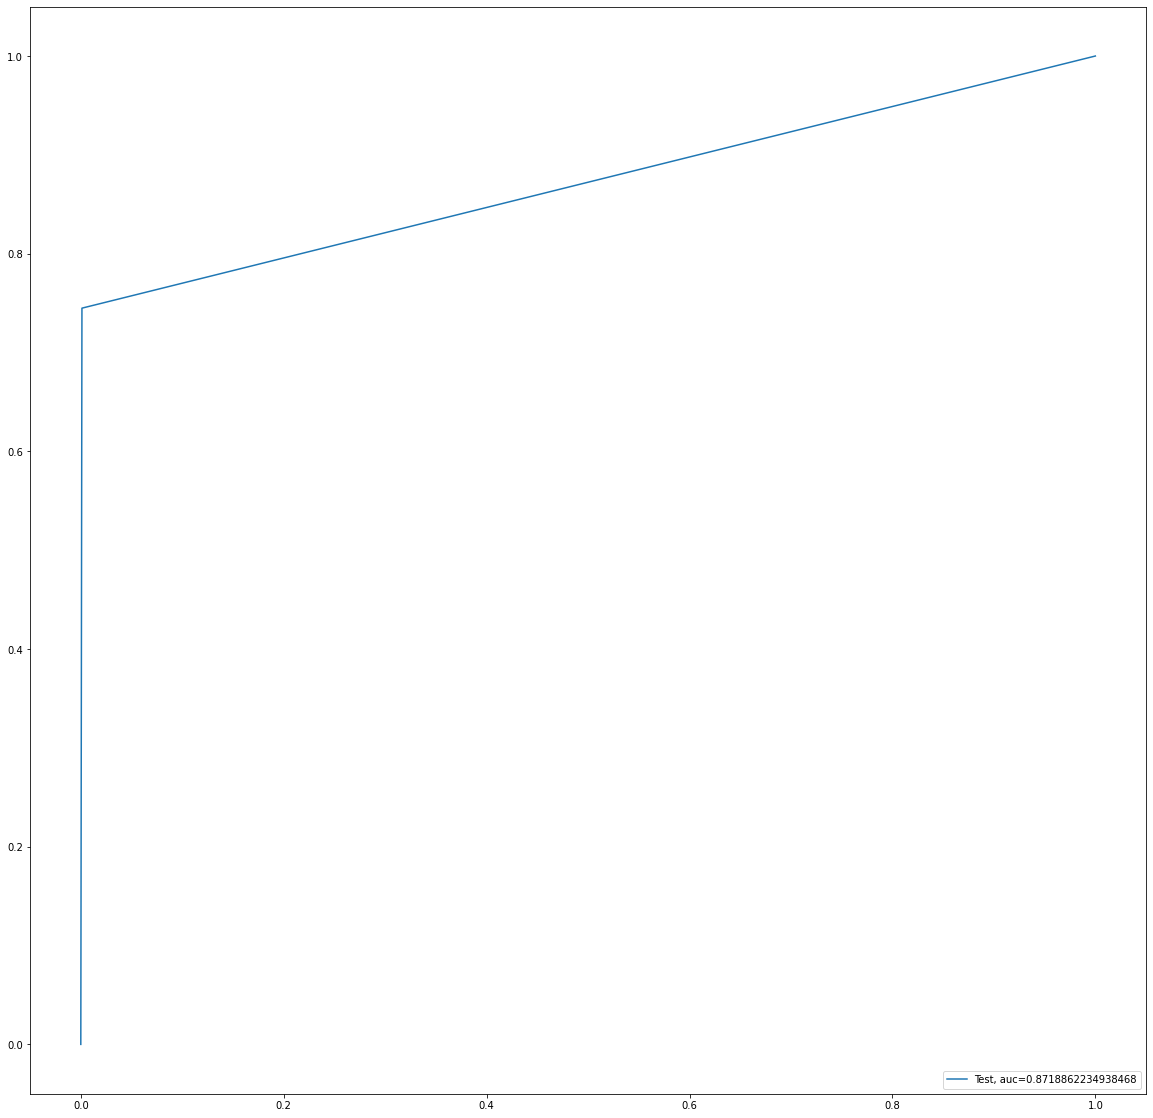

Time Taken by Model: --- 83.47581315040588 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


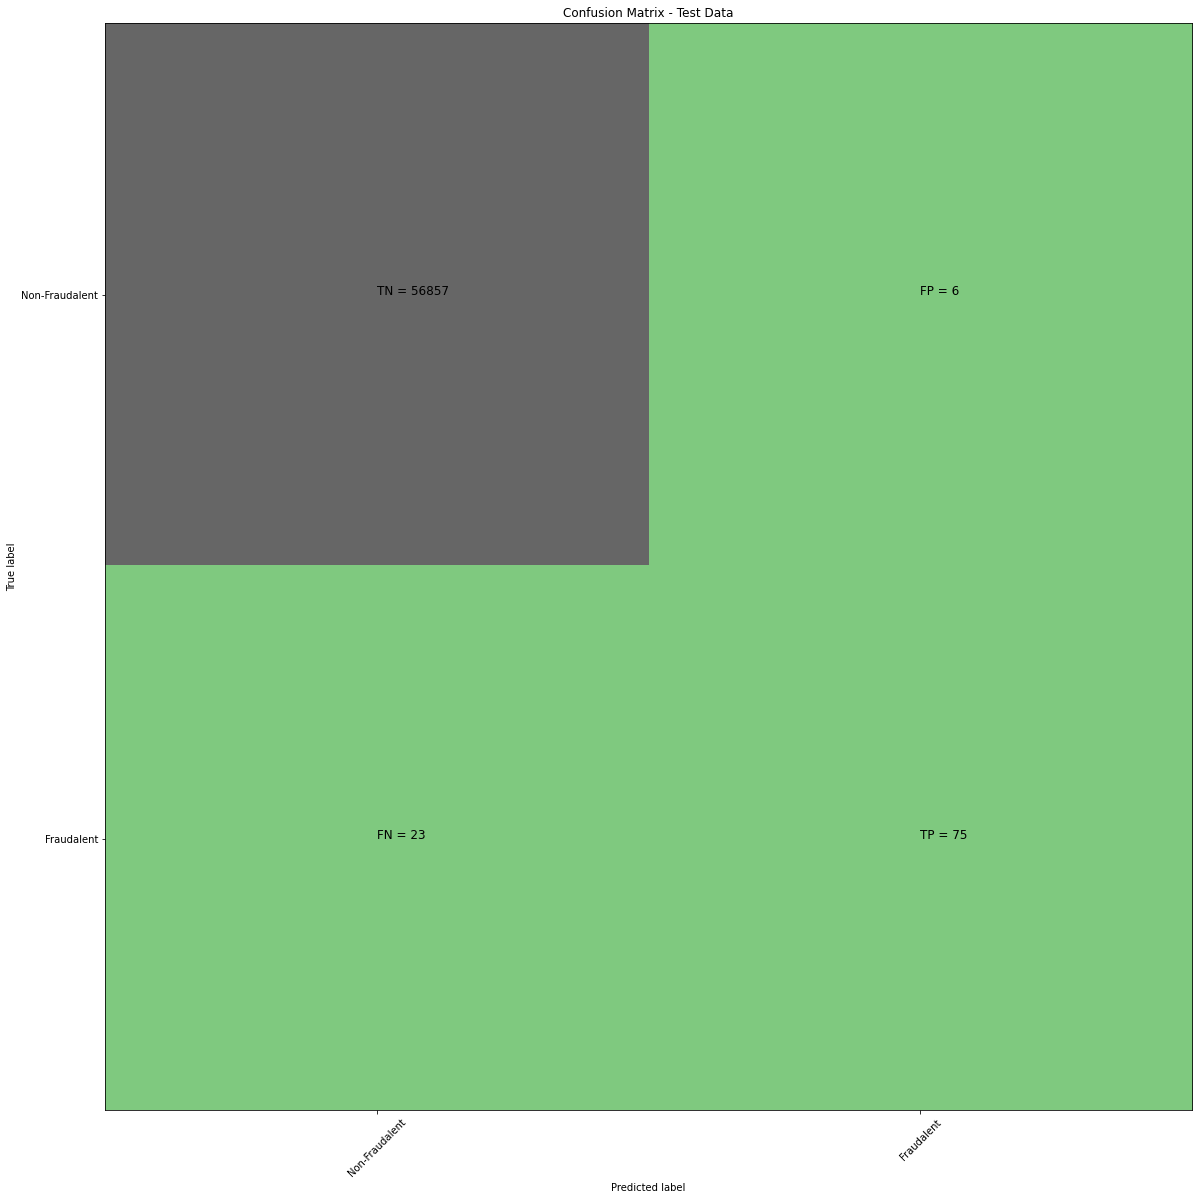

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9424467041622059
Random Forest threshold: 0.03
ROC for the test dataset 94.2%


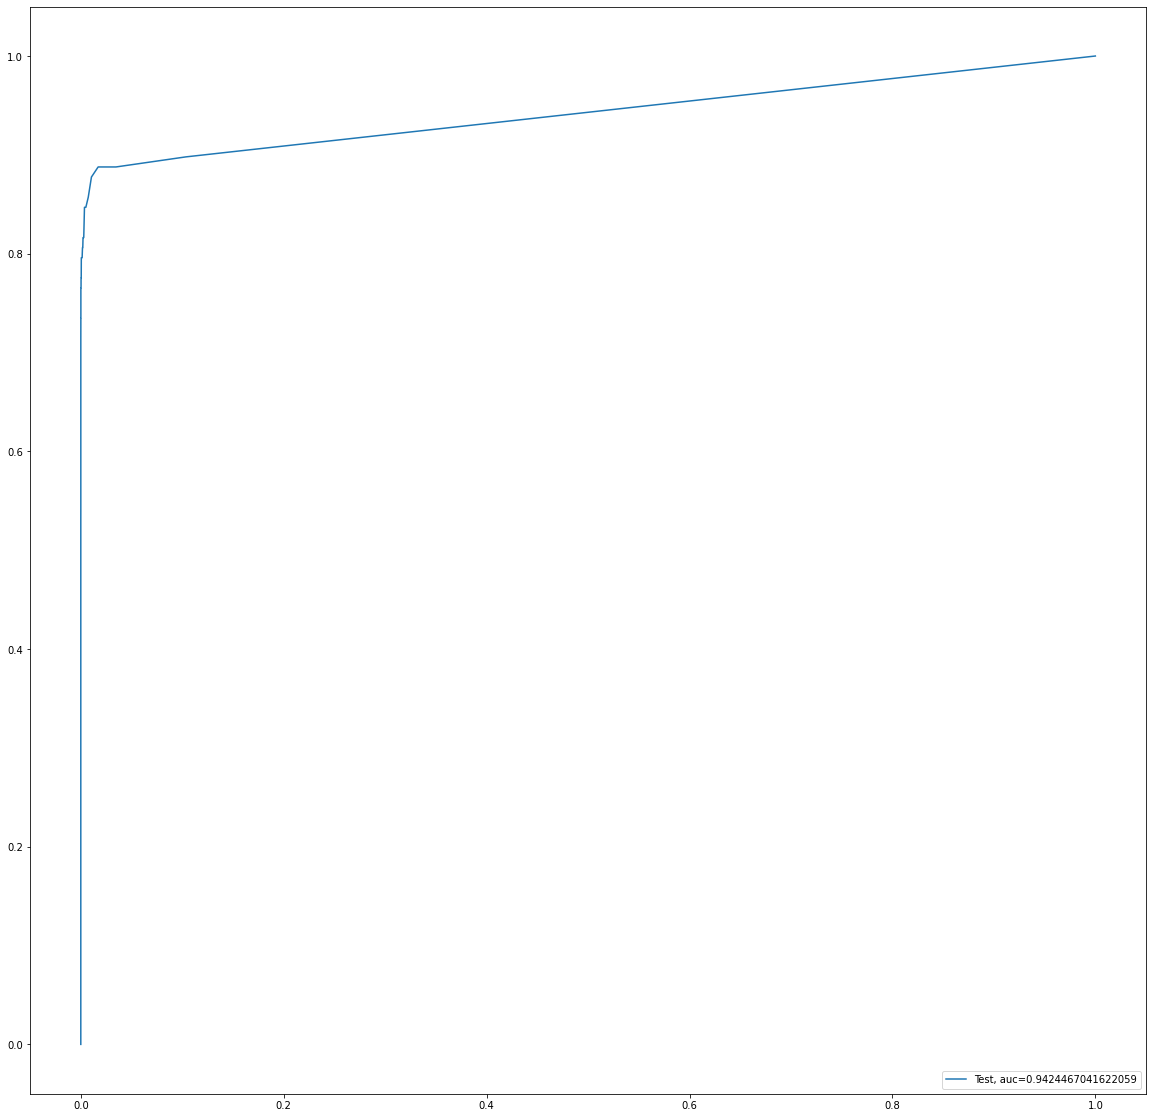

Time Taken by Model: --- 417.48343300819397 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9992977651375503
Confusion Matrix


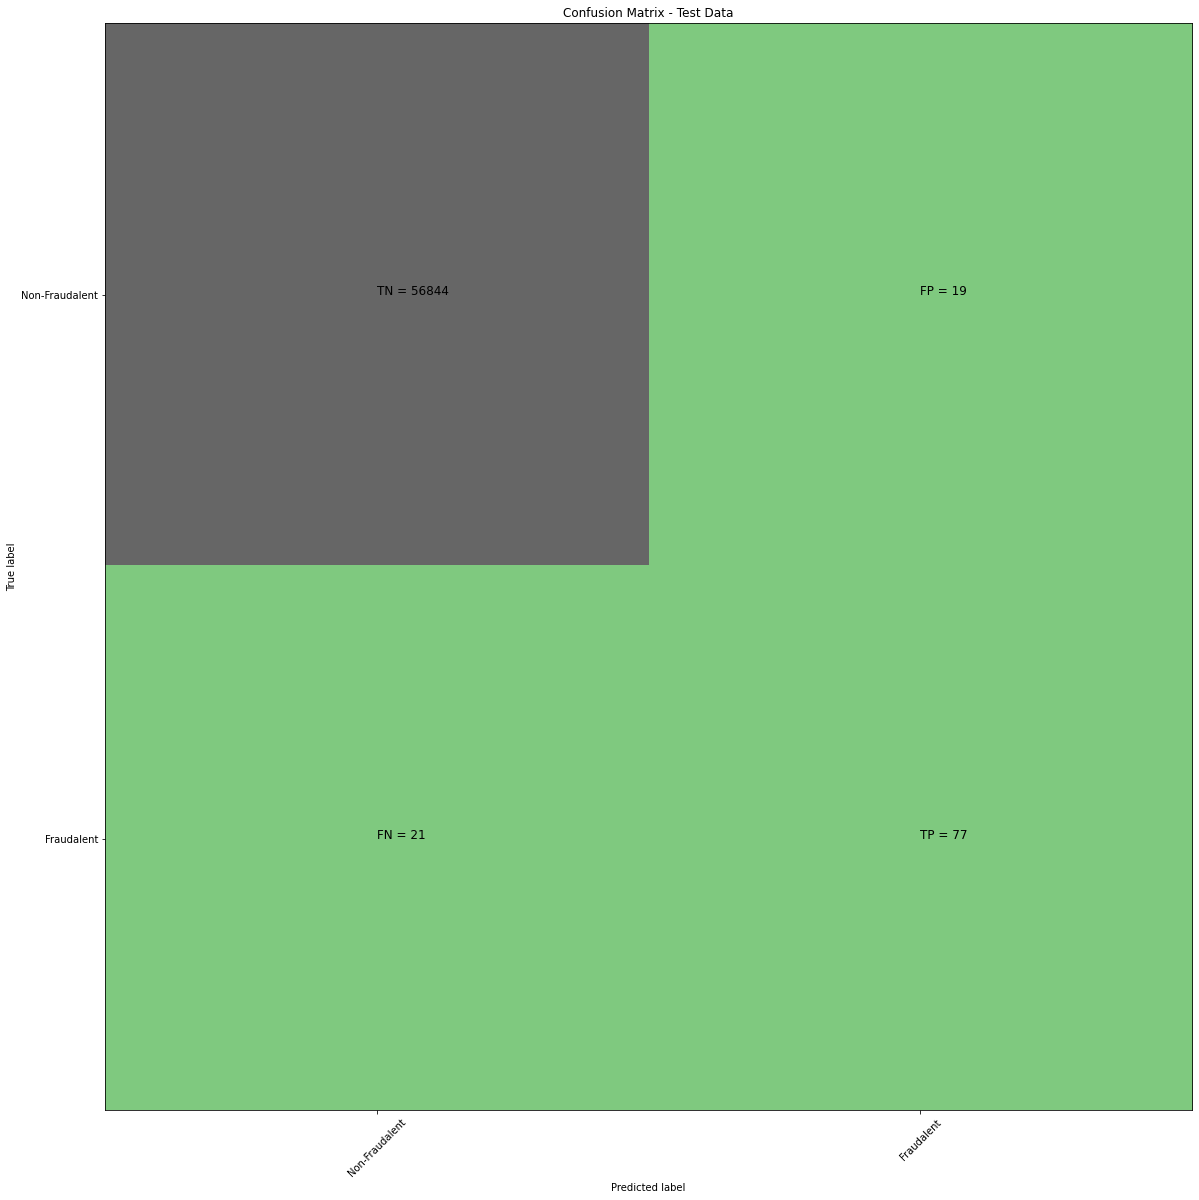

classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.80      0.79      0.79        98

    accuracy                           1.00     56961
   macro avg       0.90      0.89      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9748109222057885
XGBoost threshold: 0.00023749757383484393
ROC for the test dataset 97.5%


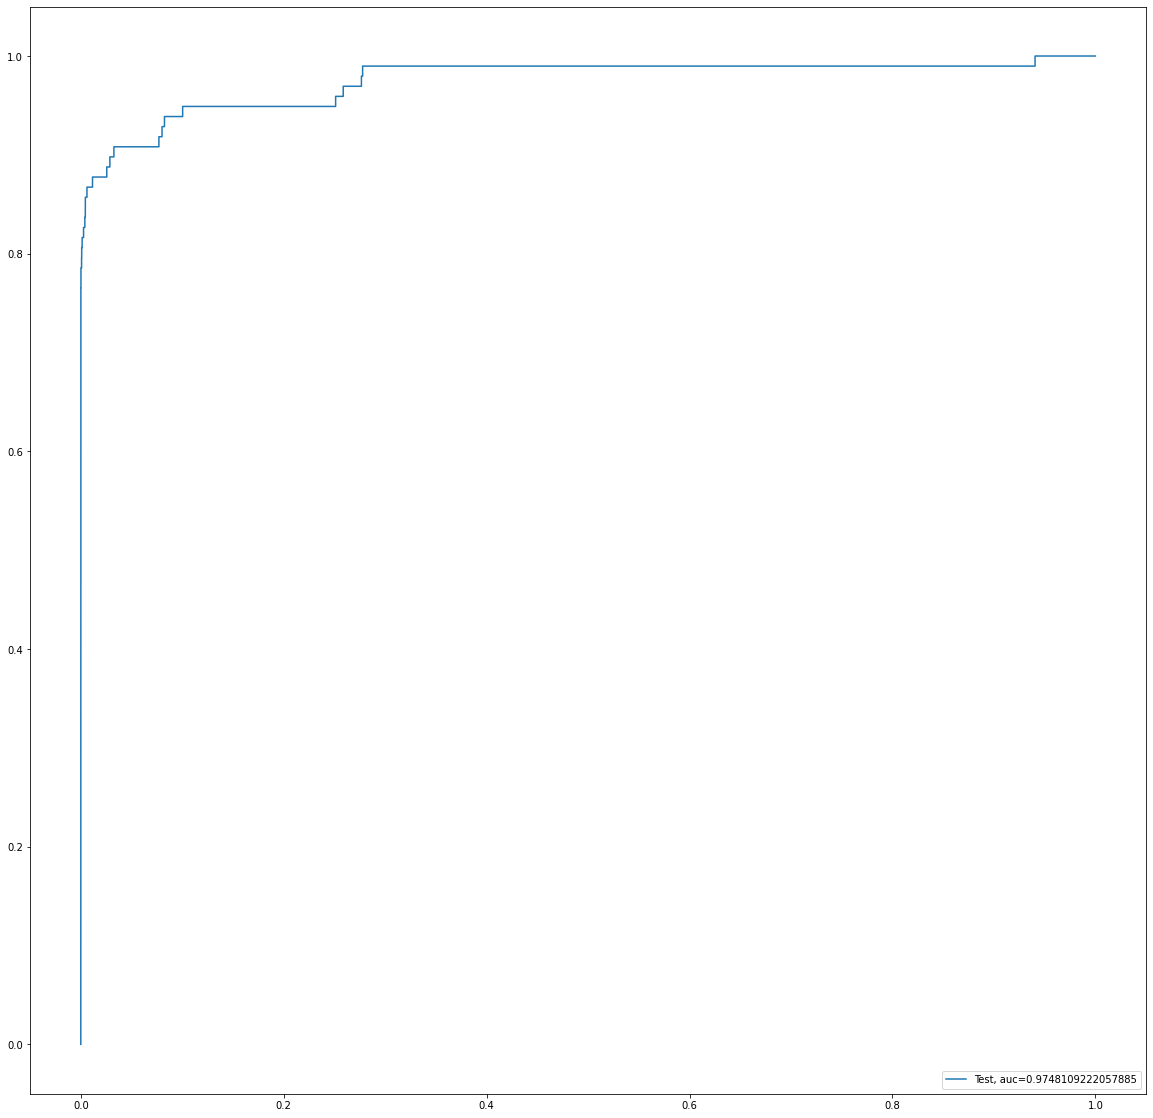

Time Taken by Model: --- 232.0489046573639 seconds ---
--------------------------------------------------------------------------------


In [75]:
Data_Imbalance_Handiling	 = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
#print("SVM Model with Sigmoid Kernel")
#start_time = time.time()
#df_Results = buildAndRunSVMModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [76]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.998964,0.966307,0.001029
1,Power Transformer,Logistic Regression with L1 Regularisation,0.998841,0.971547,0.009045
2,Power Transformer,KNN,0.999350,0.900851,0.200000
3,Power Transformer,Tree Model with gini criteria,0.998999,0.874710,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.999105,0.864364,1.000000
5,Power Transformer,Random Forest,0.999350,0.925014,0.010000
6,Power Transformer,XGBoost,0.999456,0.978537,0.000074
7,Power Transformer,SVM,0.998578,0.887599,0.001001
8,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998964,0.984553,0.002079
9,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999017,0.936530,0.009395


In [77]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.999490879724724
XGboost roc_value: 0.9845857587534953
XGBoost threshold: 2.1984937120578252e-05


In [78]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)


In [79]:
#Lets tune XGBoost Model for max_depth and min_child_weight
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([244.84573789, 235.5125586 , 237.05371332, 411.41228557,
         387.50483284, 388.83575931, 527.91745262, 450.85194254,
         331.18738956, 501.76658301, 398.23795133, 327.15281682]),
  'std_fit_time': array([ 5.5676237 ,  2.07555101,  0.95019928,  7.32536769,  3.0909402 ,
         10.39541695,  7.39054706, 30.2994126 , 21.78214243, 85.42945561,
         65.27425315, 33.38836862]),
  'mean_score_time': array([0.03112249, 0.01455326, 0.01495066, 0.02042937, 0.01485987,
         0.01475158, 0.01634622, 0.01951919, 0.01379719, 0.01823115,
         0.01185155, 0.01056786]),
  'std_score_time': array([0.0128374 , 0.00162143, 0.00361978, 0.00822137, 0.0018981 ,
         0.00247298, 0.00342806, 0.01492272, 0.00149392, 0.01060112,
         0.00120581, 0.00360243]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False]

In [80]:
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':range(60,150,20)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 86.23818293, 115.24387898, 151.38656039, 180.45947104,
         187.23560348]),
  'std_fit_time': array([ 0.44002158,  1.09880895,  6.29975396,  4.66403747, 31.71058296]),
  'mean_score_time': array([0.01016726, 0.00857325, 0.00999298, 0.01877437, 0.01569643]),
  'std_score_time': array([0.0014646 , 0.0010172 , 0.00126315, 0.01570518, 0.01555842]),
  'param_n_estimators': masked_array(data=[60, 80, 100, 120, 140],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 60},
   {'n_estimators': 80},
   {'n_estimators': 100},
   {'n_estimators': 120},
   {'n_estimators': 140}],
  'split0_test_score': array([nan, nan, nan, nan, nan]),
  'split1_test_score': array([nan, nan, nan, nan, nan]),
  'split2_test_score': array([nan, nan, nan, nan, nan]),
  'split3_test_score': array([nan, nan, nan, nan, nan]),
  'split4_test_score': array([nan, nan, nan, nan, nan]),
  'mean_test_score':

In [81]:
# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':[110,120,130],
  'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=120, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([116.20776496, 134.2581049 , 141.46215835, 113.90169325,
         125.01445045, 126.48802567, 106.85420451, 122.17274323,
         202.34167404, 258.40957603, 269.25856824, 284.99422116,
         239.62752428, 265.18950214, 285.74626355, 241.15961542,
         262.67731113, 283.37490673, 319.7586729 , 351.90640349,
         374.46572003, 316.13227553, 345.99593177, 373.1663249 ,
         314.29386249, 342.05817137, 339.98015509]),
  'std_fit_time': array([ 2.55718911,  1.20082772,  2.36330569,  2.56234839,  4.55228337,
          0.40624258,  1.01646604,  4.66243785,  8.35134874, 10.81761784,
          1.24851457,  2.65513857,  2.8684822 ,  1.22102889,  1.51108124,
          0.77618074,  1.53583534,  1.9989817 ,  1.85450065,  1.98314697,
          1.71492572,  0.95745297,  4.94885617,  1.50588626,  0.60934339,
          2.06974667, 42.21577671]),
  'mean_score_time': array([0.01609321, 0.01936355, 0.01923671, 0.01339707, 0.01057639,
         0.01648436, 0.009770

In [82]:
#With 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130 parameters tuned above we will now check learning rate

# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'learning_rate':[0.05,0.1,0.125,0.15,0.2]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([376.23677611, 371.08540411, 366.59618859, 367.49566708,
         340.60065532]),
  'std_fit_time': array([ 4.76267477,  3.15766055,  1.19346051,  1.35238024, 46.51648841]),
  'mean_score_time': array([0.02045135, 0.01295738, 0.03275528, 0.01713896, 0.02430396]),
  'std_score_time': array([0.00914994, 0.00259912, 0.01852951, 0.01100839, 0.0193066 ]),
  'param_learning_rate': masked_array(data=[0.05, 0.1, 0.125, 0.15, 0.2],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.05},
   {'learning_rate': 0.1},
   {'learning_rate': 0.125},
   {'learning_rate': 0.15},
   {'learning_rate': 0.2}],
  'split0_test_score': array([nan, nan, nan, nan, nan]),
  'split1_test_score': array([nan, nan, nan, nan, nan]),
  'split2_test_score': array([nan, nan, nan, nan, nan]),
  'split3_test_score': array([nan, nan, nan, nan, nan]),
  'split4_test_score': array([nan, nan, nan, nan, nan]),
  

In [90]:
#With 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130 parameters tuned above we will now check learning rate

# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
'gamma':[i/10.0 for i in range(0,5)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([400.99580874, 394.25382571, 397.29633312, 394.92414451,
         345.80789051]),
  'std_fit_time': array([12.98699197,  5.39478074,  3.23280521,  2.0847094 , 83.77381312]),
  'mean_score_time': array([0.03988833, 0.01495051, 0.01574473, 0.01654534, 0.01235833]),
  'std_score_time': array([0.02210542, 0.0022723 , 0.00405817, 0.00325008, 0.004612  ]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([nan, nan, nan, nan, nan]),
  'split1_test_score': array([nan, nan, nan, nan, nan]),
  'split2_test_score': array([nan, nan, nan, nan, nan]),
  'split3_test_score': array([nan, nan, nan, nan, nan]),
  'split4_test_score': array([nan, nan, nan, nan, nan]),
  'mean_test_score': array([nan, nan, nan, nan, nan]),
  '

In [91]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=np.NaN, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9994382121100402
XGboost roc_value: 0.9831466571821208
XGBoost threshold: 0.001512129558250308


In [92]:
#With 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130 , gamma: 0.1 parameters tuned above we will now check learning rate

# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'subsample':[i/10.0 for i in range(7,10)],
 'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=np.NaN, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([253.08496056, 263.27860756, 274.05638514, 287.70582852,
         307.25128231, 313.98531704, 322.41345334, 333.43149786,
         309.43539772]),
  'std_fit_time': array([ 0.44575236,  2.60903276,  1.22341337,  3.96345653,  4.88041731,
          1.16450128,  5.14992766,  2.55820451, 65.5319447 ]),
  'mean_score_time': array([0.7528976 , 0.66049623, 0.67908993, 0.80758147, 0.72308369,
         0.70208454, 0.6913312 , 0.67923932, 0.5418026 ]),
  'std_score_time': array([0.06605209, 0.05901778, 0.0182417 , 0.12156413, 0.0681885 ,
         0.08080762, 0.04309979, 0.0611577 , 0.12959058]),
  'param_colsample_bytree': masked_array(data=[0.7, 0.7, 0.7, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.7, 0.8, 0.9],
               mask=[False, False, False, F

In [93]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=np.NaN, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9994382121100402
XGboost roc_value: 0.9851689721841289
XGBoost threshold: 0.0007348654908128083


**As the roc value has dropped we will take not consider new values of colsample_bytree': 0.8, 'subsample': 0.8**

In [94]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=np.NaN, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_over, y_over ) # fit on the balanced dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9994382121100402
XGboost roc_value: 0.9831466571821208
XGBoost threshold: 0.001512129558250308


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


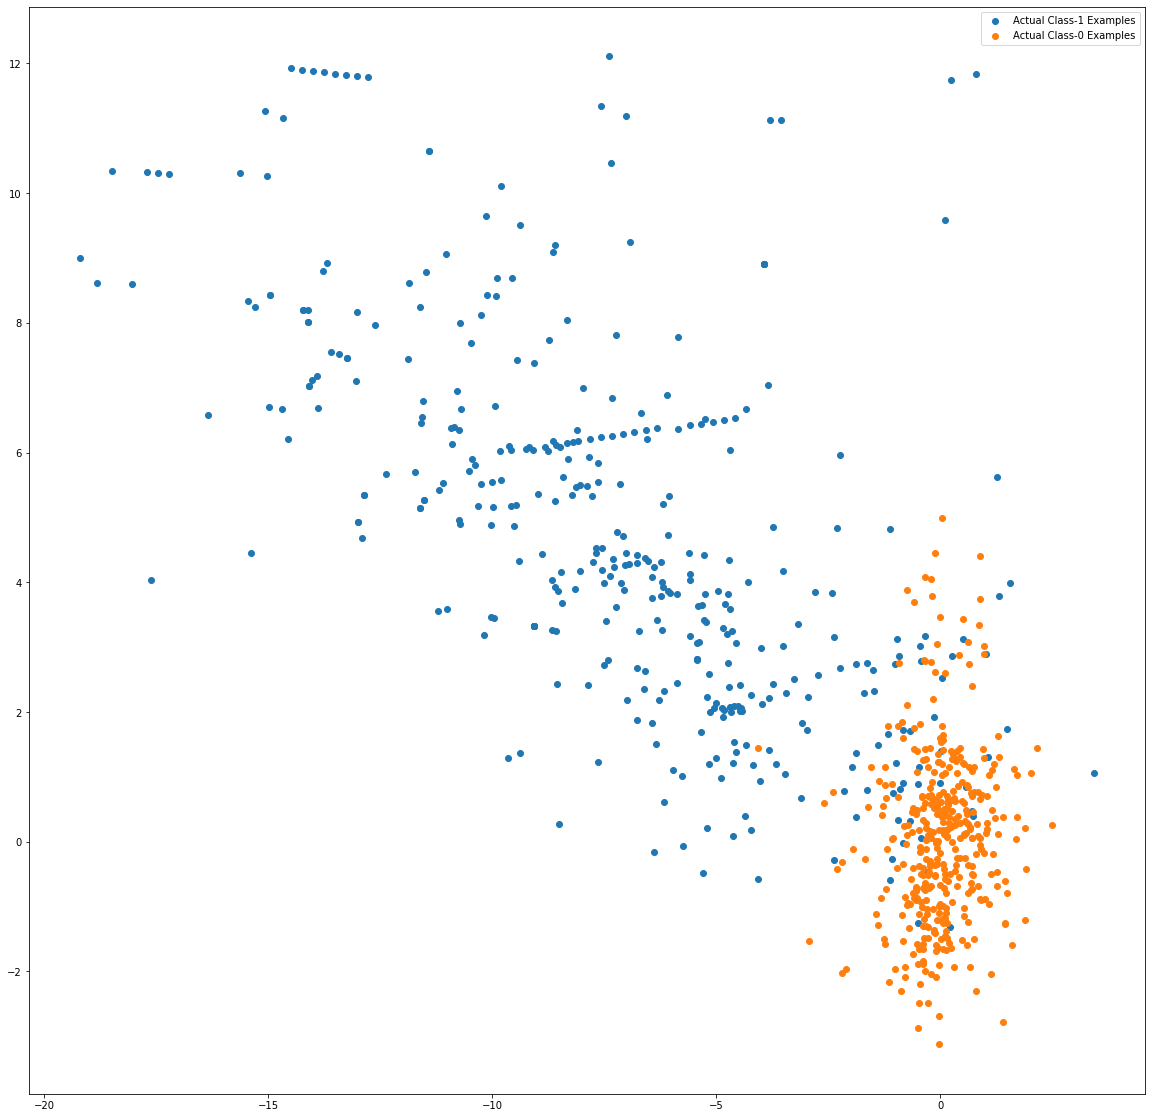

In [95]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [96]:
#### Print the FPR,TPR & select the best threshold from the roc curve
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9831466571821208
XGBoost threshold: 0.001512129558250308


## 5. Conclusion

Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results


We have selected XGBOOST model with Random Oversampling and StratifiedKFold CV 


**Model Accuracy: 0.9993855444953564**

**XGboost roc_value: 0.9852138347557161**

**XGBoost threshold: 0.005087878089398146**



### We also noticed by looking at the results 	Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.